# <center>  EMPLOYEE ATTRITION <b> ANALYSIS AND PREDICTION </b> FOR ENHANCEMENT OF EMPLOYEE EXPERIENCE AND RETENTION

# TABLE OF CONTENTS
1. Data Understanding
2. EDA
3. Model Building and Evaluation
4. Feature Importance
5. Current Employees Segmentation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.feature_selection import f_classif

pd.options.display.max_columns = None
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report
                             , roc_curve, roc_auc_score, precision_recall_curve, auc
                             , f1_score,ConfusionMatrixDisplay
                             , precision_score, recall_score, classification_report)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/thaison2309/HR-Analysis/main/hr_dataset.csv')

In [ ]:
data

attrition    business_travel    attrition_label department  \
0          Yes      Travel_Rarely       Ex-Employees      Sales   
1           No  Travel_Frequently  Current Employees        R&D   
2          Yes      Travel_Rarely       Ex-Employees        R&D   
3           No  Travel_Frequently  Current Employees        R&D   
4           No      Travel_Rarely  Current Employees        R&D   
...        ...                ...                ...        ...   
1465       Yes         Non-Travel       Ex-Employees        R&D   
1466       Yes  Travel_Frequently       Ex-Employees        R&D   
1467       Yes  Travel_Frequently       Ex-Employees      Sales   
1468       Yes      Travel_Rarely       Ex-Employees        R&D   
1469       Yes      Travel_Rarely       Ex-Employees      Sales   

       education_field      emp_no  employee_number  gender  \
0        Life Sciences     STAFF-1                1  Female   
1        Life Sciences     STAFF-2                2    Male   
2                Other     STAFF-4                4    Male   
3        Life Sciences     STAFF-5                5  Female   
4              Medical     STAFF-7                7    Male   
...                ...         ...              ...     ...   
1465  Technical Degree  STAFF-1905             1905    Male   
1466     Life Sciences  STAFF-1868             1868    Male   
1467             Other  STAFF-1667             1667    Male   
1468     Life Sciences  STAFF-1878             1878    Male   
1469     Life Sciences  STAFF-1702             1702    Male   

                   job_role marital_status over_time over18  \
0           Sales Executive         Single       Yes      Y   
1        Research Scientist        Married        No      Y   
2     Laboratory Technician         Single       Yes      Y   
3        Research Scientist        Married       Yes      Y   
4     Laboratory Technician        Married        No      Y   
...                     ...            ...       ...    ...   
1465     Research Scientist        Married       Yes      Y   
1466     Research Scientist         Single       Yes      Y   
1467        Sales Executive         Single       Yes      Y   
1468     Research Scientist         Single       Yes      Y   
1469   Sales Representative       Divorced       Yes      Y   

      training_times_last_year  age  current_employee  daily_rate  \
0                            0   41                 0        1102   
1                            3   49                 1         279   
2                            3   37                 0        1373   
3                            3   33                 1        1392   
4                            3   27                 1         591   
...                        ...  ...               ...         ...   
1465                         2   34                 0         967   
1466                         3   29                 0         459   
1467                         2   35                 0         880   
1468                         2   22                 0         391   
1469                         2   23                 0         427   

      distance_from_home          education  employee_count  \
0                      1  Associates Degree               1   
1                      8        High School               1   
2                      2  Associates Degree               1   
3                      3    Master's Degree               1   
4                      2        High School               1   
...                  ...                ...             ...   
1465                  16    Master's Degree               1   
1466                  24  Associates Degree               1   
1467                  12    Master's Degree               1   
1468                   7        High School               1   
1469                   7  Bachelor's Degree               1   

      environment_satisfaction  hourly_rate  job_involvement  job_level  \
0                        

In [ ]:
color = ['#A478B8', '#F5AE52', '#FC7869', '#BDDBEA', '#74006F']

# 1. Data Understanding

## 1.1 Data type checking

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   attrition                   1470 non-null   object
 1   business_travel             1470 non-null   object
 2   attrition_label             1470 non-null   object
 3   department                  1470 non-null   object
 4   education_field             1470 non-null   object
 5   emp_no                      1470 non-null   object
 6   employee_number             1470 non-null   int64 
 7   gender                      1470 non-null   object
 8   job_role                    1470 non-null   object
 9   marital_status              1470 non-null   object
 10  over_time                   1470 non-null   object
 11  over18                      1470 non-null   object
 12  training_times_last_year    1470 non-null   int64 
 13  age                         1470 non-null   int6

**Nhận xét**: Có 26 biến là số nguyên (integer) (một số biến phân loại - categorical features - được biểu diễn ở định dạng số nguyên) và 12 biến là kiểu dữ liệu chuỗi (string).

## 1.2 Missing value checking

In [ ]:
data.isnull().sum()

attrition                     0
business_travel               0
attrition_label               0
department                    0
education_field               0
emp_no                        0
employee_number               0
gender                        0
job_role                      0
marital_status                0
over_time                     0
over18                        0
training_times_last_year      0
age                           0
current_employee              0
daily_rate                    0
distance_from_home            0
education                     0
employee_count                0
environment_satisfaction      0
hourly_rate                   0
job_involvement               0
job_level                     0
job_satisfaction              0
monthly_income                0
monthly_rate                  0
num_companies_worked          0
percent_salary_hike           0
performance_rating            0
relationship_satisfaction     0
standard_hours                0
stock_op

**Nhận xét**: Dữ liệu không có missing value.

## 1.3 Duplicate value checking

In [ ]:
duplicateRows = data[data.duplicated(['emp_no'])]
len(duplicateRows)

0

## 1.4 Unique value of feature checking

In [ ]:
features = data.drop('attrition', axis=1).columns.to_list()

uniques = []
for f in features:
    item = {'feature':f}
    count = len(data[f].unique())
    item['unique'] = count
    if count < 10:
        item['values'] = data[f].unique().tolist()
    elif count < data.shape[0]:
        item['values'] = data[f].unique().tolist()[:10] + ['...']
    else:
        item['values'] = ['All values are unique']
    uniques.append(item)
data_uniques = pd.DataFrame(uniques)
data_uniques = data_uniques.set_index('feature')

data_uniques

unique  \
feature                              
business_travel                  3   
attrition_label                  2   
department                       3   
education_field                  6   
emp_no                        1470   
employee_number               1470   
gender                           2   
job_role                         9   
marital_status                   3   
over_time                        2   
over18                           1   
training_times_last_year         7   
age                             43   
current_employee                 2   
daily_rate                     886   
distance_from_home              29   
education                        5   
employee_count                   1   
environment_satisfaction         4   
hourly_rate                     71   
job_involvement                  4   
job_level                        5   
job_satisfaction                 4   
monthly_income                1349   
monthly_rate                  1427   
num_companies_worked            10   
percent_salary_hike             15   
performance_rating               2   
relationship_satisfaction        4   
standard_hours                   1   
stock_option_level               4   
total_working_years             40   
work_life_balance                4   
years_at_company                37   
years_in_current_role           19   
years_since_last_promotion      16   
years_with_curr_manager         18   

                                                                       values  
feature                                                                        
business_travel                [Travel_Rarely, Travel_Frequently, Non-Travel]  
attrition_label                             [Ex-Employees, Current Employees]  
department                                                   [Sales, R&D, HR]  
education_field             [Life Sciences, Other, Medical, Marketing, Tec...  
emp_no                                                [All values are unique]  
employee_number                                       [All values are unique]  
gender                                                         [Female, Male]  
job_role                    [Sales Executive, Research Scientist, Laborato...  
marital_status                                    [Single, Married, Divorced]  
over_time                                                           [Yes, No]  
over18                                                                    [Y]  
training_times_last_year                                [0, 3, 2, 5, 1, 4, 6]  
age                             [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, ...]  
current_employee                                                       [0, 1]  
daily_rate                  [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...  
distance_from_home                  [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, ...]  
education                   [Associates Degree, High School, Master's Degr...  
employee_count                                                            [1]  
environment_satisfaction                                         [2, 3, 4, 1]  
hourly_rate                     [94, 61, 92, 56, 40, 79, 81, 67, 44, 84, ...]  
job_involvement                                                  [3, 2, 4, 1]  
job_level                                                     [2, 1, 3, 4, 5]  
job_satisfaction                                                 [4, 2, 3, 1]  
monthly_income              [5993, 5130, 2090, 2909, 3468, 3068, 2670, 269...  
monthly_rate                [19479, 24907, 2396, 23159, 16632, 11864, 9964...  
num_companies_worked                      [8, 1, 6, 9, 0, 4, 5, 2, 7, 3, ...]  
percent_salary_hike             [11, 23, 15, 12, 13, 20, 22, 21, 17, 14, ...]  
performance_rating                                                     [3, 4]  
relationship_satisfaction                                        [1, 4, 2, 3]  
standard_hours                                                   

# 2. EDA

## 2.1 Univerate Analysis

### 2.1.1 Target Variable

In [ ]:
# Thay thế 'No' thành '0' và 'Yes' thành '1'
data['attrition'] = data['attrition'].replace({'No':0, 'Yes':1})

0    0.838776
1    0.161224
Name: attrition, dtype: float64

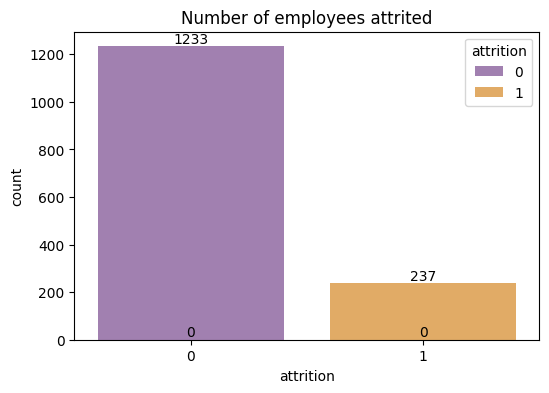

In [ ]:
plt.figure(figsize=(6,4))
fig_churn = sns.countplot(x='attrition', hue='attrition', dodge=False, data=data, palette=color)
fig_churn.bar_label(fig_churn.containers[0])
fig_churn.bar_label(fig_churn.containers[1])
plt.title('Number of employees attrited')
data['attrition'].value_counts(normalize = True)

**Nhận xét**:
- Nhìn chung, số lượng nhân viên ở lại với công ty chiếm số lượng lớn với 1233 nhân viên (tương ứng với xấp xỉ 83.88%), gấp hơn 5 lần so với số nhân viên mà đã rời đi, với 237 nhân viên tương ứng với 16.12%.
- Đồng thời, có thể kết luận rằng đây là imbalanced dataset.

### 2.1.2 Numerical Variable

In [ ]:
num_cols = data[['age', 'distance_from_home', 'daily_rate', 'hourly_rate', 'monthly_rate', 'monthly_income',
                 'employee_count', 'num_companies_worked', 'percent_salary_hike', 'years_in_current_role',
                 'years_since_last_promotion', 'years_with_curr_manager', 'years_at_company', 'total_working_years',
                 'training_times_last_year', 'standard_hours']]
num_summary = num_cols.describe().transpose()
num_summary

count          mean          std     min     25%  \
age                         1470.0     36.923810     9.135373    18.0    30.0   
distance_from_home          1470.0      9.192517     8.106864     1.0     2.0   
daily_rate                  1470.0    802.485714   403.509100   102.0   465.0   
hourly_rate                 1470.0     65.891156    20.329428    30.0    48.0   
monthly_rate                1470.0  14313.103401  7117.786044  2094.0  8047.0   
monthly_income              1470.0   6502.931293  4707.956783  1009.0  2911.0   
employee_count              1470.0      1.000000     0.000000     1.0     1.0   
num_companies_worked        1470.0      2.693197     2.498009     0.0     1.0   
percent_salary_hike         1470.0     15.209524     3.659938    11.0    12.0   
years_in_current_role       1470.0      4.229252     3.623137     0.0     2.0   
years_since_last_promotion  1470.0      2.187755     3.222430     0.0     0.0   
years_with_curr_manager     1470.0      4.123129     3.568136     0.0     2.0   
years_at_company            1470.0      7.008163     6.126525     0.0     3.0   
total_working_years         1470.0     11.279592     7.780782     0.0     6.0   
training_times_last_year    1470.0      2.799320     1.289271     0.0     2.0   
standard_hours              1470.0     80.000000     0.000000    80.0    80.0   

                                50%       75%      max  
age                            36.0     43.00     60.0  
distance_from_home              7.0     14.00     29.0  
daily_rate                    802.0   1157.00   1499.0  
hourly_rate                    66.0     83.75    100.0  
monthly_rate                14235.5  20461.50  26999.0  
monthly_income               4919.0   8379.00  19999.0  
employee_count                  1.0      1.00      1.0  
num_companies_worked            2.0      4.00      9.0  
percent_salary_hike            14.0     18.00     25.0  
years_in_current_role           3.0      7.00     18.0  
years_since_last_promotion      1.0      3.00     15.0  
years_with_curr_manager         3.0      7.00     17.0  
years_at_company                5.0      9.00     40.0  
total_working_years            10.0     15.00     40.0  
training_times_last_year        3.0      3.00      6.0  
standard_hours                 80.0     80.00     80.0

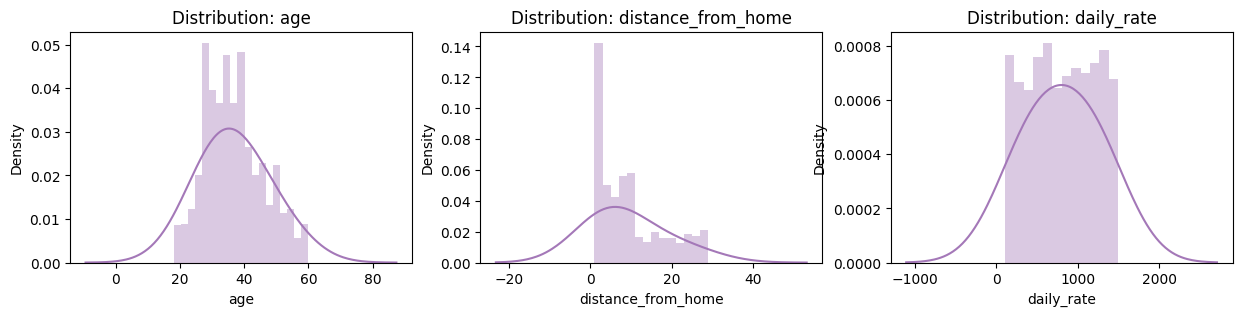

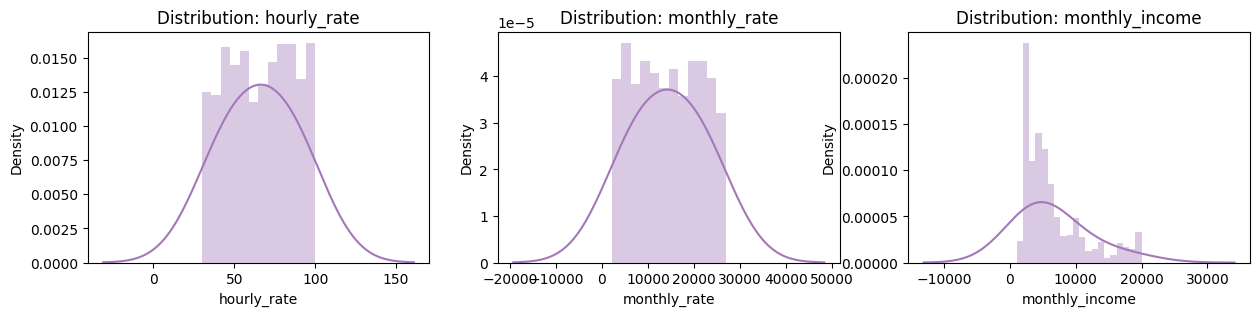

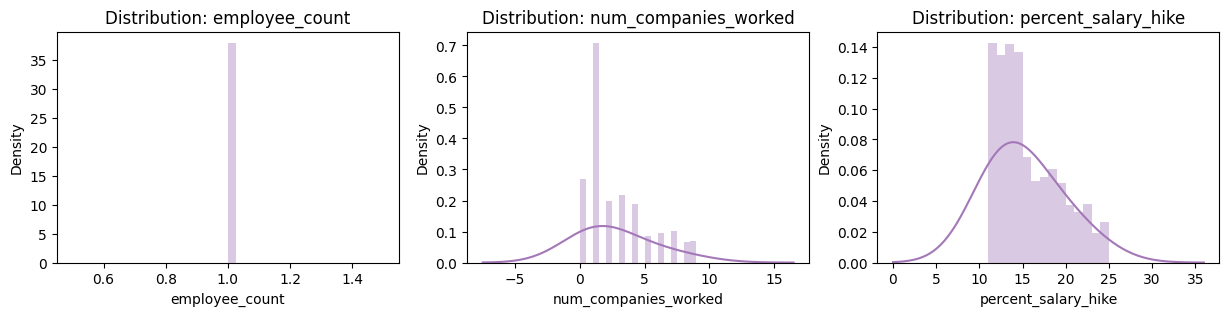

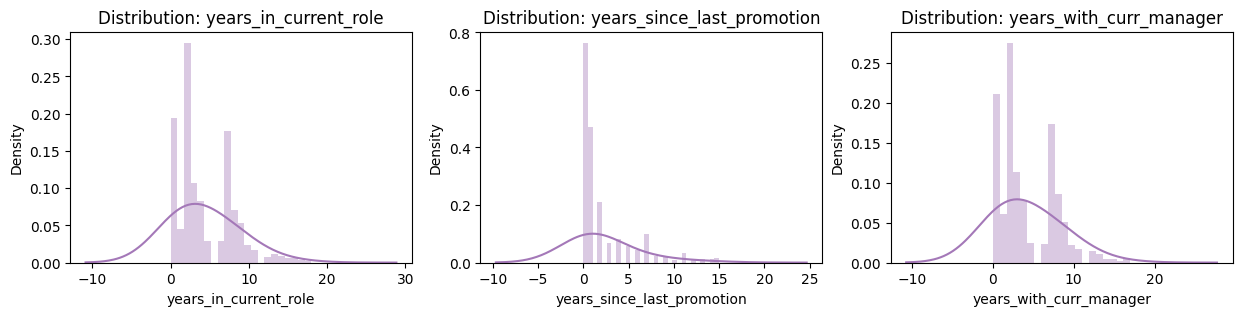

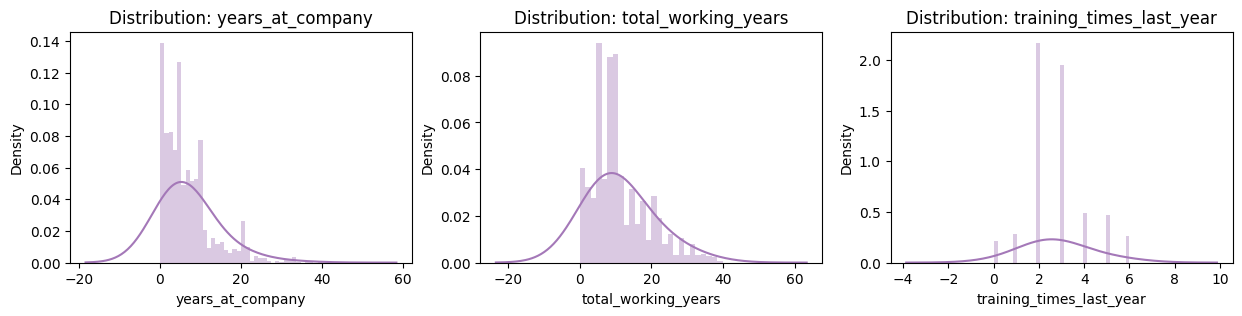

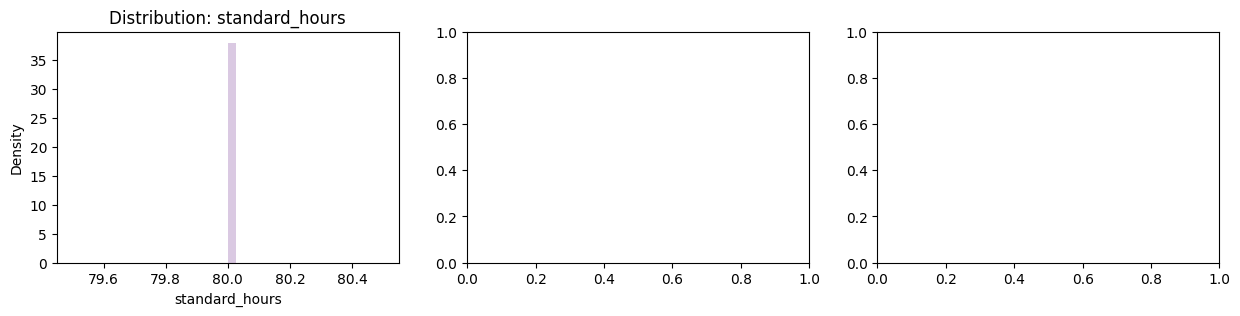

In [ ]:
for i in range(6):
    fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
    a = 1
    for j in num_cols.columns[(i*3) : (i*3) + 3]:
        plt.subplot(1,3,a)
        sns.distplot(num_cols[j],kde_kws = {'bw' : 1},color = '#A478B8');
        plt.title('Distribution: ' + j)
        a += 1

**Nhìn chung:**
- Khoảng cách từ nhà đến công ty (distance_from_home), Thu nhập hàng tháng (monthly_income), Số công ty đã làm việc (num_companies_worked), Phần trăm tăng lương (percent_salary_hike), Số năm kể từ phần cuối thăng cấp (years_from_last_promotion), Số năm làm việc tại công ty (years_at_company) và Tổng số năm làm việc (total_working_years) có phân phối dữ liệu có độ lệch dương.
- Số năm trong vai trò làm việc hiện tại (years_in_current_role) và Số năm với quản lý hiện tại (years_with_curr_manager) có phân phối hai mốt.
- Số lượng nhân viên (employee_count) và Giờ làm việc tiêu chuẩn (standard_hours) là các biến có duy nhất một giá trị => Loại bỏ hai biến này.

\
**Chi tiết:**
- **Độ tuổi (Age):**
    + Độ tuổi của nhân viên nằm trong khoảng từ 18 đến 60 tuổi, với độ tuổi trung bình khoảng 37.
    + Độ tuổi của nhân viên trong công ty chủ yếu trong khoảng từ 27 đến 43.
- **Khoảng cách từ nhà đến công ty (distance_from_home):**
    + Khoảng cách từ nhà đến công ty được ghi nhận có phạm vi từ 1km đến 29km.
    + Phần lớn nhân viên sống trong bán kính 10km từ công ty.
- **Tiền công theo giờ (hourly_rate), theo ngày (daily_rate) và theo tháng (monthly_rate):** Số lượng nhân viên ở từng mức lương tương đối bằng nhau.
- **Thu nhập hàng tháng (monthly_income):**
    + Biến thu nhập hàng tháng có phân phối có độ lệch dương.
    + Phần lớn nhân viên có mức lương dưới 8000/tháng.
    + Mức thu nhập lớn nhất được ghi nhận là 19999 và chỉ có 50 nhân viên có mức thu nhập từ 19000 trở lên và không có nhân viên nào có mức thu nhập cao hơn 20000.
- **Số công ty đã làm việc (num_companies_worked):**
    + Đa số nhân viên đã từng làm qua khá ít công ty, đối với đa số nhân viên thì công ty hiện tại là công ty thứ 2 họ làm việc.
    + Có một nhóm nhỏ nhân viên (52 người) đã từng làm việc ở 9 công ty.
- **Phần trăm tăng lương (percent_salary_hike):** Đa số nhân viên có mức tăng lương trong khoảng từ 11% đến 15%.
- **Tổng số năm làm việc (total_working_years):**
    + Đa số nhân viên chưa có nhiều năm kinh nghiệm làm việc.
    + Ghi nhận số năm kinh nghiệm lớn nhất là 40 => Dự đoán những nhân viên có số năm kinh nghiệm cao là những người sắp đến tuổi nghỉ hưu.
- **Số năm làm việc tại công ty (years_at_company):**
    + Số năm làm việc tại công ty kéo dài từ 1 năm đến 40 năm. Có nhân viên có số năm làm việc tại công ty là 40, đó là nhân viên đã giành toàn bộ 40 đi làm gắn bó với công ty.
    + Đa số nhân viên chưa gắn bó quá lâu dài với công ty vì hơn 50% nhân viên có số năm đồng hành với công ty từ 5 năm trở xuống.
- **Số năm trong vai trò làm việc hiện tại (years_in_current_role):** Có một lượng lớn nhân viên chưa có nhiều năm kinh nghiệm làm việc tại vị trí công việc hiện tại.
- **Số năm kể từ phần cuối thăng cấp (years_from_last_promotion):** Đa số nhân viên có lần thăng cấp gần nhất từ 1 đến 2 năm trước.
- **Số năm với quản lý hiện tại (years_with_curr_manager):** Đa số nhân viên chưa có nhiều năm làm việc và gắn bó với quản lí hiện tại. Điều này có thể được giải thích bởi đa số nhân viên chưa gắn bó quá lâu dài với công ty.
- **Số lần được đào tạo vào năm trước (training_times_last_year):** Trung bình, mỗi nhân viên sẽ được đào tạo khoảng 2-3 lần vào năm trước.
- **Giờ làm việc tiêu chuẩn (standard_hours):** Giờ tiêu chuẩn này còn được gọi là lịch làm việc 9/80. Tại đây, nhân viên làm việc 80 giờ trong khoảng thời gian 9 ngày, thường bao gồm tám ngày làm việc chín giờ, một ngày tám giờ và một ngày nghỉ. Toàn bộ nhân viên ghi nhận trong bộ dữ liệu đều có giờ làm việc tiêu chuẩn giống nhau.
- **Số lượng nhân viên (employee_count):** Là số lượng tính theo đầu người, số lượng nhân viên làm việc trong công ty mà trong đó mỗi nhân viên, dù là toàn thời gian hay bán thời gian, đều được tính là 1.


### 2.1.3 Categorical Variable  

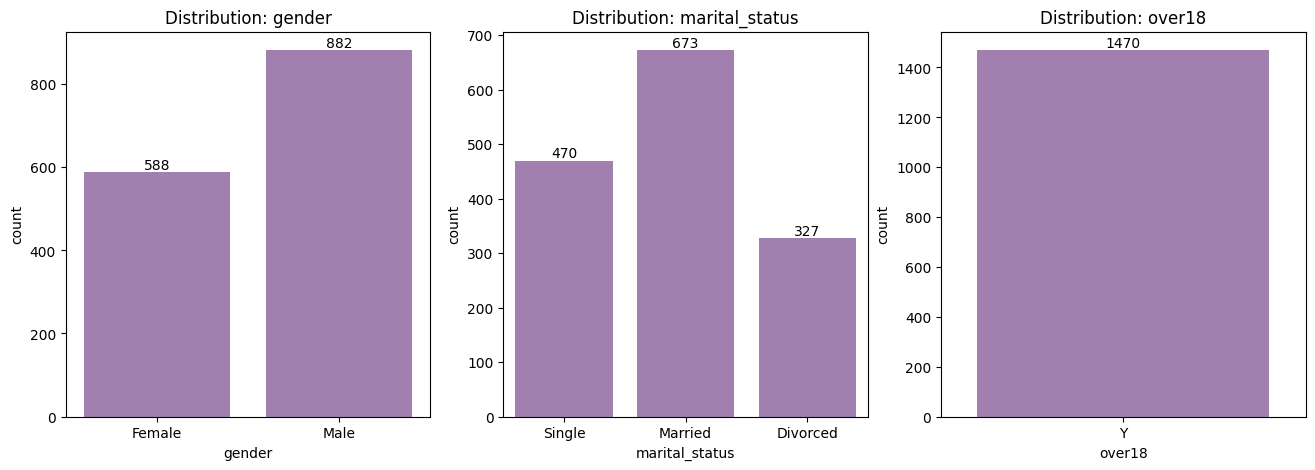

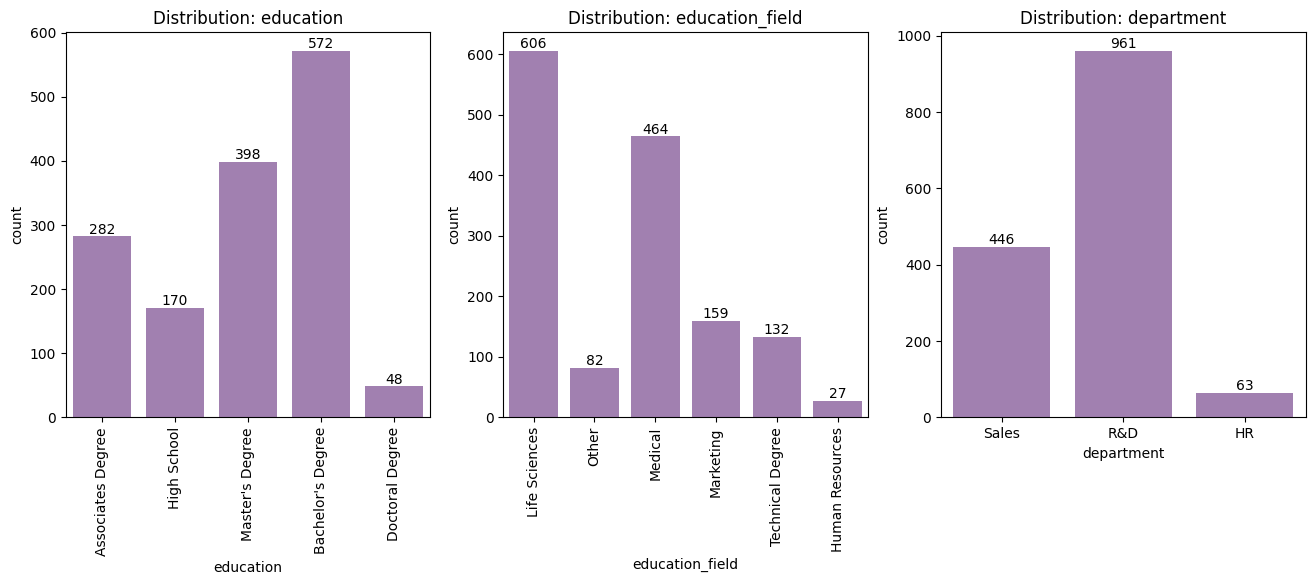

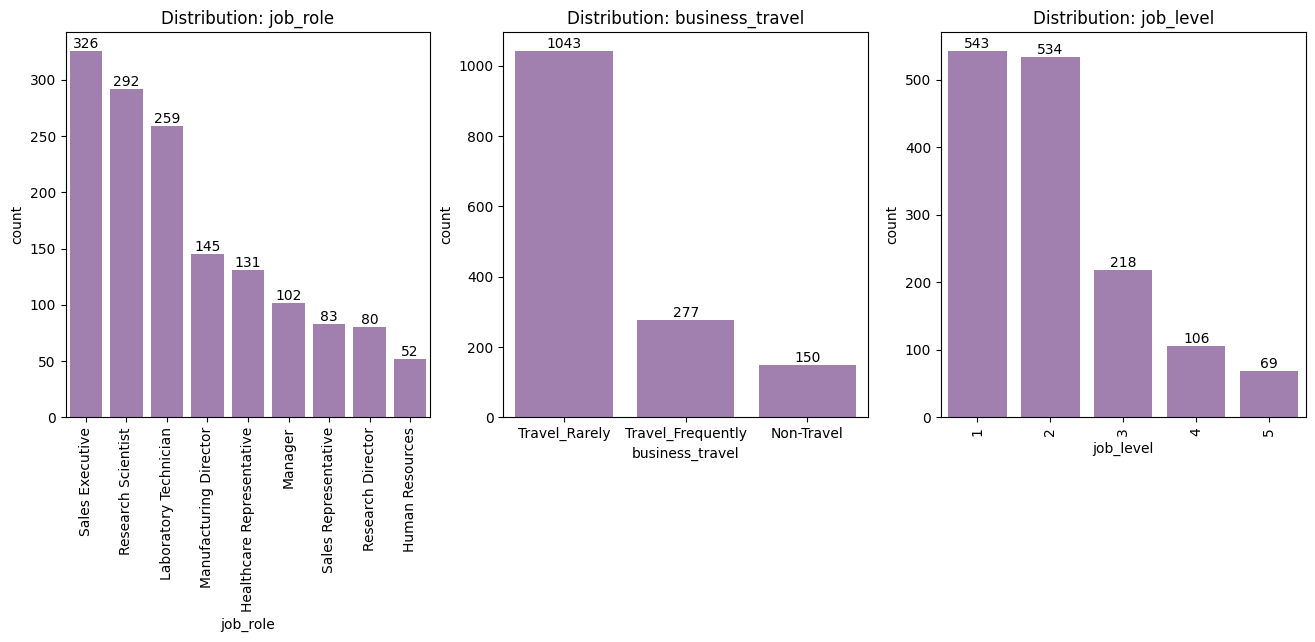

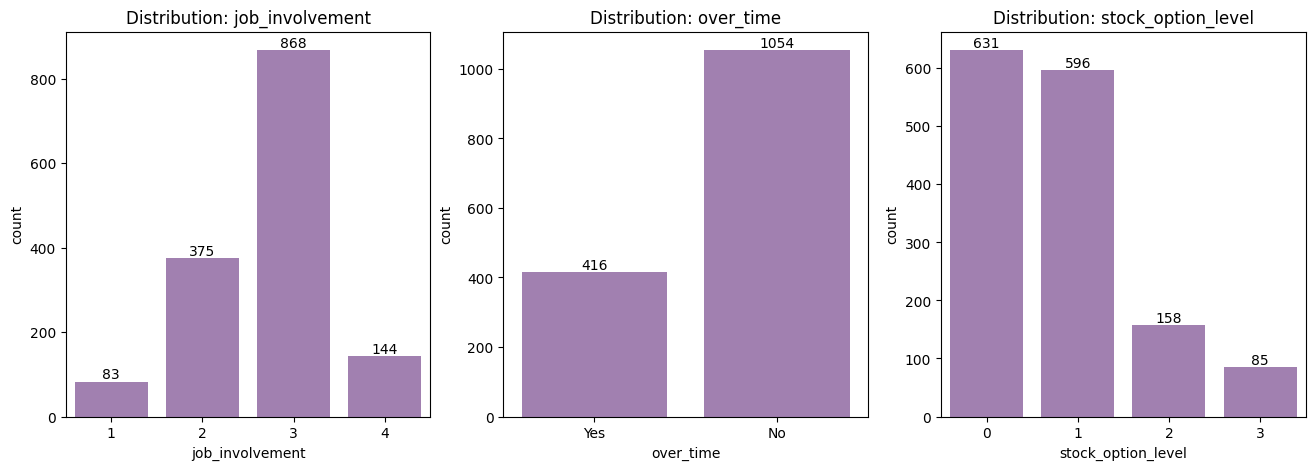

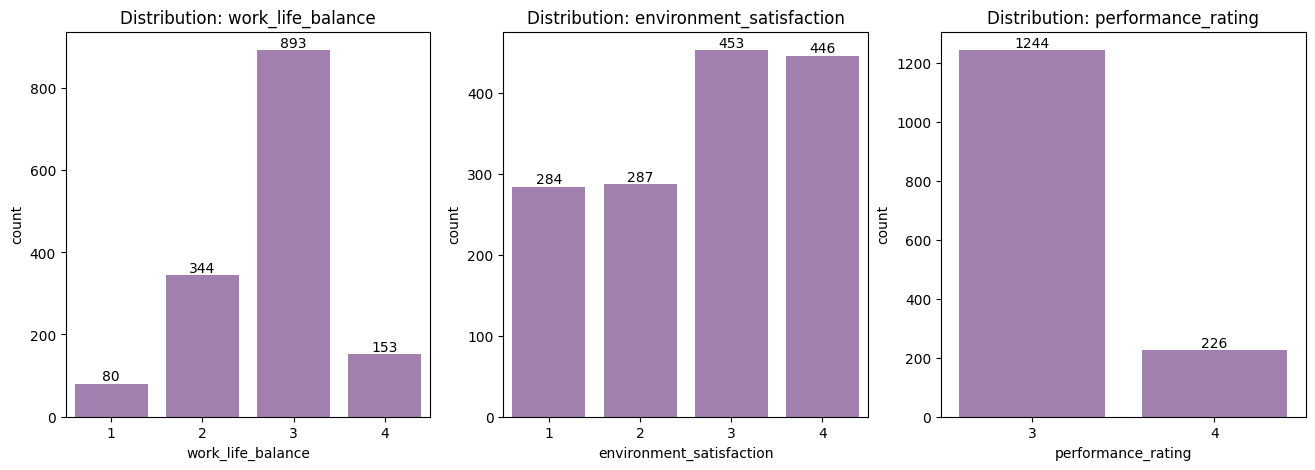

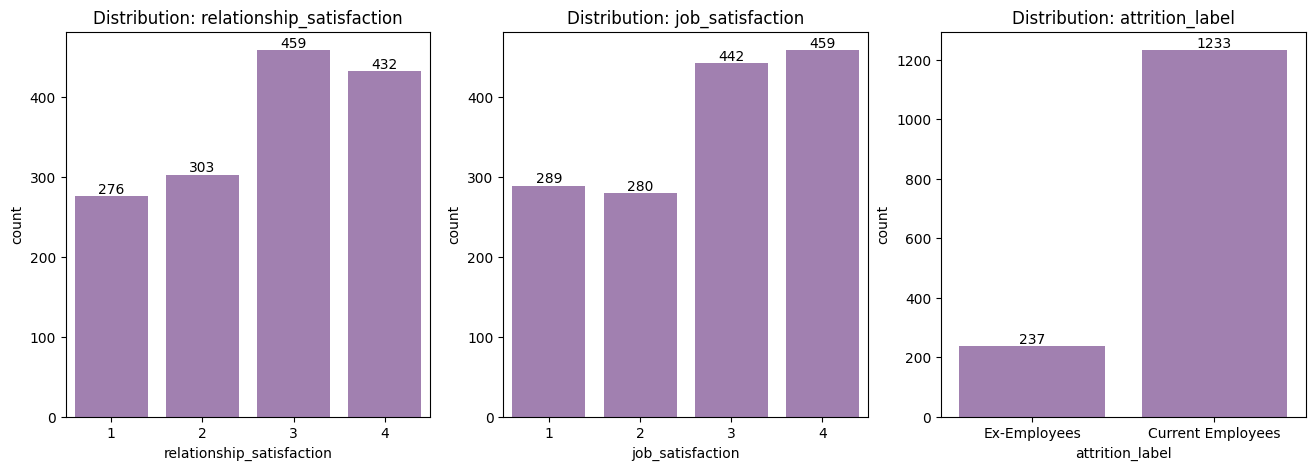

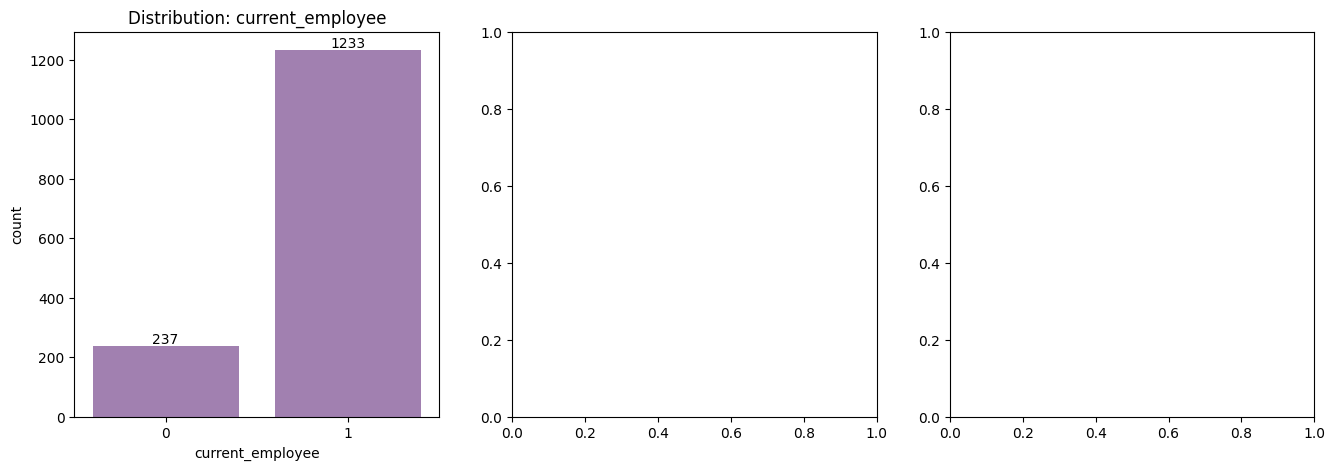

In [ ]:
cate_cols = data[['gender', 'marital_status', 'over18', 'education', 'education_field', 'department', 'job_role', 'business_travel',
                  'job_level', 'job_involvement', 'over_time', 'stock_option_level', 'work_life_balance',
                  'environment_satisfaction', 'performance_rating', 'relationship_satisfaction',
                  'job_satisfaction', 'attrition_label', 'current_employee']]
for i in range(7):
    fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (16,5))
    a = 1
    for j in cate_cols.columns[(i*3) : (i*3) + 3]:
        plt.subplot(1,3,a)
        fig_churn = sns.countplot(x = cate_cols[j], color = '#A478B8')
        fig_churn.bar_label(fig_churn.containers[0])
        if len(cate_cols[j].unique()) > 4:
            plt.xticks(rotation=90)
        plt.title('Distribution: ' + j)
        a += 1

- **Giới tính (gender):** Công ty có đa số nhân viên là nam (chiếm 60%).
- **Tình trạng hôn nhân (marital_status):** Hầu hết nhân viên đã kết hôn (điều này có thể được giải thích bởi đa số nhân viên có độ tuổi từ 27-40, đây là độ tuổi lập gia đình và ổn định cuộc sống). Số lượng nhân viên độc thân và đã ly dị không có sự chênh lệch nhiều.
- **Nhân viên trên 18 tuổi (over18):** Chỉ có giá trị "Y" => Loại bỏ biến này.
- **Trình độ học vấn (education):** Đa số nhân viên có bằng cử nhân đại học, tiếp đến là thạc sĩ và thấp nhất là bằng tiến sĩ.
- **Lĩnh vực giáo dục (education_field)**: Đa số nhân viên có trình độ học vấn liên quan đến ngành Khoa học đời sống (Life Sciences), tiếp đến là Y học (Medical), Marketing, Kỹ thuật (Technical Degree) và có một số nhân viên có chuyên ngành khác. Số lượng nhân viên có chuyên ngành liên quan đến Nhân sự (HR) ít nhất, điều này có thể được giải thích bởi số lượng nhân viên trong phòng ban Nhân sự cũng thấp nhất.
- **Vai trò trong công việc (job_role):**
    + Có tổng cộng 9 vai trò tất cả.
    + Số lượng nhân viên là chuyên viên kinh doanh (Sales Executive) chiếm nhiều nhất, còn số nhân viên có vai trò liên quan đến Nhân sự (HR) là thấp nhất.
- **Tần suất công tác (business_travel):** Hầu hết nhân viên của công ty rất ít khi đi công tác (1043 nhân viên tương ứng 71%), số lượng nhân viên đi công tác thường xuyên chiếm  19%, còn lại khoảng 10% nhân viên không đi công tác.
- **Phòng/ban (department):** Bao gồm 3 phòng/ban, trong đó phòng/ban R&D có số lượng nhân sự nhiều nhất và HR có số lượng nhân sự ít nhất.
- **Cấp độ công việc (job_level):** Khoảng 50% nhân viên thuộc level 1, 2.
- **Mức độ tích cực khi tham gia công việc (job_involvement):** Đa số nhân viên có mức độ tích cực tham gia công việc từ cao trở lên (mức độ cao chiếm khoảng 60%, trong khi rất cao chiếm khoảng 10%).
- **Tăng ca (over_time):** Tỷ lệ nhân viên có làm việc tăng ca là 25%.
- **Quyền lựa chọn cổ phiếu (stock_option_level):**
    + Số lượng nhân viên giảm mạnh khi mức độ trong quyền lựa chọn cổ phiếu tăng lên.
    + Đa số nhân viên có quyền lựa chọn cổ phiếu ở mức 0 và 1 (chiếm hơn 83%). Chỉ có một lượng nhỏ nhân viên có quyền lựa chọn cổ phiếu ở mức 2 và 3 (mức càng cao quyền càng cao).
- **Mức độ cân bằng giữa công việc và cuộc sống (work_life_balance):** Hơn 70% nhân viên có mức độ cân bằng giữa công việc và cuộc sống từ tốt trở lên (trong đó 60% cảm thấy rất tốt và khoảng 10% trong trạng thái cân bằng tốt nhất giữa công việc và cuộc sống cá nhân).  
- **Hiệu suất làm việc (performance_rating):** Toàn bộ nhân viên đều có hiệu suất làm việc từ xuất sắc trở lên, trong đó gần 85% nhân viên có hiệu suất làm việc xuất sắc, còn lại là cực kì nổi bật (trên cả xuất sắc).
- **Sự hài lòng về môi trường (environment_satisfaction), về công việc (job_satisfaction) và về các mối quan hệ với đồng nghiệp (relationship_satisfaction):** Đa số nhân viên đều có mức độ hài lòng từ cao trở lên.
- Biến 'attrition_label' và 'current_employee' thể hiện nhân viên còn làm việc tại công ty hay không, và chúng mang ý nghĩa giống như biến target 'attrition'. Đồng thời, hai biến 'emp_no', 'employee_number' là hai biến định danh cho mỗi nhân viên => Loại bỏ 4 biến này.


## 2.2 Multivariate Analysis (with target variable)

- Thông tin chung về nhân viên (General Employee Information) : 'age', 'gender','marital_status', 'education', 'distance_from_home', 'total_working_years', 'num_companies_worked'.

- Tài chính (Finance): 'percent_salary_hike, 'hourly rate', 'daily rate', 'monthly rate', 'monthly income', 'stock option level'.

- Sự cam kết (Commitment): 'over_time', 'years_at_company', 'years_in_current_role', 'years_with_curr_manager', 'years_since_last_promotion'.

- Đánh giá (Rating): 'job_involvement', 'job_satisfaction', 'work_life_balance', 'performance_rating', 'environment_satisfaction', 'relationship_satisfaction'.

- Đặc điểm liên quan đến công việc (Job related features): 'education_field', 'department', 'job_level', 'job_role', 'training_times_last_year', 'business_travel'.




### 2.2.1 General Employee Information

#### 2.2.1.1 Age

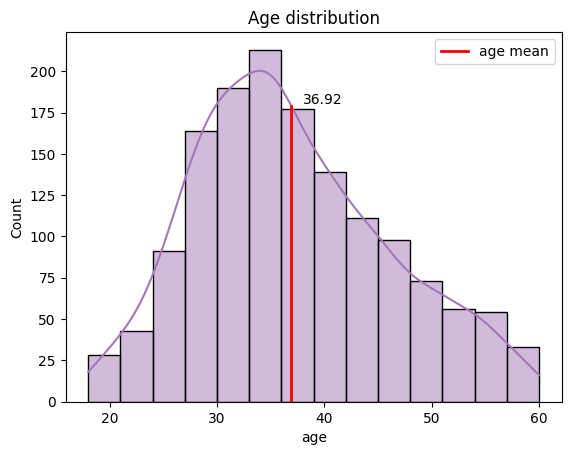

In [ ]:
sns.histplot(data['age'], kde= True, binwidth= 3, color='#A478B8')
plt.axvline(data['age'].mean(), color = 'red', linewidth = 2, ymax = 0.8, label = 'age mean')
plt.title('Age distribution')
plt.text(x= 38, y = 180, s = round(data['age'].mean(),2))
plt.legend()
plt.show()

In [ ]:
age_counts = data['age'].between(27, 43).sum()
total_count = len(data['age'])

percentage = (age_counts / total_count) * 100
percentage

65.37414965986395

**Nhận xét**: Độ tuổi của nhân viên trong công ty chủ yếu trong khoảng từ 27 đến 43 (chiếm đến 65% toàn công ty).

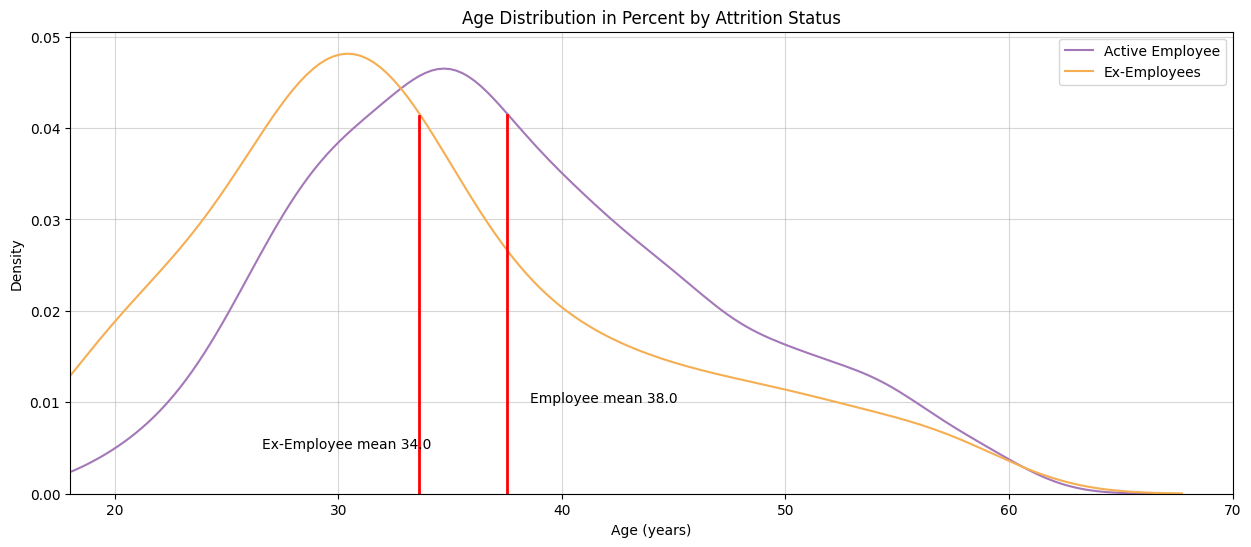

In [ ]:
plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['attrition'] == 0, 'age'], label = 'Active Employee', color='#A478B8')
sns.kdeplot(data.loc[data['attrition'] == 1, 'age'], label = 'Ex-Employees', color='#F5AE52')
plt.axvline(data.loc[data['attrition'] == 0, 'age'].mean(), ymax = 0.82, linewidth = 2,  color = 'red')
plt.axvline(data.loc[data['attrition'] == 1, 'age'].mean(), color = 'red',ymax = 0.818, linewidth = 2)
plt.annotate(xy= (data.loc[data['attrition'] == 0, 'age'].mean()+1, 0.01), xytext= (data.loc[data['attrition'] == 0, 'age'].mean()+1, 0.01) ,text = f"Employee mean {data.loc[data['attrition'] == 0, 'age'].mean().round()}" )
plt.annotate(xy= (data.loc[data['attrition'] == 1, 'age'].mean()-7, 0.005), xytext= (data.loc[data['attrition'] == 1, 'age'].mean()-7, 0.005) ,text = f"Ex-Employee mean {data.loc[data['attrition'] == 1, 'age'].mean().round()}" )
plt.xlim(left=18, right=70)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by Attrition Status');

**Nhận xét**: Độ tuổi trung bình của nhân viên đã nghỉ việc ít hơn so với những người người vẫn đang làm tại công ty.

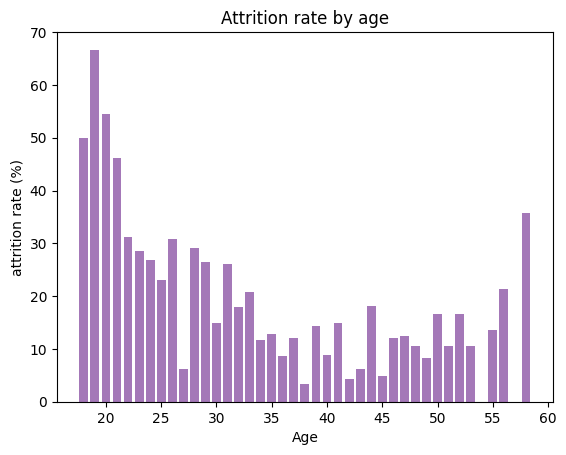

In [ ]:
t = data[data['attrition'] == 1]['age'].value_counts()*100/data['age'].value_counts()
plt.bar(x=t.index , height = t.values, color='#A478B8')
plt.ylabel('attrition rate (%)')
plt.xlabel('Age')
plt.title('Attrition rate by age')
plt.show()

**Nhận xét**: Mặc dù nhân viên của công ty tập trung từ độ tuổi 27 đến 43, tuy nhiên nhóm có tỉ lệ nghỉ việc cao nhất ở công ty lại là nhóm từ 18 đến 21.

#### 2.2.1.2 Marital Status and Gender

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

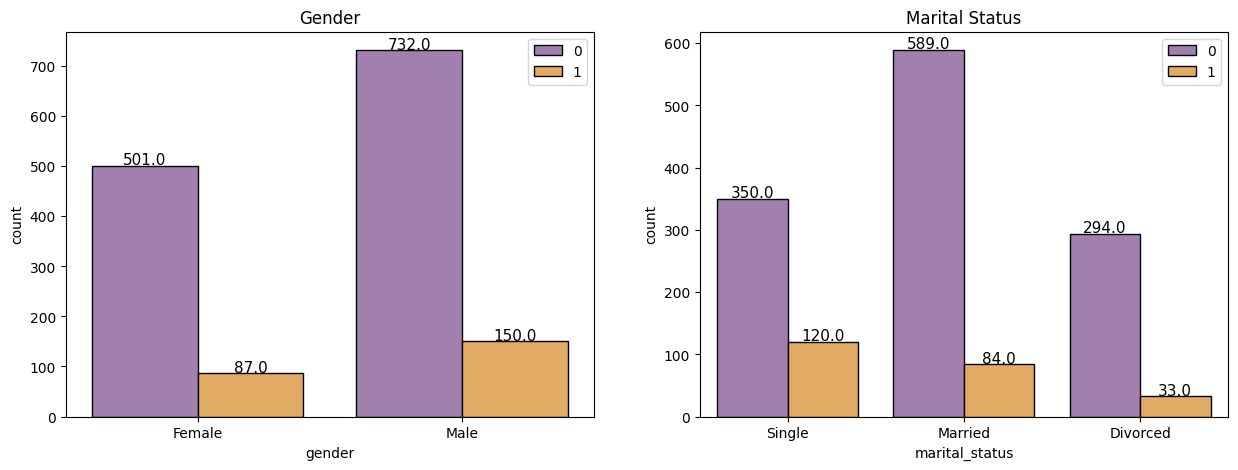

In [ ]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
ax = sns.countplot(x= 'gender',data = data, hue = 'attrition',edgecolor = 'black', palette=color)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend()
plt.title('Gender');

plt.subplot(1,2,2)
ax = sns.countplot(x= 'marital_status',data = data, hue = 'attrition',edgecolor = 'black',palette=color)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend()
plt.title('Marital Status');

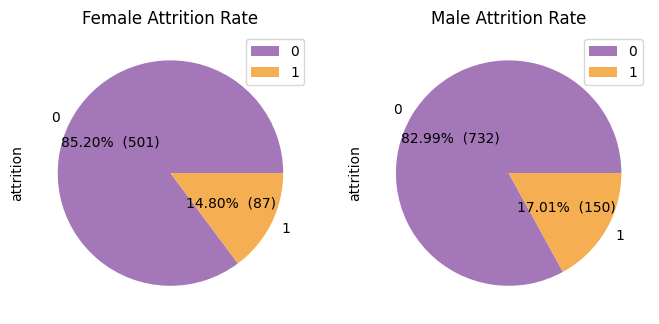

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize= (8,4))
data[data['gender']== 'Female' ]['attrition'].value_counts().plot.pie(ax= ax[0], autopct = make_autopct(data[data['gender']== 'Female' ]['attrition'].value_counts()), colors=['#A478B8', '#F5AE52'])
data[data['gender']== 'Male' ]['attrition'].value_counts().plot.pie(ax= ax[1], autopct = make_autopct(data[data['gender']== 'Male' ]['attrition'].value_counts()), colors=['#A478B8', '#F5AE52'])
ax[0].set_title('Female Attrition Rate')
ax[0].legend()
ax[1].set_title('Male Attrition Rate')
ax[1].legend()
plt.show()

**Nhận xét**: Không có sự khác biệt nhiều về tỉ lệ rời bỏ công ty giữa hai giới tính.

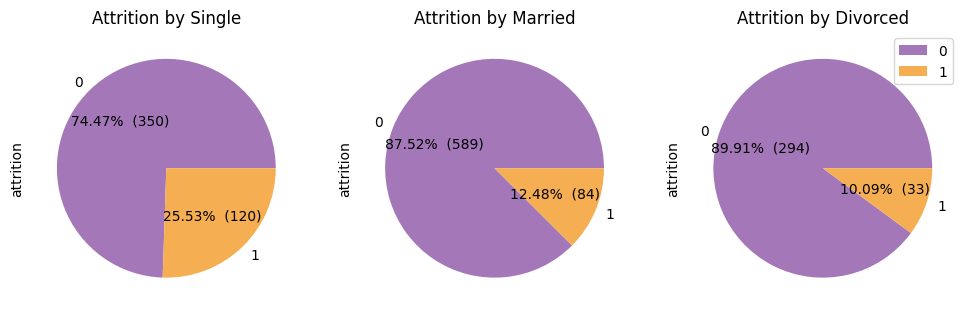

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols=3, figsize = (12,5))
for a,i in enumerate(data.marital_status.unique()):
    data[data['marital_status']== i ]['attrition'].value_counts().plot.pie(ax= ax[a], autopct = make_autopct(data[data['marital_status']== i ]['attrition'].value_counts()),colors=['#A478B8', '#F5AE52'])
    ax[a].set_title(f'Attrition by {i}')
plt.legend()
plt.show()

-> Những người độc thân có tỉ lệ rời bỏ công ty cao hơn hẳn những người đã hoặc đã từng lập gia đình.

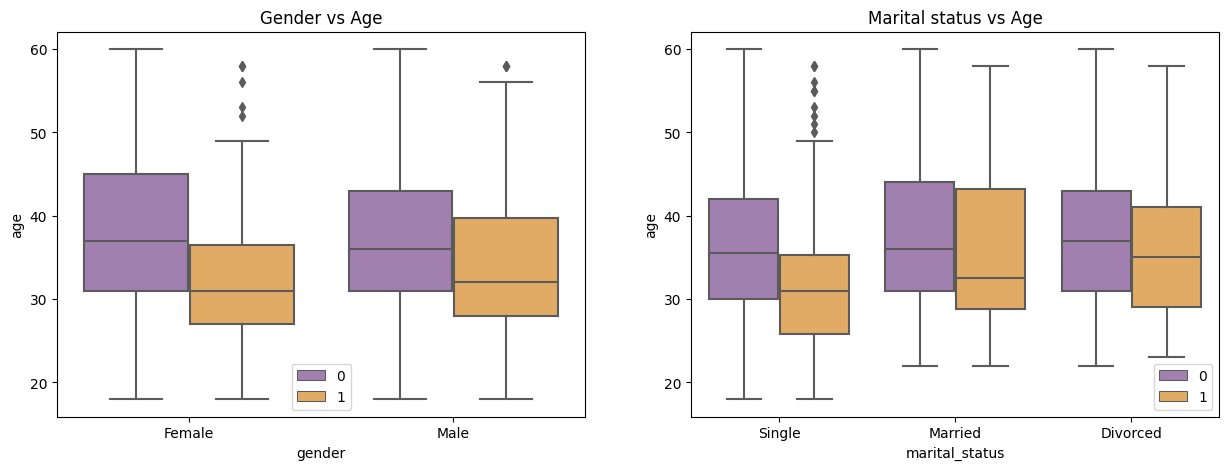

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in range(len(['gender', 'marital_status'])):
    plt.subplot(1,2,i+1)
    ax = sns.boxplot(x = ['gender', 'marital_status'][i],y = 'age',data = data,hue = 'attrition', palette = color);
    plt.legend()
    plt.title(['Gender', 'Marital status'][i] + ' vs Age')

**Nhận xét**:
- Đối với giới tính, cả nam và nữ đều có xu hướng nghỉ việc ở độ tuổi trẻ hơn.
- Tuy nhiên đối với tình trạng hôn nhân, những người có xu hướng nghỉ việc ở độ tuổi trẻ hơn là những người độc thân, điều này là khá tự nhiên vì những người chưa lập gia đình thường là những người trẻ.
\
Trong khi đó không có sự khác biệt lớn về độ tuổi nghỉ làm của nhóm người đã kết hôn hoặc ly hôn. Đồng thời, trong cùng nhóm những người giống nhau về tình trạng kết hôn, chỉ có nhóm độc thân có sự khác biệt về độ tuổi giữa 2 nhóm rời đi và ở lại - cụ thể nhóm độc thân rời đi có độ tuổi thấp hơn hẳn nhóm độc thân nhưng ở lại, còn giữa nhóm những người đã kết hôn và ly hôm ko có sự khác biệt rõ ràng giữa những người rời đi và người ở lại.

#### 2.2.1.3 Education

In [ ]:
def boxplots(category):
    num_cols_with_cat = df[[category, 'age', 'distance_from_home', 'daily_rate',  'hourly_rate', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager', 'years_at_company', 'total_working_years', 'training_times_last_year', 'environment_satisfaction',   'performance_rating', 'relationship_satisfaction', 'job_involvement', 'job_level', 'job_satisfaction', 'stock_option_level','attrition']]
    num_cols = df[['age', 'distance_from_home', 'daily_rate',  'hourly_rate', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager', 'years_at_company', 'total_working_years', 'training_times_last_year', 'environment_satisfaction',   'performance_rating', 'relationship_satisfaction', 'job_involvement', 'job_level', 'job_satisfaction', 'stock_option_level']]
    nrows = num_cols.shape[1]//3
    fig,ax = plt.subplots(nrows = nrows, ncols = 3, figsize = (12,25) )
    for i, column in enumerate(num_cols.columns):
        row = i// 3
        col = i % 3
        sns.boxplot(data = num_cols_with_cat, x = category, y = column, ax = ax[row-1,col-1], color = '#A478B8')
        ax[row-1,col-1].set_title(f'Distr of {column} by {category}')
        ax[row-1,col-1].tick_params(axis = 'x', rotation = 50)
        ax[row-1,col-1].legend(loc = 'upper left')
    plt.tight_layout()

In [ ]:
def countplot(data, x, hue):
    plt.figure(figsize= (10,5))
    fig_churn = sns.countplot(data= data,x = x ,hue = hue, palette=color)
    fig_churn.bar_label(fig_churn.containers[0])
    fig_churn.bar_label(fig_churn.containers[1])
    plt.tick_params(axis = 'x', rotation = 50)
    plt.tight_layout()

In [ ]:
def auto_pie_chart(column, nrows, hue):
    fig, ax = plt.subplots(nrows = nrows, ncols=3 , figsize = (15,10))
    for i, x in enumerate(data[column].unique()):
        row = i//3
        col = i%3
        data[data[column] == x][hue].value_counts().plot.pie(ax = ax[row-1, col-1], autopct = make_autopct(data[data[column] == x][hue].value_counts()),colors=['#A478B8', '#F5AE52'])
        ax[row-1, col-1].set_title(f'{hue} by {column}: {x}')
        ax[row-1, col-1].set_ylabel('')
        ax[row-1, col-1].legend()

In [ ]:
def right_career(row):
    if (row['department'] == 'HR') and row['education_field'] in ['Medical', 'Marketing', 'Technical Degree', 'Life Sciences']:
        return 'no'
    elif (row['department'] == 'Sales') and row['education_field'] in ['Medical', 'Technical Degree', 'Life Sciences', 'Human Resources']:
        return 'no'
    else: return 'yes'

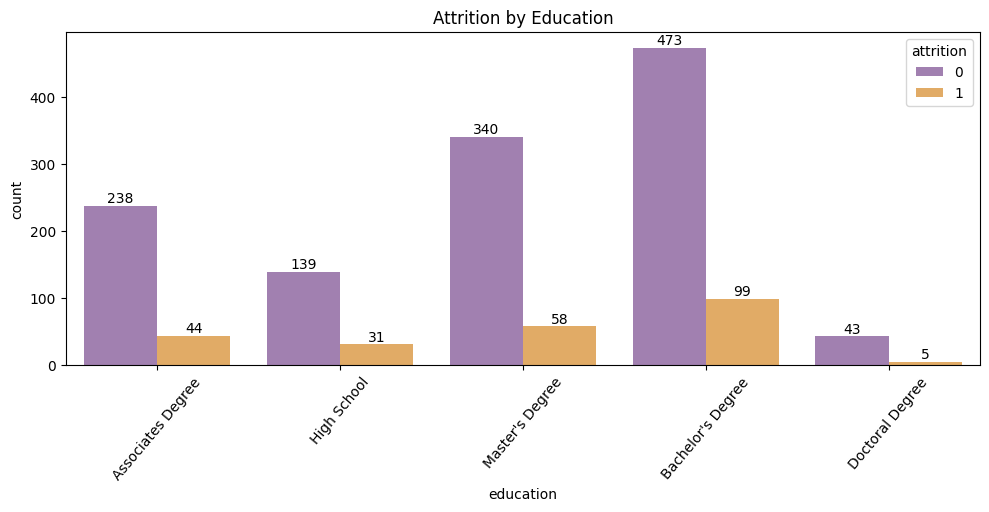

In [ ]:
countplot(data, 'education', 'attrition')
plt.title('Attrition by Education')
plt.show()

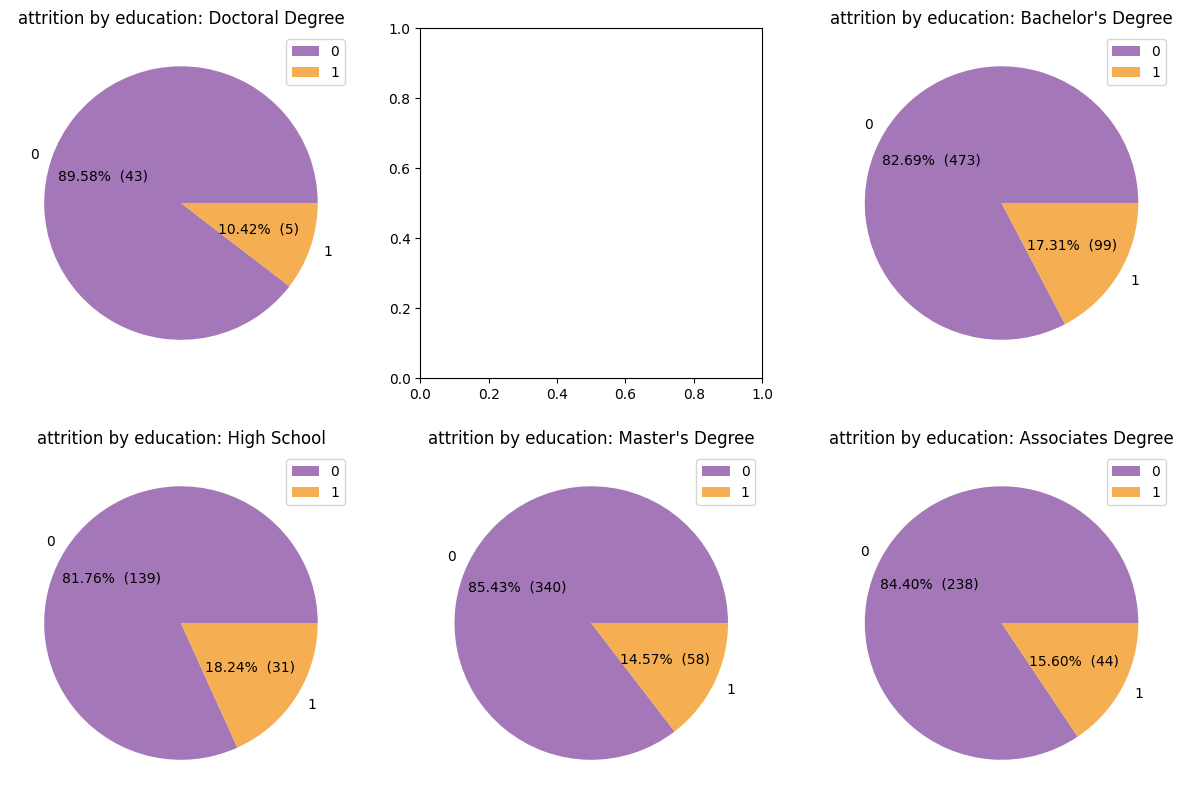

In [ ]:
auto_pie_chart('education', 2, 'attrition')

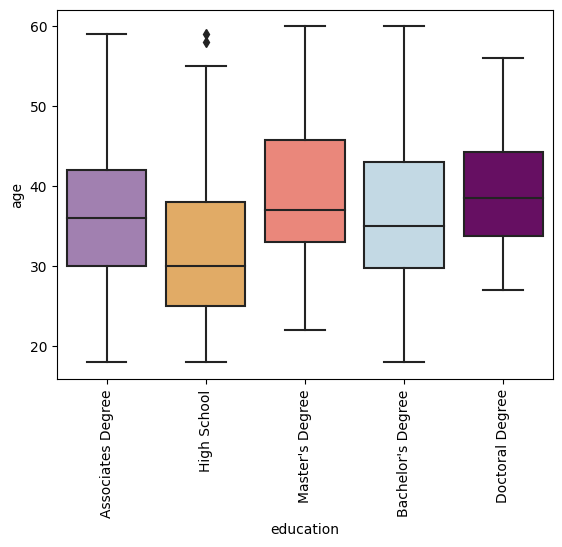

In [ ]:
sns.boxplot(x = 'education', y = 'age', data = data, palette = color)
plt.xticks(rotation=90)
plt.show()

**Nhận xét**: Trình độ bằng cấp càng cao thì tỉ lệ rời bỏ công ty càng thấp, trong đó nhóm có tỉ lệ rời bỏ cao nhất là High school. Nhóm high school cũng là nhóm có độ tuổi trung bình thấp hơn các nhóm khác.

#### 2.2.1.4 Distance from home

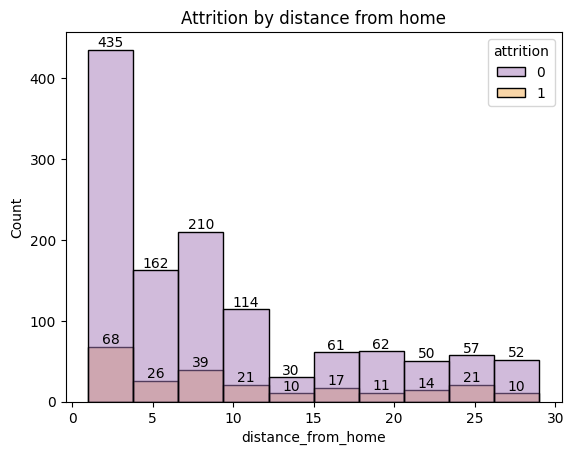

In [ ]:
fig_churn= sns.histplot(x = data['distance_from_home'], hue = data['attrition'], bins = 10, palette = color)
fig_churn.bar_label(fig_churn.containers[0])
fig_churn.bar_label(fig_churn.containers[1])
plt.title('Attrition by distance from home')
plt.show()

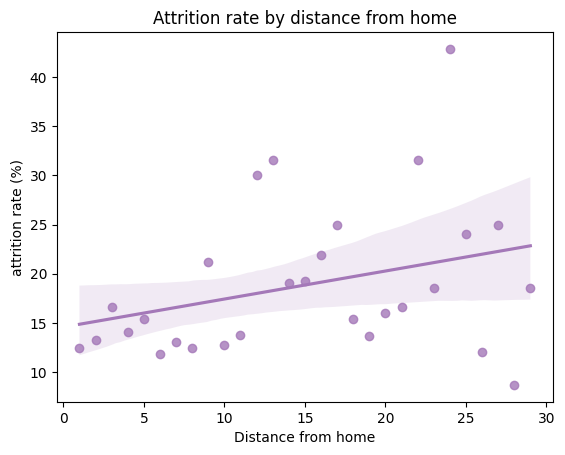

In [ ]:
t = data[data['attrition'] == 1]['distance_from_home'].value_counts()*100/data['distance_from_home'].value_counts()
sns.regplot(x=t.index , y = t.values, color='#A478B8')
plt.ylabel('attrition rate (%)')
plt.xlabel('Distance from home')
plt.title('Attrition rate by distance from home')
plt.show()

**Nhận xét**: Nhìn chung, nhân viên có nhà càng xa công ty thì có xu hướng rời bỏ công ty cao hơn.

#### 2.2.1.5 Total working years

<Axes: xlabel='attrition', ylabel='total_working_years'>

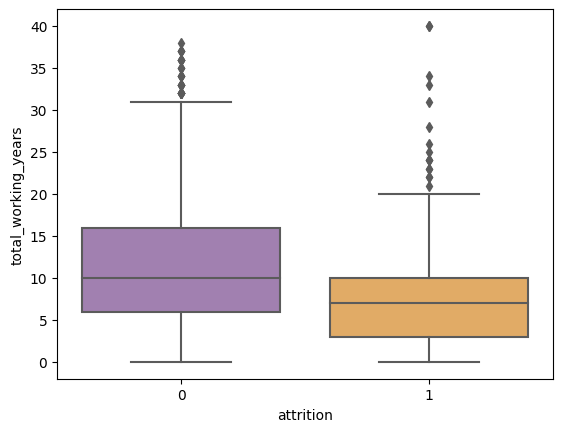

In [ ]:
sns.boxplot(x= 'attrition', y = 'total_working_years', data= data, palette = color)

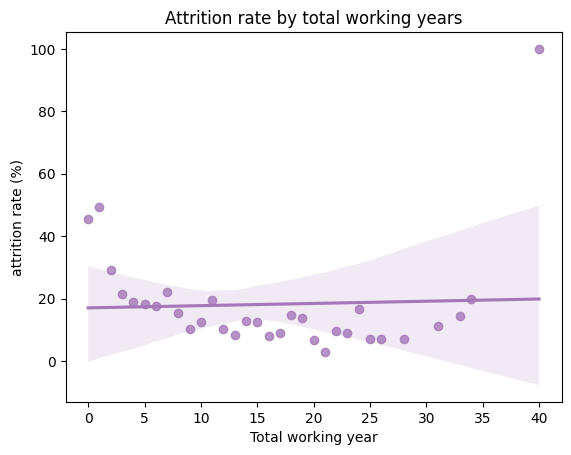

In [ ]:
t = data[(data['attrition'] == 1)]['total_working_years'].value_counts()*100/data['total_working_years'].value_counts()
sns.regplot(x=t.index , y = t.values, color='#A478B8')
plt.ylabel('attrition rate (%)')
plt.xlabel('Total working year')
plt.title('Attrition rate by total working years')
plt.show()

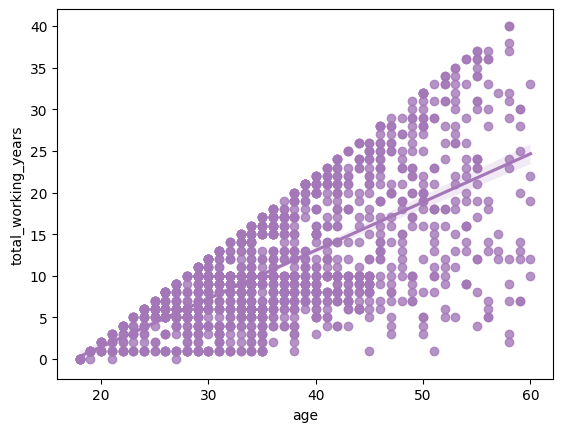

In [ ]:
sns.regplot(x= 'age', y = 'total_working_years', data = data, color='#A478B8')
plt.show()

**Nhận xét**:
- Phân tích tổng số năm đi làm giữa 2 nhóm rời đi và ở lại đem đến kết luận tương tự với phân tích độ tuổi, nhóm rời đi có số năm đi làm thấp hơn hẳn nhóm tiếp tục ở lại. Điều này là do số năm làm việc tỷ lệ thuận với độ tuổi của mỗi người
- Những người có số năm kinh nghiệm thấp, độ tuổi trẻ sẽ có khả năng cao là rời bỏ công ty.
- Có trường hợp 1 nhân sự có 40 năm làm việc ở công ty nhưng cũng đã rời công ty. Đây có thể là trường hợp nhân sự đã đến tuổi nghỉ hưu nên đã rời công ty.

#### 2.2.1.6 Number of companies worked

<Axes: xlabel='attrition', ylabel='num_companies_worked'>

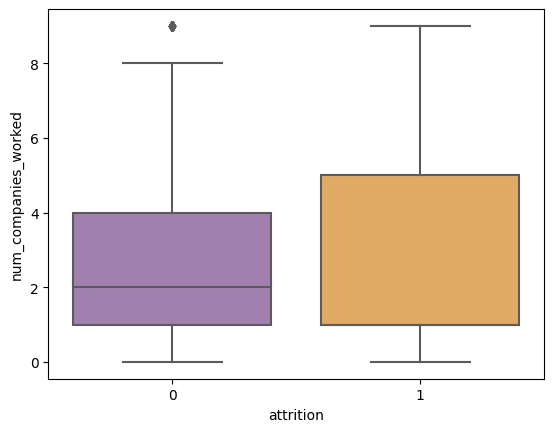

In [ ]:
sns.boxplot(x= 'attrition', y = 'num_companies_worked', data= data, palette=color)

In [ ]:
def clustered(feature):
    plt.figure(figsize = (5,5))
    ax = sns.countplot(data = data, x=feature, hue = 'attrition', palette =  ['#A478B8', '#F5AE52'] ,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.legend(['0', '1'], loc = 'upper right')

Text(0.5, 1.0, 'Number of attrited employees by number of companies worked')

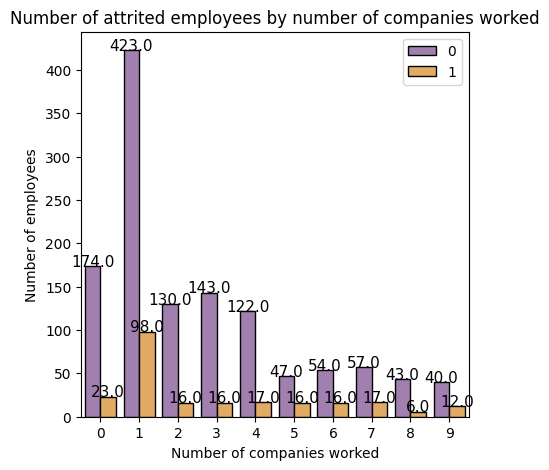

In [ ]:
clustered('num_companies_worked')
plt.ylabel('Number of employees')
plt.xlabel('Number of companies worked')
plt.title('Number of attrited employees by number of companies worked')

**Nhận xét**: Đa số nhân viên đã từng làm qua khá ít công ty, đối với đa số nhân viên thì công ty hiện tại là công ty đầu tiên hoặc thứ hai của họ.

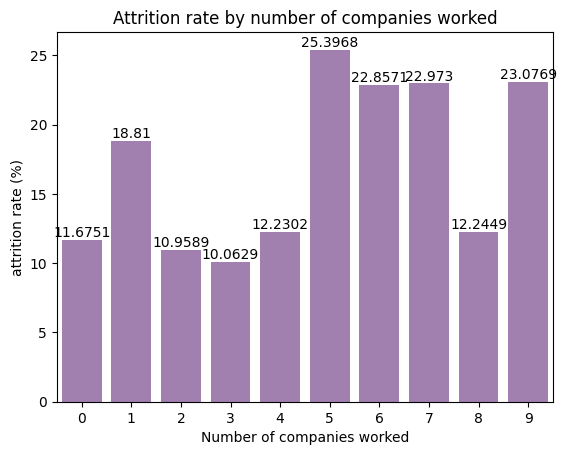

In [ ]:
t = data[(data['attrition'] == 1)]['num_companies_worked'].value_counts()*100/data['num_companies_worked'].value_counts()
fig_churn = sns.barplot(x=t.index , y = t.values, color ='#A478B8')
fig_churn.bar_label(fig_churn.containers[0])
plt.ylabel('attrition rate (%)')
plt.xlabel('Number of companies worked')
plt.title('Attrition rate by number of companies worked')
plt.show()

**Nhận xét**:
- Tỷ lệ rời đi cao (18.81%) (với mức cao nhất là 25.3% của nhóm đã làm qua 5 công ty) cũng đến từ nhóm nhân viên mới chỉ từng làm qua 1 công ty.
- Tỷ lệ rời đi cao (>20%) cũng được nhận thấy ở 5 nhóm đã từng làm qua nhiều công ty (5, 6, 7, 9).
- Đáng chú ý là tỷ lệ nhân sự rời đi trong nhóm những nhân sự có công ty hiện tại là công ty đầu tiên cũng thuộc nhóm thấp mặc dù có số lượng nhân sự khá cao. Điều này chứng tỏ tỷ lệ giữ chân nhân sự đối với những người lần đầu đi làm khá tốt.

Text(0.5, 1.0, 'Distribution of age by number of companies worked')

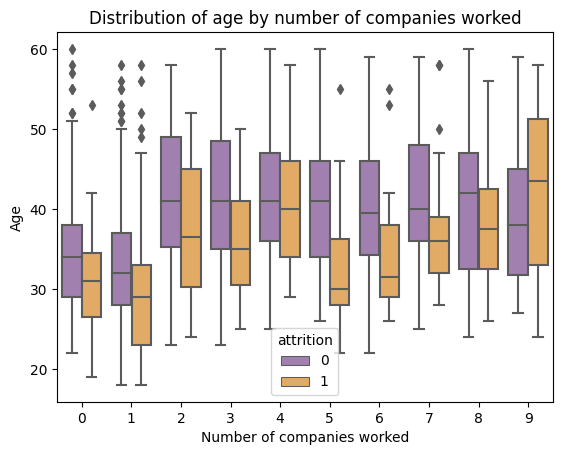

In [ ]:
sns.boxplot(x= 'num_companies_worked', y = 'age', hue = 'attrition', data= data, palette = color)
plt.xlabel('Number of companies worked')
plt.ylabel('Age')
plt.title('Distribution of age by number of companies worked')

**Nhận xét**:
- Nhóm những người có công ty hiện tại là công ty đầu tiên hoặc thứ hai có độ tuổi trung bình thấp hơn so với những nhóm còn lại.
- Độ tuổi trung bình của nhóm những người đã từng làm qua duy nhất một công ty trước đây và đã rời công ty thấp nhất trong tất cả.

Text(0.5, 1.0, 'Number of years at current company by number of companies worked')

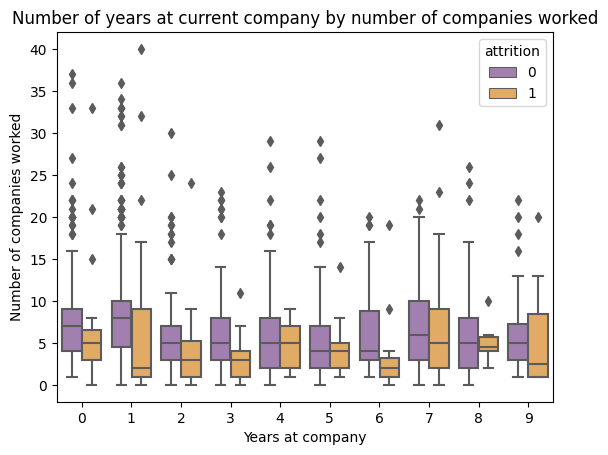

In [ ]:
sns.boxplot(x= 'num_companies_worked', y = 'years_at_company', hue = 'attrition', data= data, palette = color)
plt.xlabel('Years at company')
plt.ylabel('Number of companies worked')
plt.title('Number of years at current company by number of companies worked')

**Nhận xét**:
- Cả độ tuổi trung bình và số năm làm việc tại công ty hiện tại của nhóm nhân viên chỉ từng làm ở một công ty và đã rời đi đều thấp so với những nhóm còn lại, từ đó có thể suy đoán nhóm những người này là những người trẻ tuổi và mức độ gắn bó với công ty không cao.
- Số năm làm việc tại công ty của nhóm những người có công ty hiện tại là công ty thứ 6, 7, 8, 10 và đã rời công ty cũng thấp hơn nhóm ở lại, do đó có thể thấy những người rời đi có mức độ gắn bó với công ty không cao bằng nhóm tiếp tục ở lại.

Text(0.5, 1.0, 'Environment satisfaction by number of companies worked')

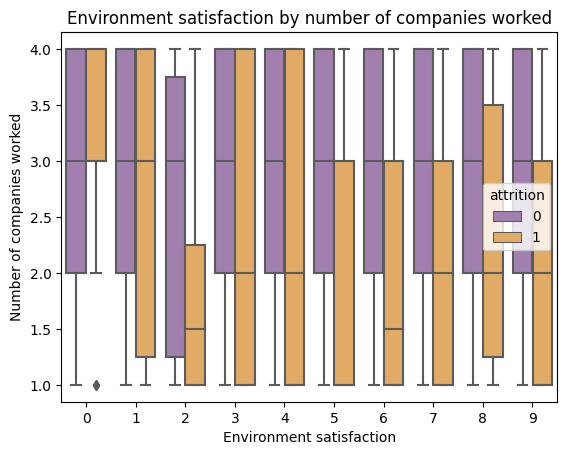

In [ ]:
sns.boxplot(x= 'num_companies_worked', y = 'environment_satisfaction', hue = 'attrition', data= data, palette = color)
plt.xlabel('Environment satisfaction')
plt.ylabel('Number of companies worked')
plt.title('Environment satisfaction by number of companies worked')

**Nhận xét**: Mức độ thỏa mãn về môi trường làm việc của nhóm những người có công ty hiện tại là công ty thứ 6, 7, 8, 10 và đã rời công ty nhìn chung thấp hơn nhóm vẫn tiếp tục ở lại, đây là một cơ sở cho thấy việc môi trường không đáp ứng nhu cầu của nhóm này là một trong những nguyên nhân khiến họ rời đi.

In [ ]:
data['num_companies_worked_new'] = data['num_companies_worked']+1

In [ ]:
data['loyalty_rate'] = data['total_working_years']/data['num_companies_worked_new']

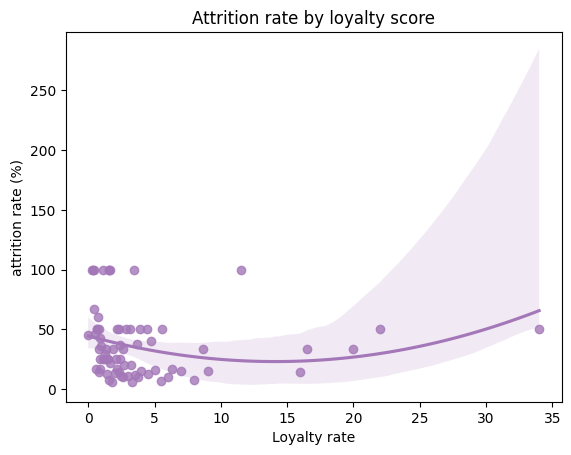

In [ ]:
t = data[(data['attrition'] == 1)]['loyalty_rate'].value_counts()*100/data['loyalty_rate'].value_counts()
sns.regplot(x=t.index , y = t.values ,color='#A478B8', order = 2)
plt.ylabel('attrition rate (%)')
plt.xlabel('Loyalty rate')
plt.title('Attrition rate by loyalty score')
plt.show()

Nhóm đề xuất thêm một chỉ số mới 'loyalty rate' - chỉ số phản ánh mức độ cống hiến với các công ty mà mỗi nhân sự đã và đang làm việc. Chỉ số này được tính bằng cách lấy tổng số năm làm việc của từng nhân viên chia cho số công ty mà nhân viên đó đã làm việc.

**Nhận xét**: Những người có chỉ số loyalty rate thấp có tỉ lệ rời bỏ công ty nhiều hơn, tuy nhiên xu hướng này đảo chiều đối với những người có loyalty rate cao, nhóm này rời bỏ công ty do tuổi nghỉ hưu.

### 2.2.2 Finance

#### 2.2.2.1 Monthly Income

In [ ]:
def monthly_income(row):
    if row < 5000:
        return 'Low'
    elif  row < 10000:
        return 'Middle'
    elif row < 15000:
        return 'High'
    else : return 'Very High'

In [ ]:
data['salary_segment'] = data['monthly_income'].apply(monthly_income)

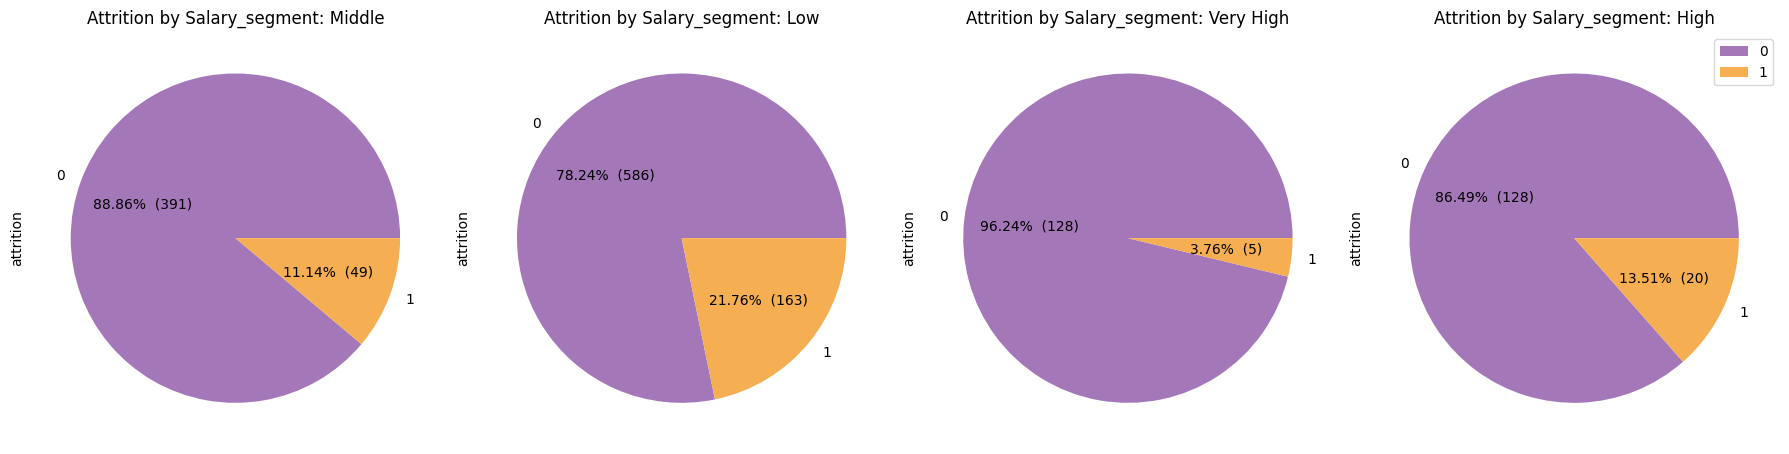

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols=4, figsize = (18,10))
for a,i in enumerate(data.salary_segment.unique()):
    data[data['salary_segment']== i ]['attrition'].value_counts().plot.pie(ax= ax[a], autopct = make_autopct(data[data['salary_segment']== i ]['attrition'].value_counts()), colors=['#A478B8', '#F5AE52'])
    ax[a].set_title(f'Attrition by Salary_segment: {i}')
fig.tight_layout()
plt.legend()
plt.show()

**Nhận xét**:
- Những người ở nhóm mức lương thấp có tỉ lệ rời bỏ cao nhất.
- Hầu hết những nhân viên churn là nhân viên có mức monthly income thấp dưới 10000/tháng.

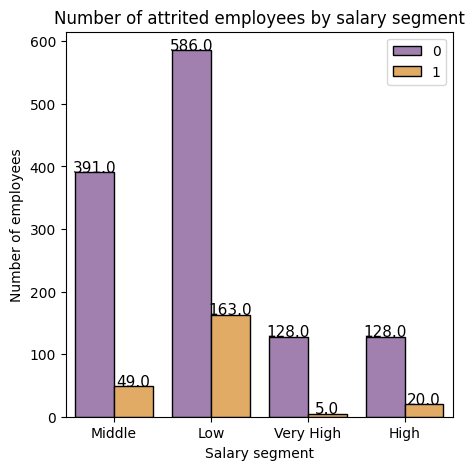

In [ ]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = data, x='salary_segment', hue = 'attrition', palette =  ['#A478B8', '#F5AE52'] ,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['0', '1'], loc = 'upper right')
plt.xlabel('Salary segment')
plt.ylabel('Number of employees')
plt.title(f'Number of attrited employees by salary segment')
plt.show()

#### 2.2.2.2 Hourly, Daily, Monthly rate

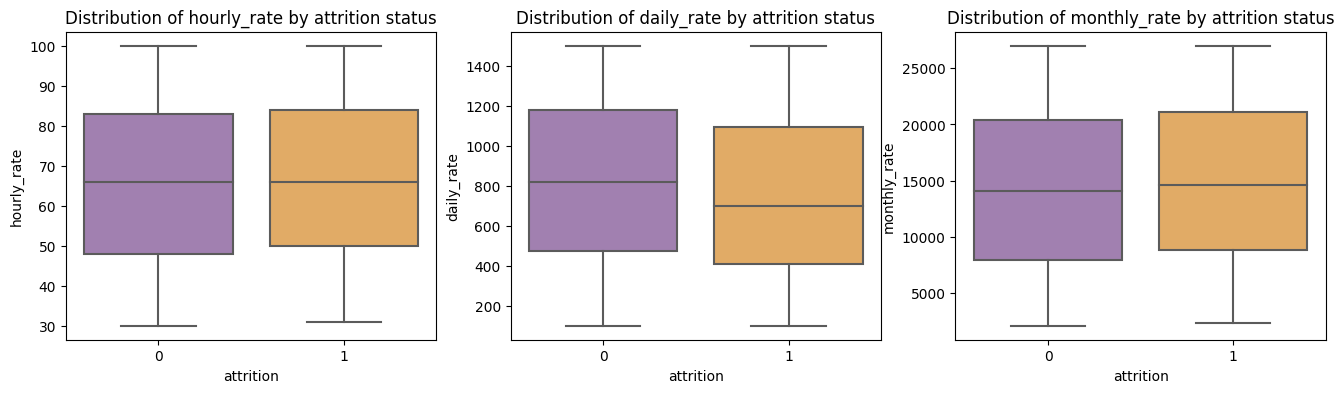

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3, figsize = (22,4))
for i in range(len(['hourly_rate', 'daily_rate', 'monthly_rate'])):
    plt.subplot(1,4,i+1)
    ax = sns.boxplot(x = 'attrition',y = ['hourly_rate', 'daily_rate', 'monthly_rate'][i],data = data, palette = color);
    plt.title('Distribution of ' + ['hourly_rate', 'daily_rate', 'monthly_rate'][i] + ' by attrition status')

**Nhận xét**:
- Số lượng nhân viên ở từng mức lương tương đối bằng nhau.
- Mức lương lý thuyết không phải yếu tố khiến nhân sự quyết định rời hay không rời công ty do tỷ lệ nhân sự dời công ty ở từng mức lương là tương đương nhau.

#### 2.2.2.3 Stock Option Level

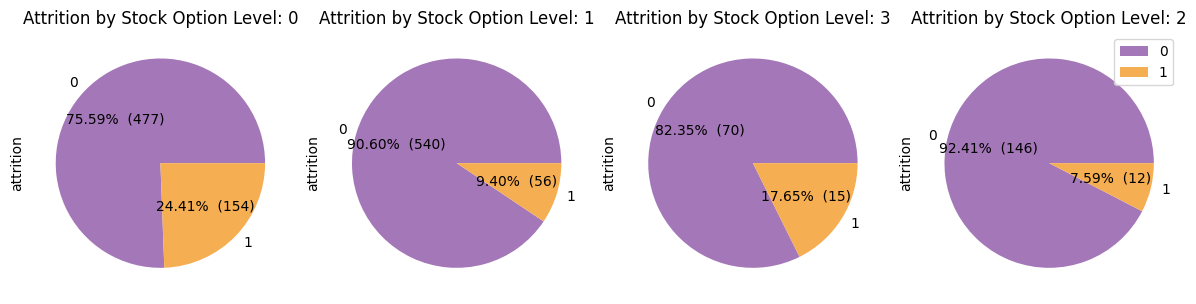

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols=4, figsize = (12,10))
for a,i in enumerate(data.stock_option_level.unique()):
    data[data['stock_option_level']== i ]['attrition'].value_counts().plot.pie(ax= ax[a], autopct = make_autopct(data[data['stock_option_level']== i ]['attrition'].value_counts()), colors=['#A478B8', '#F5AE52'])
    ax[a].set_title(f'Attrition by Stock Option Level: {i}')
fig.tight_layout()
plt.legend()
plt.show()

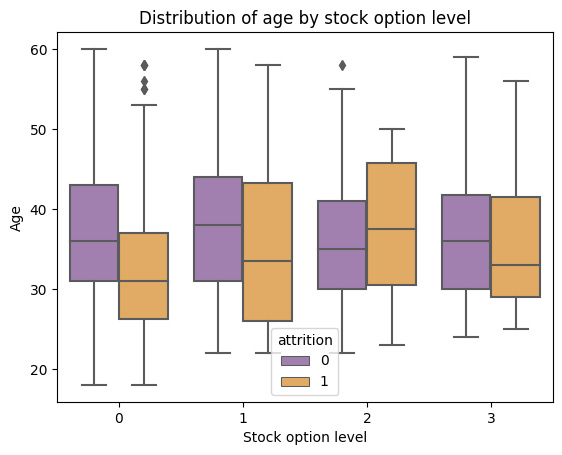

In [ ]:
sns.boxplot(data = data, x = 'stock_option_level', y = 'age', hue = 'attrition', palette = color)
plt.xlabel('Stock option level')
plt.ylabel('Age')
plt.title('Distribution of age by stock option level')
plt.show()

**Nhận xét**:
- Những người có stock option level 0 có xu hướng rời bỏ công ty nhiều hơn.
- Nhóm người có stock option level cao nhất cũng có xu hướng rời bỏ công ty, tỷ trọng rời đi của nhóm này chỉ cao sau nhóm có stock option level 0.

#### 2.2.2.4 Percent Salary Hike

[Text(0, 0, '210'),
 Text(0, 0, '198'),
 Text(0, 0, '209'),
 Text(0, 0, '201'),
 Text(0, 0, '101'),
 Text(0, 0, '78'),
 Text(0, 0, '82'),
 Text(0, 0, '89'),
 Text(0, 0, '76'),
 Text(0, 0, '55'),
 Text(0, 0, '48'),
 Text(0, 0, '56'),
 Text(0, 0, '28'),
 Text(0, 0, '21'),
 Text(0, 0, '18')]

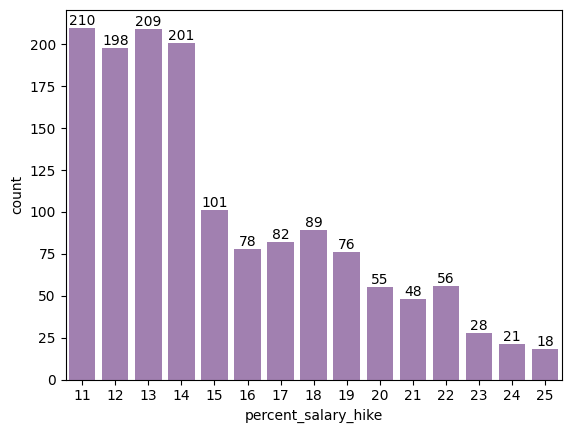

In [ ]:
fig_churn = sns.countplot(x='percent_salary_hike', data = data, color='#A478B8')
fig_churn.bar_label(fig_churn.containers[0])

Text(0.5, 1.0, 'Number of attrited employees by group of salary hike')

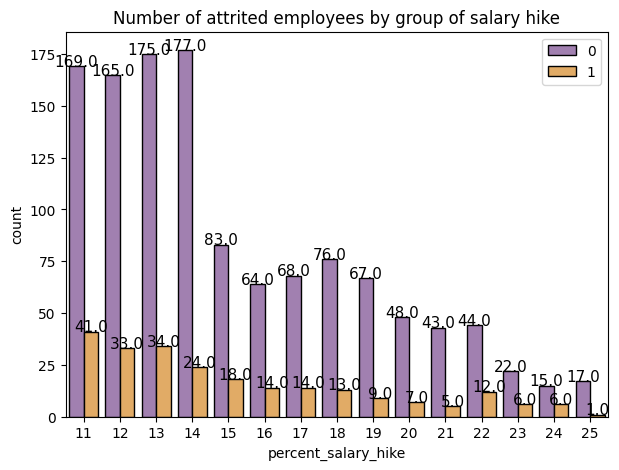

In [ ]:
plt.figure(figsize = (7,5))
ax = sns.countplot(data = data, x='percent_salary_hike', hue = 'attrition', palette =  ['#A478B8', '#F5AE52'] ,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['0', '1'], loc = 'upper right')
plt.title(f'Number of attrited employees by group of salary hike')

**Nhận xét**: Đa số nhân viên có phần trăm tăng lương từ 11-14% và số lượng nhân viên rời đi cũng cao nhất ở những nhóm có tỷ lệ tăng lương thấp.

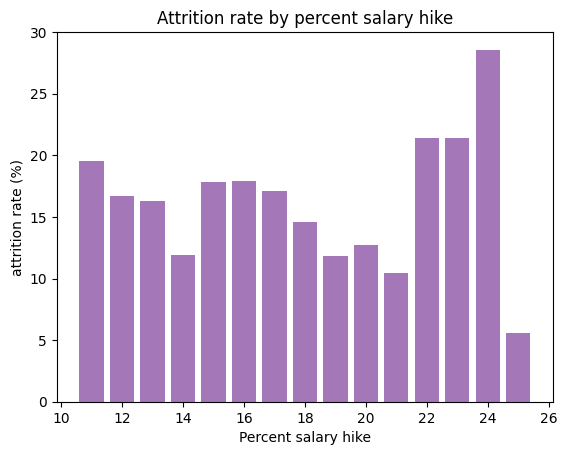

In [ ]:
t = data[data['attrition'] == 1]['percent_salary_hike'].value_counts()*100/data['percent_salary_hike'].value_counts()
fig_churn = plt.bar(x=t.index , height = t.values, color='#A478B8')
plt.ylabel('attrition rate (%)')
plt.xlabel('Percent salary hike')
plt.title('Attrition rate by percent salary hike')
plt.show()

Tỷ lệ nhân viên rời đi giữa các nhóm nhân viên không theo quy luật rõ ràng, tỷ lệ này cao nhất ở nhóm nhân sự được tăng 22-24% cao bất thường vì nhóm này có ít nhân sự nên tỷ lệ nhân viên rời đi chỉ mang tính tham khảo.

### 2.2.3 Commitment

#### 2.2.3.1 Overtime

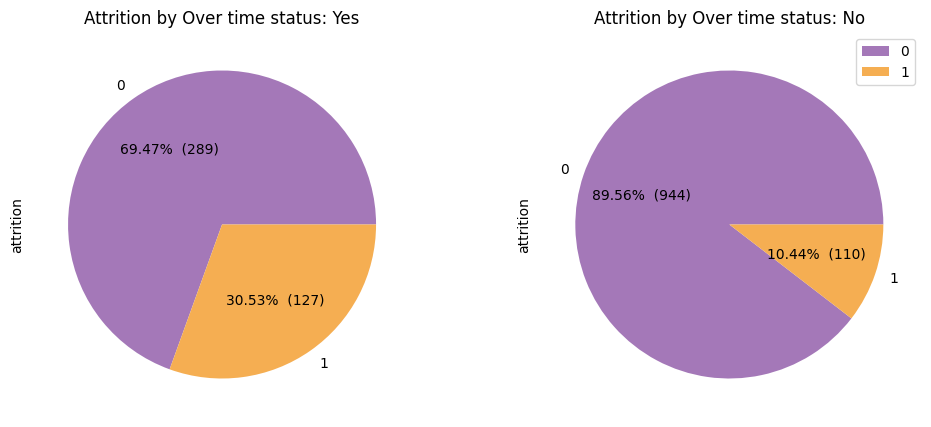

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize = (12,5))
for a,i in enumerate(data.over_time.unique()):
    data[data['over_time']== i ]['attrition'].value_counts().plot.pie(ax= ax[a], autopct = make_autopct(data[data['over_time']== i ]['attrition'].value_counts()),colors=['#A478B8', '#F5AE52'])
    ax[a].set_title(f'Attrition by Over time status: {i}')
plt.legend()
plt.show()

**Nhận xét**: Những người làm overtime có xu hướng rời bỏ công việc cao hơn (cao gấp ba lần nhóm những nhân viên không làm tăng ca).


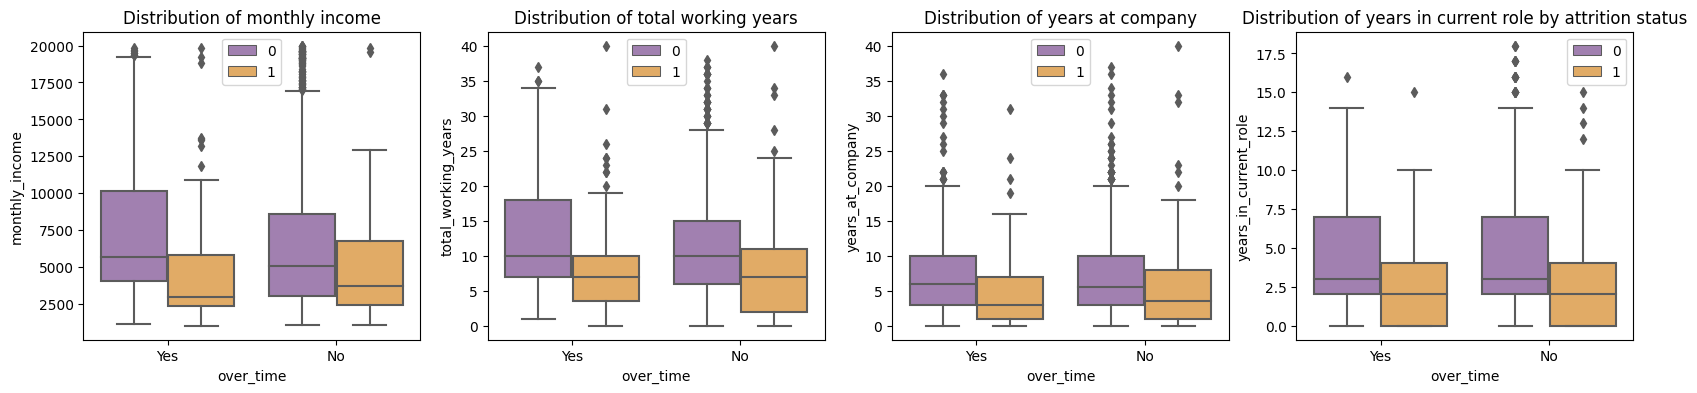

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 4, figsize = (20,4))
for i in range(len(['monthly_income', 'total_working_years', 'years_at_company', 'years_in_current_role'])):
    plt.subplot(1,4,i+1)
    ax = sns.boxplot(x = 'over_time',y = ['monthly_income', 'total_working_years', 'years_at_company', 'years_in_current_role'][i],data = data,hue = 'attrition', palette = color);
    plt.legend()
    plt.title('Distribution of ' + ['monthly income', 'total working years', 'years at company', 'years in current role' + ' by attrition status'][i])

**Nhận xét**: Những người tăng ca và đã rời công ty có mức thu nhập thấp hơn nhóm những người tăng ca và ở lại công ty. Tuy nhiên, thu nhập của họ thấp hơn không phải do có sự bất công trong lương thưởng mà do họ ít kinh nghiệm hơn. (Kinh nghiệm làm việc được thể hiện bởi các chỉ số về tổng số năm làm việc, thời gian làm việc tại công ty và thời gian giữ chức vụ hiện tại)

#### 2.2.3.2 Years at company

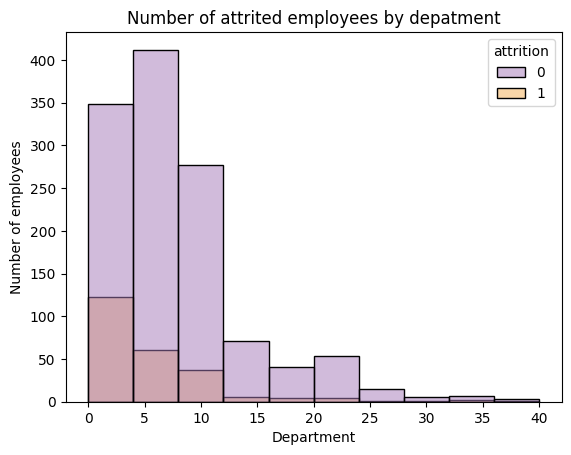

In [ ]:
sns.histplot(x = data['years_at_company'], hue = data['attrition'], bins = 10, palette = color)
plt.title('Number of attrited employees by depatment')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.show()

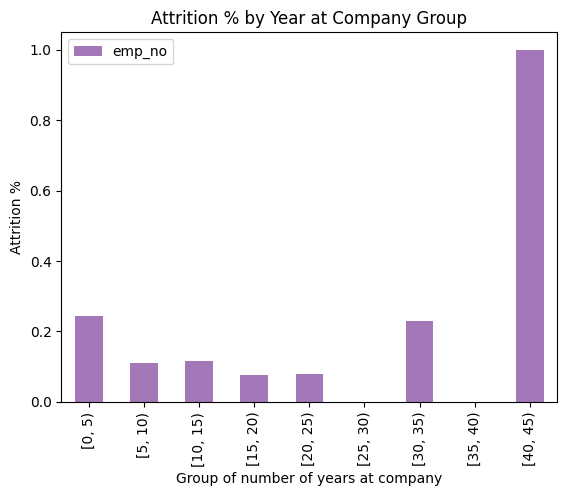

In [ ]:
data['years_at_company_group'] = pd.cut(data['years_at_company'], bins=range(0, data['years_at_company'].max()+6 , 5), right = False)
(data[data['attrition'] == 1].groupby('years_at_company_group').agg({'emp_no': 'count'})/ data.groupby('years_at_company_group').agg({'emp_no': 'count'})).plot.bar(color='#A478B8')
plt.ylabel('Attrition %')
plt.xlabel('Group of number of years at company')
plt.title('Attrition % by Year at Company Group')
plt.show()

**Nhận xét**:
- Những người mới làm ở công ty có xu hướng dễ nghỉ việc hơn.
- Nhóm nguời làm việc lâu năm (> 30 năm) cũng có xu hướng nghỉ việc, tuy nhiên nhóm này chiếm số lượng rất ít người.

#### 2.2.3.3 Years in current role, Years with current manager, Years since last promotion

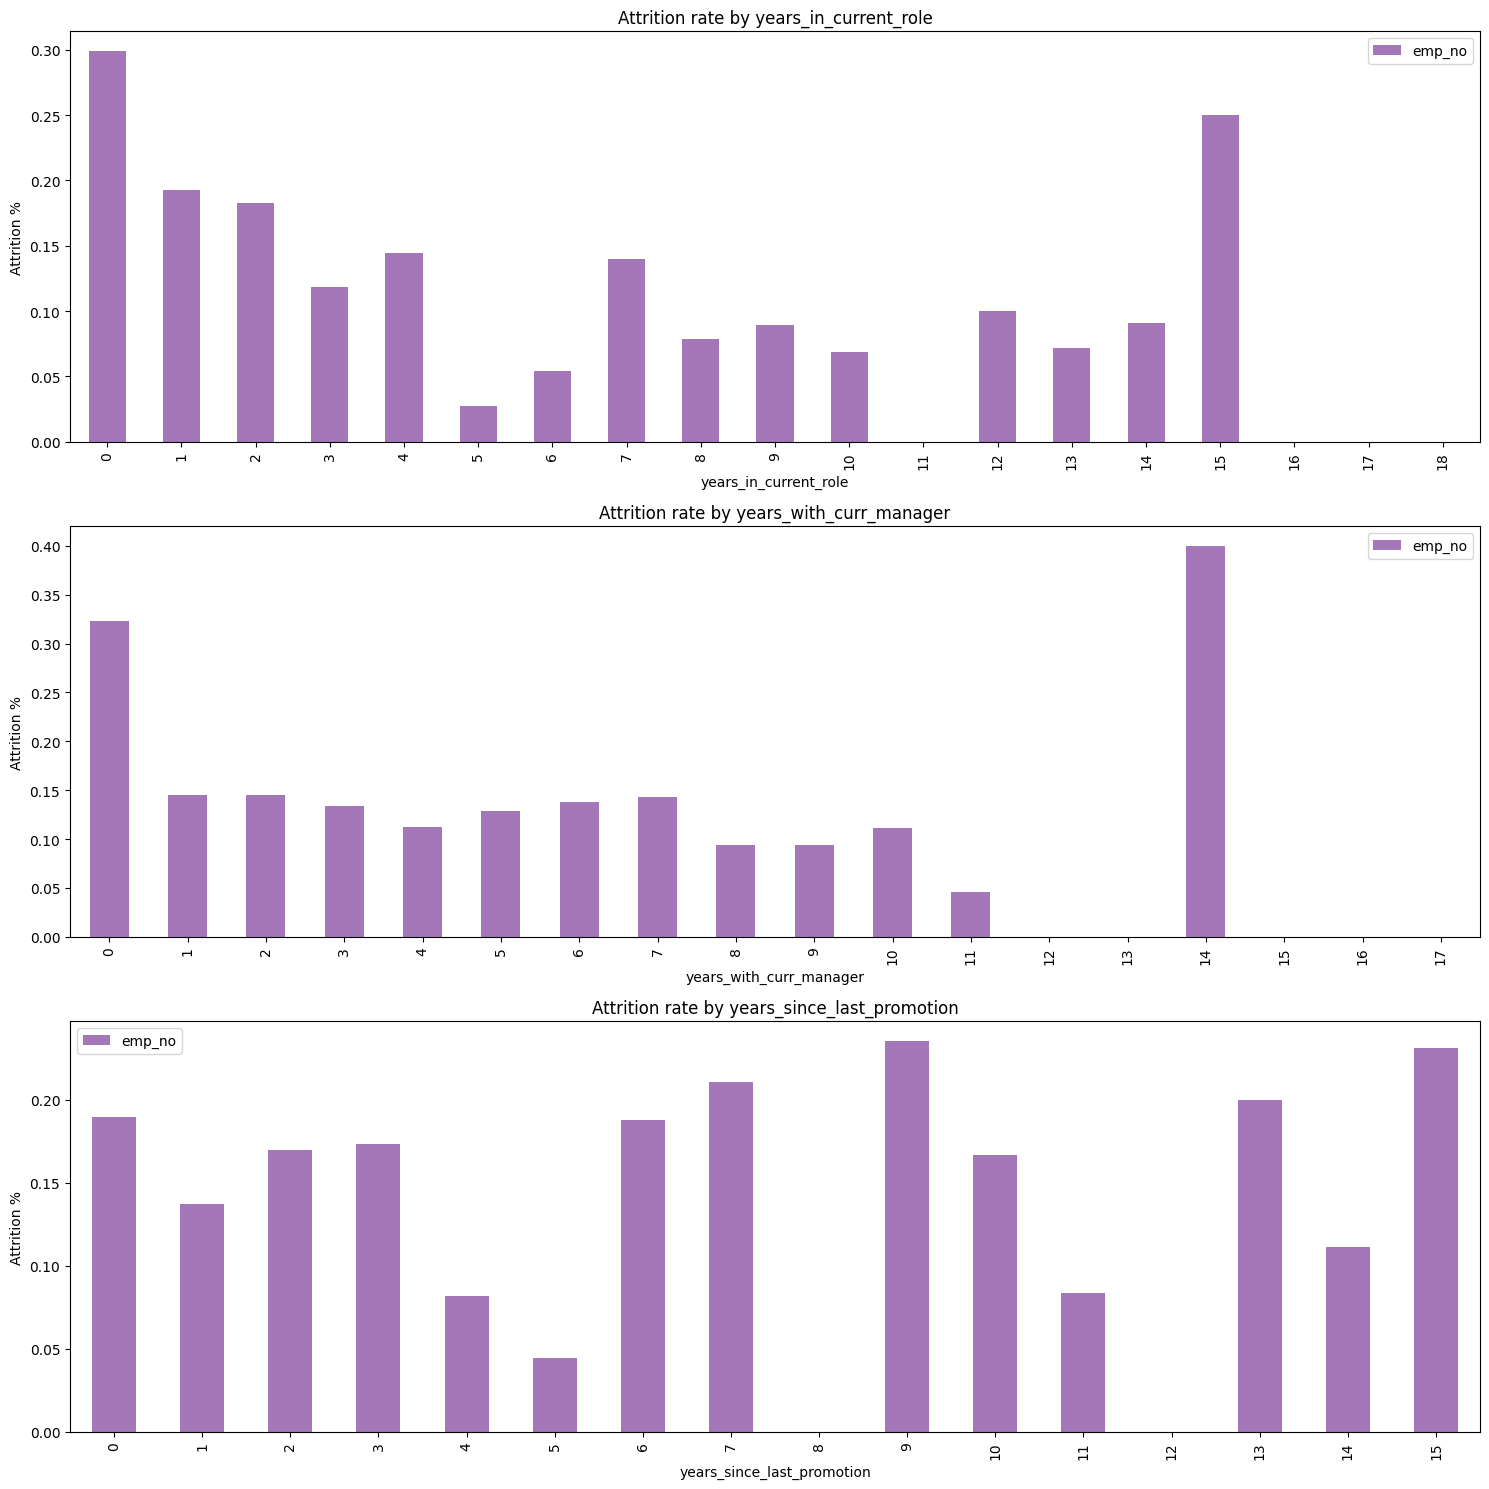

In [ ]:
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i, col in enumerate(['years_in_current_role', 'years_with_curr_manager', 'years_since_last_promotion']):
    (data[data['attrition'] == 1].groupby(col).agg({'emp_no': 'count'})/ data.groupby(col).agg({'emp_no': 'count'})).plot.bar(ax = ax[i], color='#A478B8')
    ax[i].set_ylabel('Attrition %')
    ax[i].set_xlabel(col)
    ax[i].set_title(f'Attrition rate by {col}')
fig.tight_layout()
plt.show()


### 2.2.4 Rating

#### 2.2.4.1 Job involvement, Job satisfaction, Work Life Balance,  Environment Satisfaction, Relationship Satisfaction

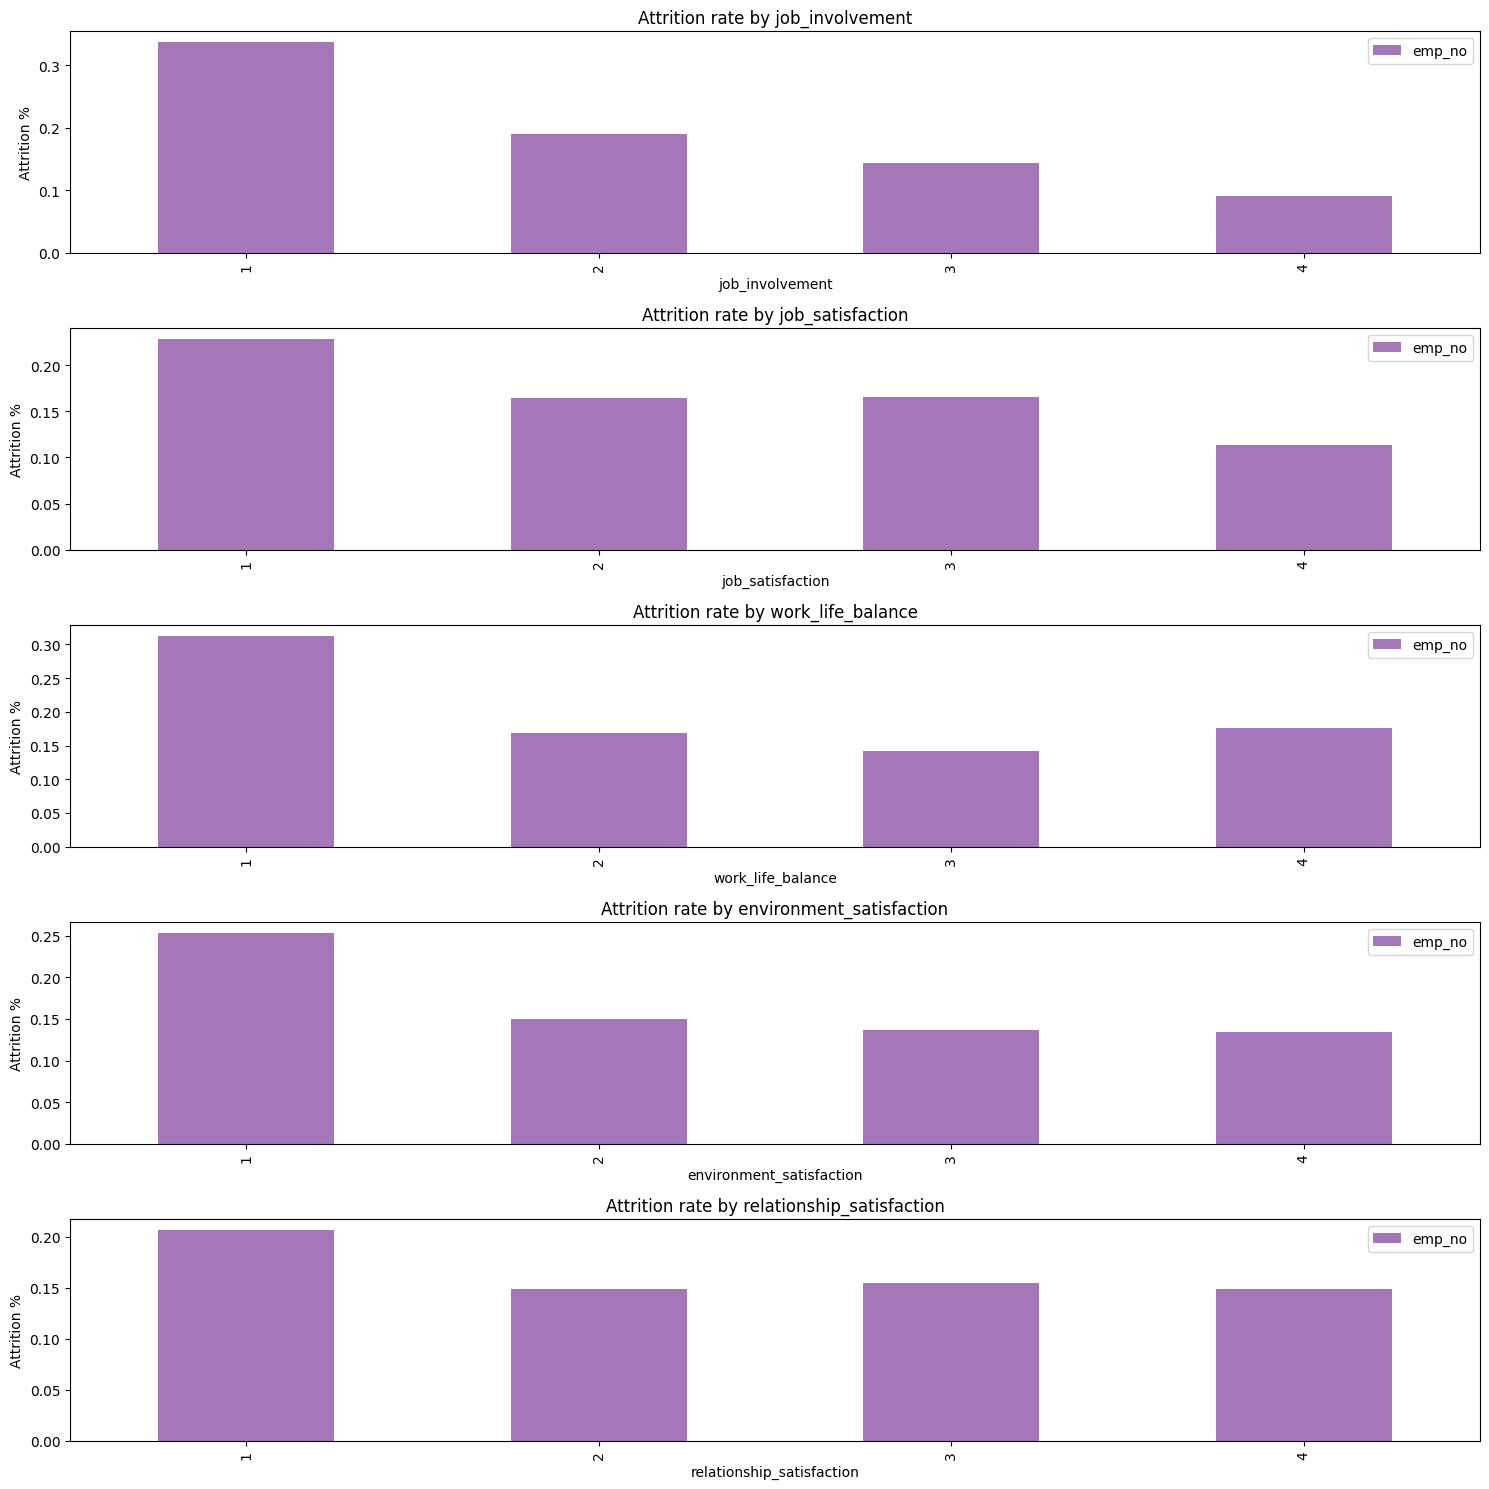

In [ ]:
fig,ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,15))
for i, col in enumerate(['job_involvement', 'job_satisfaction', 'work_life_balance',  'environment_satisfaction', 'relationship_satisfaction']):
    (data[data['attrition'] == 1].groupby(col).agg({'emp_no': 'count'})/ data.groupby(col).agg({'emp_no': 'count'})).plot.bar(ax = ax[i], color='#A478B8')
    ax[i].set_ylabel('Attrition %')
    ax[i].set_xlabel(col)
    ax[i].set_title(f'Attrition rate by {col}')
fig.tight_layout()
plt.show()


**Nhận xét:**
- Đối với mỗi biến trên, nhóm có tỉ lệ rời đi cao nhất là nhóm ít tích cực tham gia công việc, nhóm có sự hài lòng thấp với công việc/ môi trường làm việc/ các mối quan hệ đồng nghiệp, nhóm có mức độ cân bằng thấp giữa công việc và đời sống cá nhân.
- Nhìn chung, xu hướng của các biến này sẽ là: khi nhân viên tham gia tích cực hơn thì tỷ lệ rời đi giảm, khi nhân viên cảm thấy hài lòng hơn thì sẽ có xu hướng ở lại nhiều hơn, và khi nhân viên có thể cân bằng tốt hơn hoạt động trên công ty và cá nhân, họ sẽ có xu hướng ở lại nhiều hơn.

Text(0.5, 1.0, 'Number of attrited employees by work life balance rating')

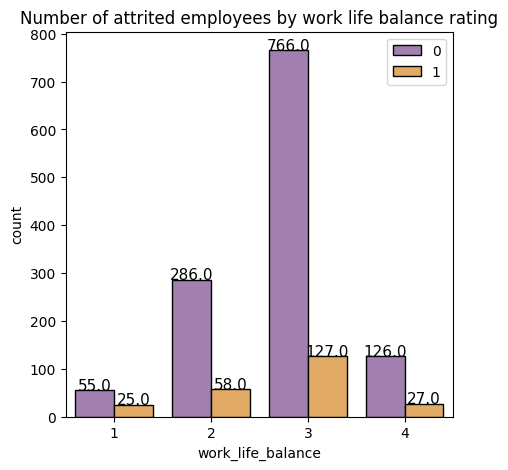

In [ ]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = data, x= 'work_life_balance', hue = 'attrition', palette =  ['#A478B8', '#F5AE52'] ,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['0', '1'], loc = 'upper right')
plt.title(f'Number of attrited employees by work life balance rating')

**Nhận xét:**
Dù nhóm nhân viên gặp phải khó khăn trong việc cân bằng giữa công việc và cuộc sống chiếm số lượng nhỏ nhưng lại có tỷ lệ rời đi cực kì cao (~31%).

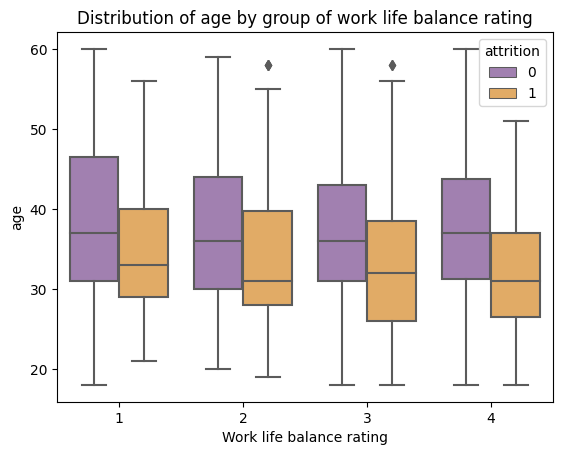

In [ ]:
sns.boxplot(data = data, x = 'work_life_balance', y = 'age', hue = 'attrition', palette = color)
plt.title('Distribution of age by group of work life balance rating')
plt.xlabel('Work life balance rating')
plt.show()

In [ ]:
from typing_extensions import dataclass_transform

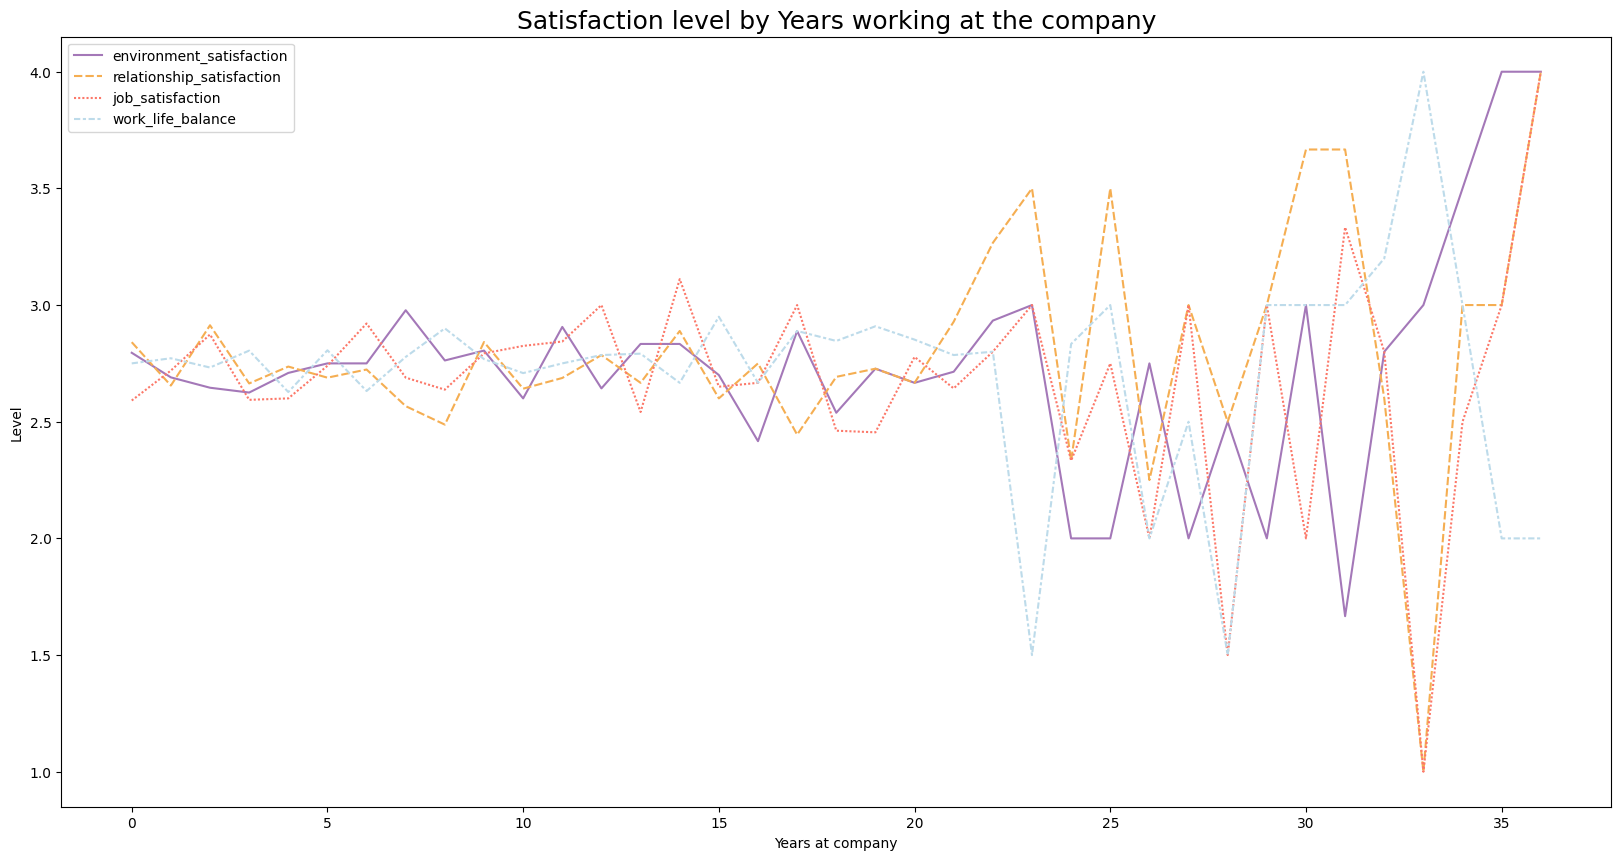

In [ ]:
df_satis = data[['environment_satisfaction','relationship_satisfaction', 'job_satisfaction','work_life_balance', 'years_at_company']]
df_satis_year = df_satis.groupby('years_at_company')[['environment_satisfaction','relationship_satisfaction', 'job_satisfaction','work_life_balance']].mean().reset_index()
plt.subplots(figsize=(20, 10))
sns.lineplot(data = df_satis_year[['environment_satisfaction','relationship_satisfaction', 'job_satisfaction','work_life_balance']], palette = color)
plt.legend( loc='upper left')
plt.title('Satisfaction level by Years working at the company', fontsize = 18)

plt.xlabel('Years at company')
plt.ylabel('Level')
plt.show()

#### 2.2.4.2 Perfomance Rating

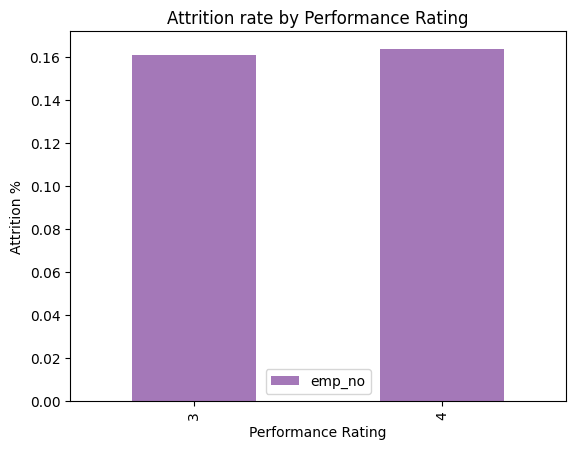

In [ ]:
(data[data['attrition'] == 1].groupby('performance_rating').agg({'emp_no': 'count'})/ data.groupby('performance_rating').agg({'emp_no': 'count'})).plot.bar(color='#A478B8')
plt.ylabel('Attrition %')
plt.xlabel('Performance Rating')
plt.title('Attrition rate by Performance Rating')
plt.show()

**Nhận xét:** Dù nhân viên có hiệu suất làm việc như thế nào tỷ lệ rời đi của nhân viên ở cả hai nhóm xuất sắc và nổi bật (trên cả xuất sắc) đều như nhau (xấp xỉ 16%). Do đó biến 'performance_rating' không ảnh hưởng đến sự rời đi của nhân viên.

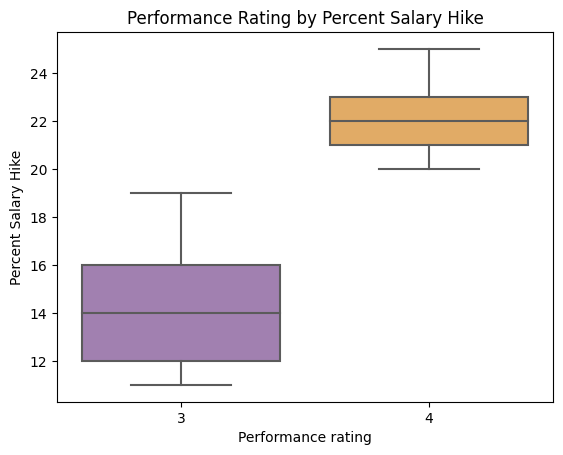

In [ ]:
sns.boxplot(data = data, x = 'performance_rating', y = 'percent_salary_hike', palette = color)
plt.title('Performance Rating by Percent Salary Hike')
plt.ylabel('Percent Salary Hike')
plt.xlabel('Performance rating')
plt.show()

**Nhận xét:** Nhóm nhân viên có hiệu suất làm việc cao thì phần trăm tăng lương sẽ cao hơn.

### 2.2.5 Job related features

#### 2.2.5.1 Department

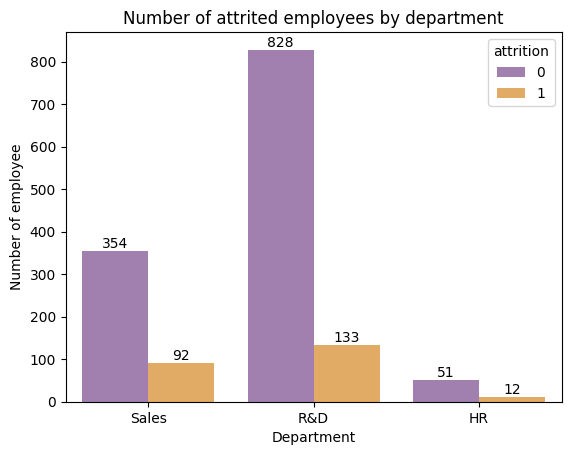

In [ ]:
fig_churn = sns.countplot(x = data['department'], hue = data['attrition'], palette = color)
fig_churn.bar_label(fig_churn.containers[0])
fig_churn.bar_label(fig_churn.containers[1])
plt.title('Number of attrited employees by department')
plt.xlabel('Department')
plt.ylabel('Number of employee')
plt.show()

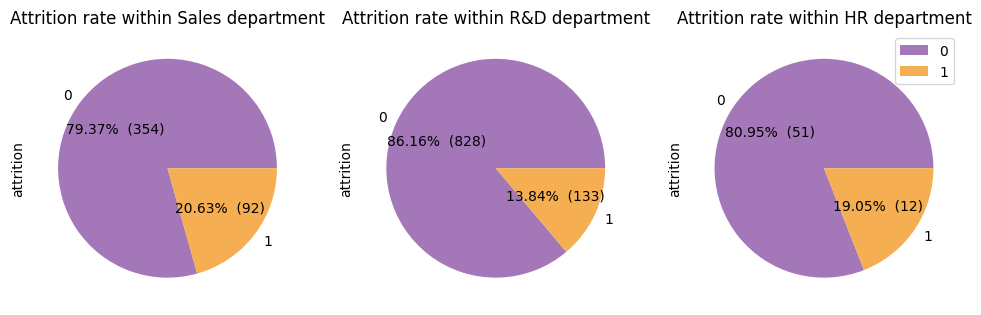

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols=3, figsize = (12,5))
for a,i in enumerate(data.department.unique()):
    data[data['department']== i ]['attrition'].value_counts().plot.pie(ax= ax[a], autopct = make_autopct(data[data['department']== i ]['attrition'].value_counts()),colors=['#A478B8', '#F5AE52'])
    ax[a].set_title(f'Attrition rate within {i} department')
plt.legend()
plt.show()

**Nhận xét:** Phòng ban Sales và HR có tỉ lệ rời bỏ công ty nhiều hơn phòng ban R&D.

Text(0.5, 0, 'Number of employee')

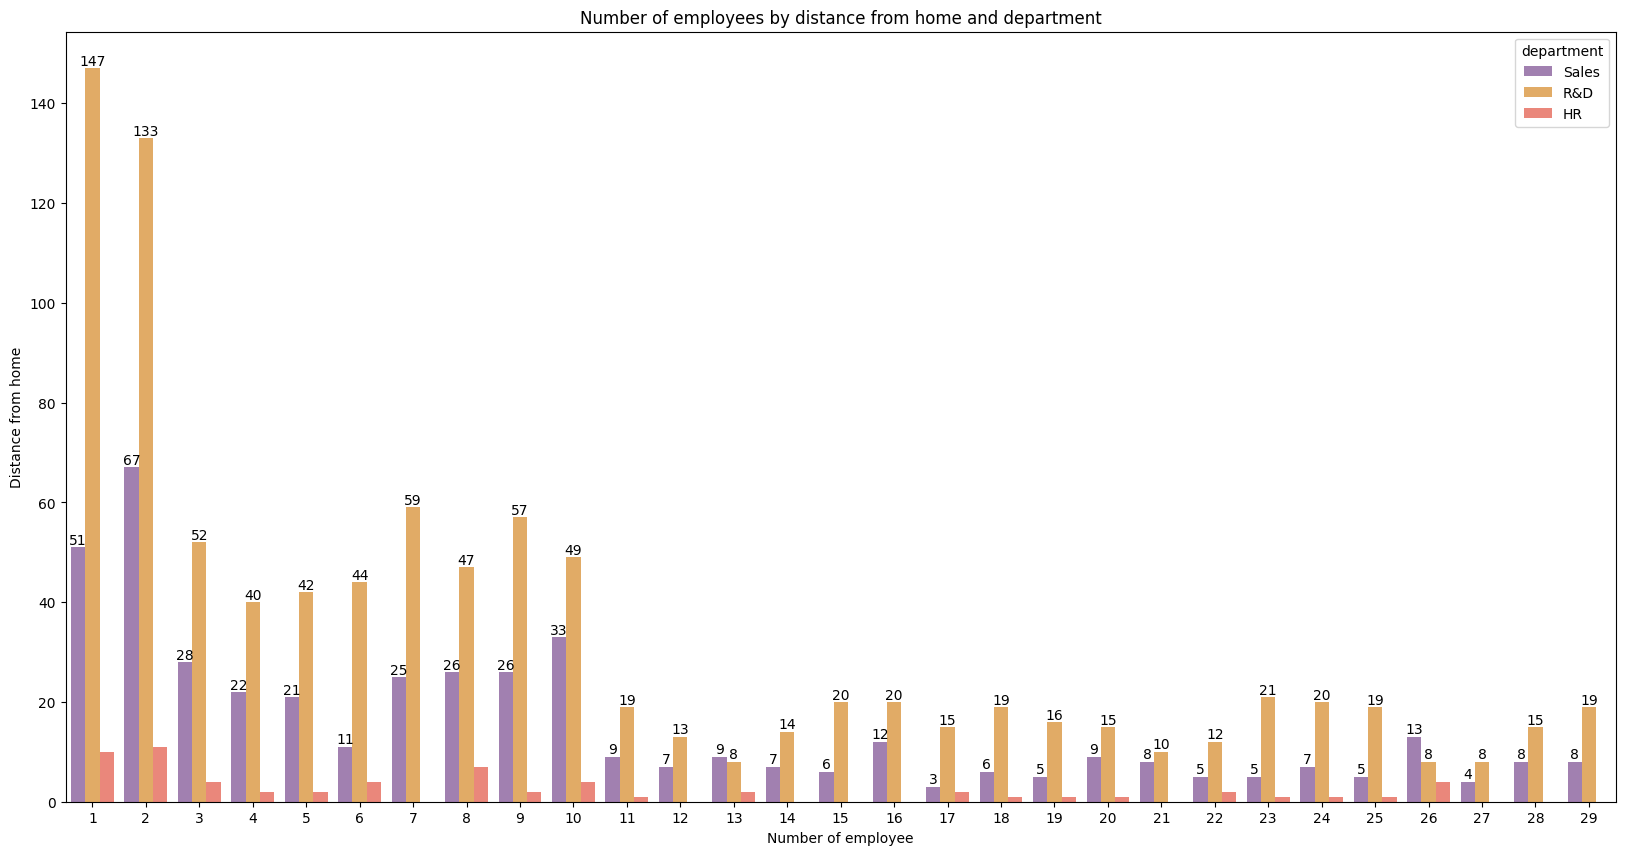

In [ ]:
plt.figure(figsize=(20,10))
fig_churn = sns.countplot(x='distance_from_home', hue='department', data = data, palette=color)
fig_churn.bar_label(fig_churn.containers[0])
fig_churn.bar_label(fig_churn.containers[1])
plt.title('Number of employees by distance from home and department')
plt.ylabel('Distance from home')
plt.xlabel('Number of employee')

In [ ]:
cond = (data['distance_from_home'] > 8) & (data['department'] == 'HR')
data.loc[cond, 'emp_no'].count()

23

In [ ]:
cond = (data['distance_from_home'] > 8) & (data['department'] == 'HR') & (data['attrition'] == 1)
data.loc[cond, 'emp_no'].count()

8

**Nhận xét:**
Trong số 12 nhân viên rời bỏ công ty của phòng ban HR, có đến 8 nhân viên (2/3 lượng nhân viên) ở xa công ty.
\
=> Có thể cân nhắc hỗ trợ đưa đón cho nhân viên phòng HR trong việc di chuyển khi đi làm để giảm tỉ lệ rời bỏ.

#### 2.2.5.2 Education Field

Text(83.34722222222221, 0.5, 'Number of employees')

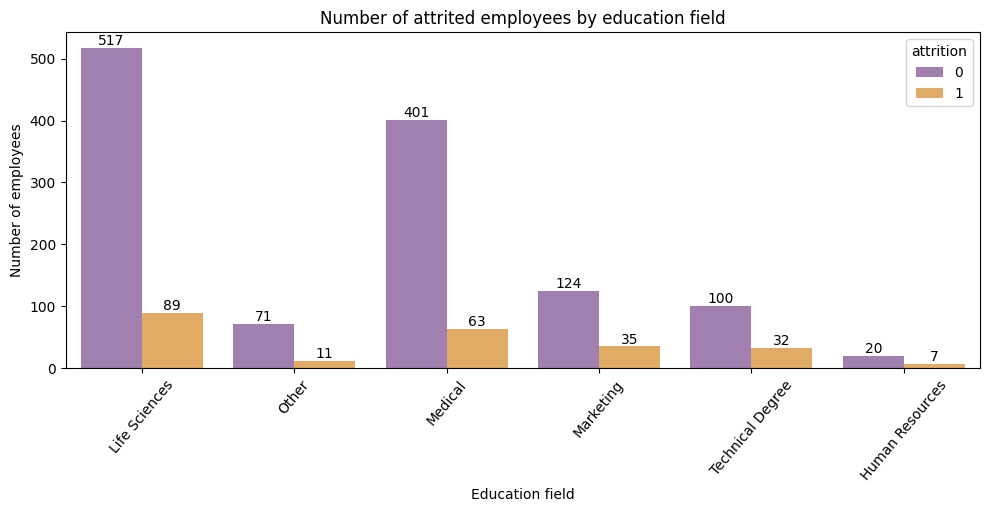

In [ ]:
countplot(data, 'education_field', 'attrition')
plt.title('Number of attrited employees by education field')
plt.xlabel('Education field')
plt.ylabel('Number of employees')

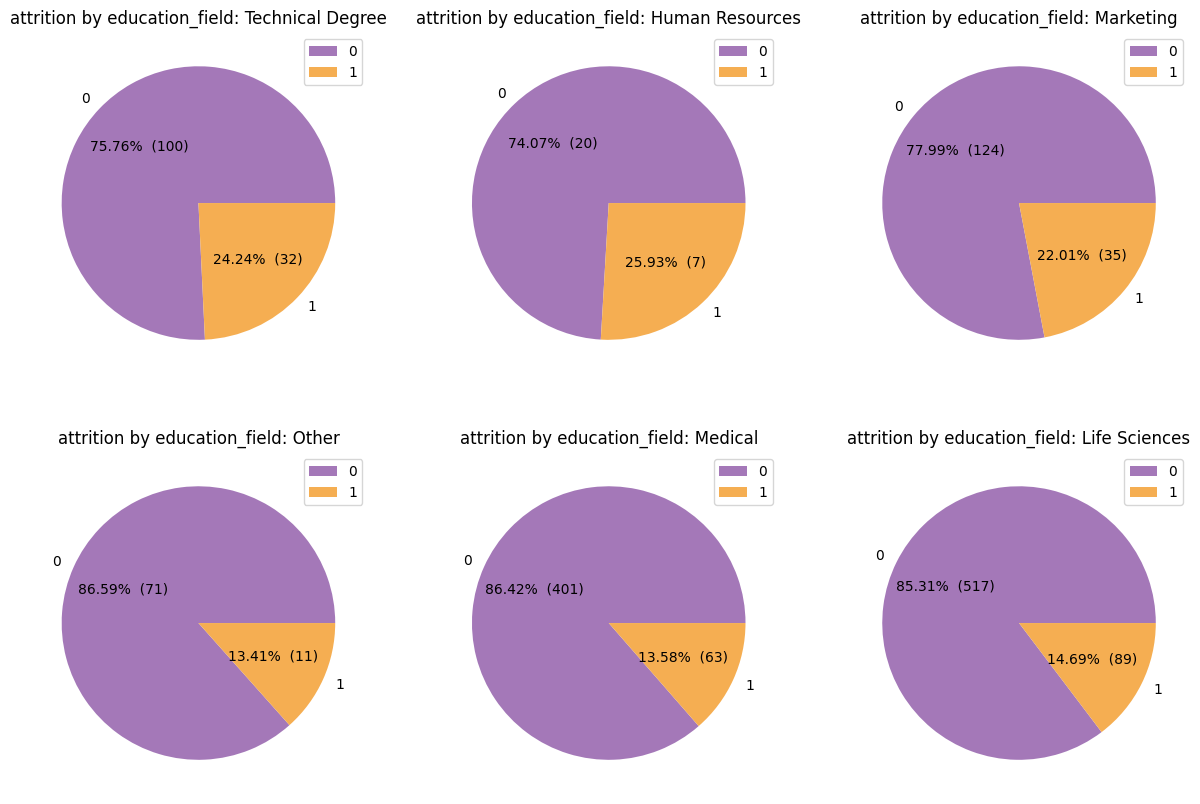

In [ ]:
auto_pie_chart('education_field', 2, 'attrition')

**Nhận xét:** Ba nhóm Technical, Human Resource, Marketing có tỉ lệ rời bỏ công ty nhiều hơn các nhóm khác.

In [ ]:
data['right'] = data.apply(right_career, axis =1)

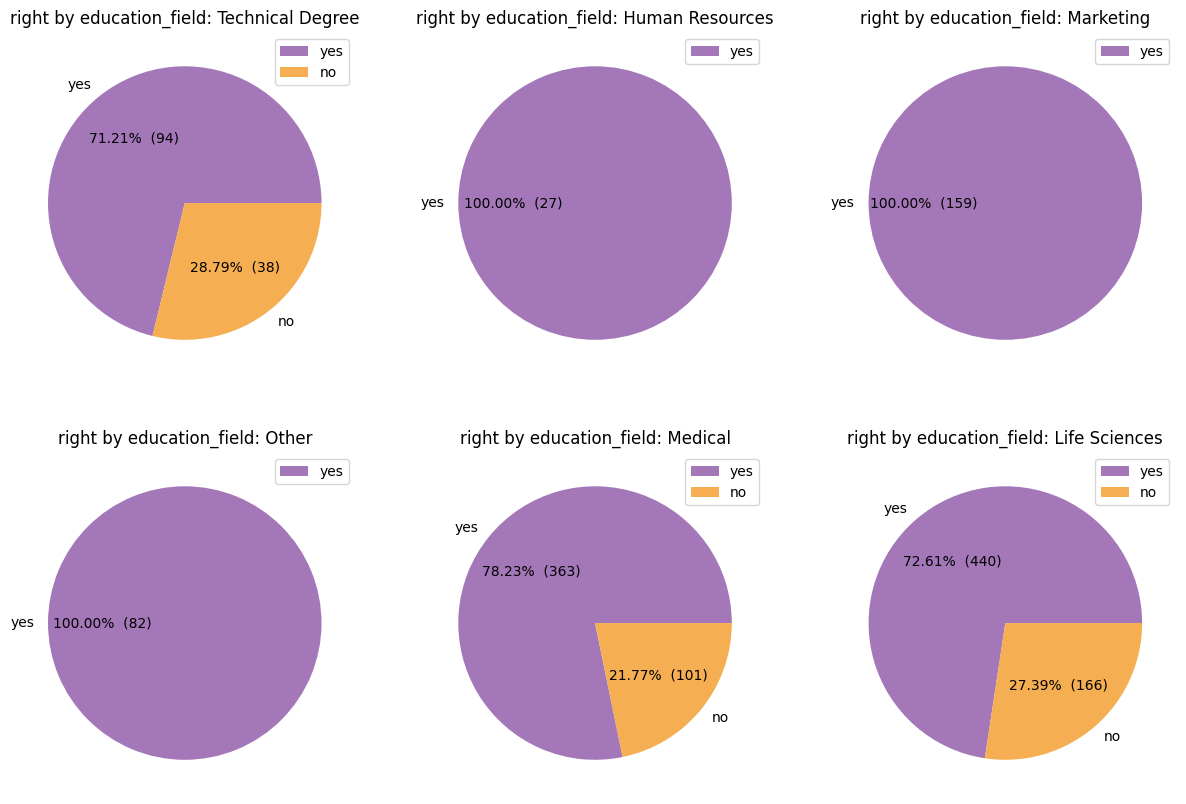

In [ ]:
auto_pie_chart('education_field', 2, 'right')

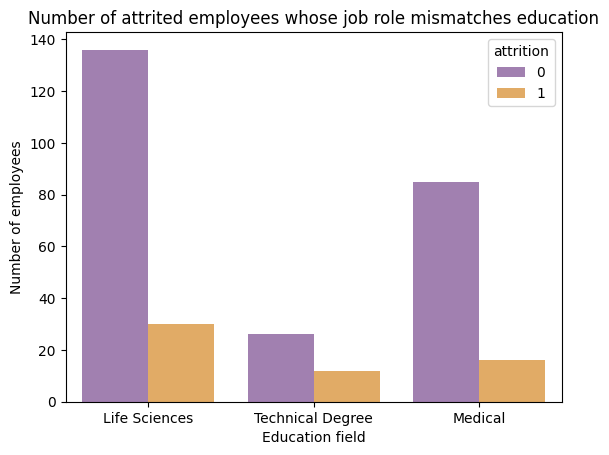

In [ ]:
sns.countplot(x = data[(data['right']== 'no')]['education_field'], hue = data['attrition'], palette=color)
plt.xlabel('Education field')
plt.ylabel('Number of employees')
plt.title('Number of attrited employees whose job role mismatches education')
plt.show()

In [ ]:
data[(data['right']== 'no')].groupby(['education_field', 'department'])['attrition'].count()

education_field   department
Life Sciences     HR             16
                  Sales         150
Medical           HR             13
                  Sales          88
Technical Degree  HR              4
                  Sales          34
Name: attrition, dtype: int64

**Nhận xét:** Những người có bằng Technical làm trái ngành chủ yếu làm trong trong phòng Sales.


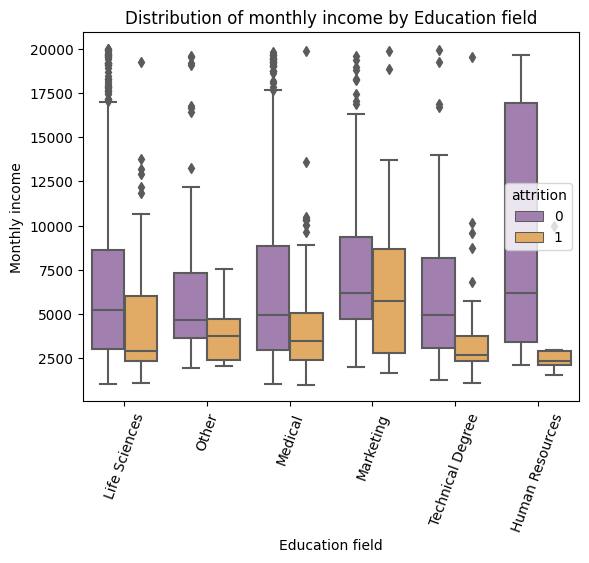

In [ ]:
sns.boxplot(data = data, x = 'education_field', y = 'monthly_income', hue='attrition', palette = color)
plt.xlabel('Education field')
plt.ylabel('Monthly income')
plt.title('Distribution of monthly income by Education field')
plt.tick_params(axis = 'x', rotation = 70)
plt.show()

**Nhận xét:** Nhóm nhân viên có chuyên ngành Technical Degree và Human Resources churn có mức thu nhập thấp hơn đáng kể so với những nhân viên cùng chuyên ngành nhưng ở lại công ty.

#### 2.2.5.3 Job Role

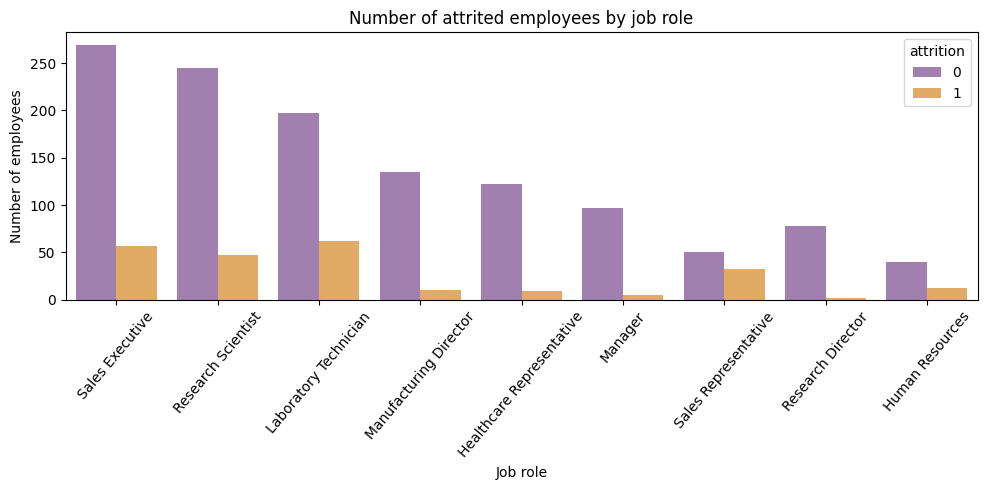

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(x= data['job_role'], hue = data['attrition'], palette = color)
plt.tick_params(axis = 'x', rotation = 50)
plt.xlabel('Job role')
plt.ylabel('Number of employees')
plt.title('Number of attrited employees by job role')
plt.tight_layout()

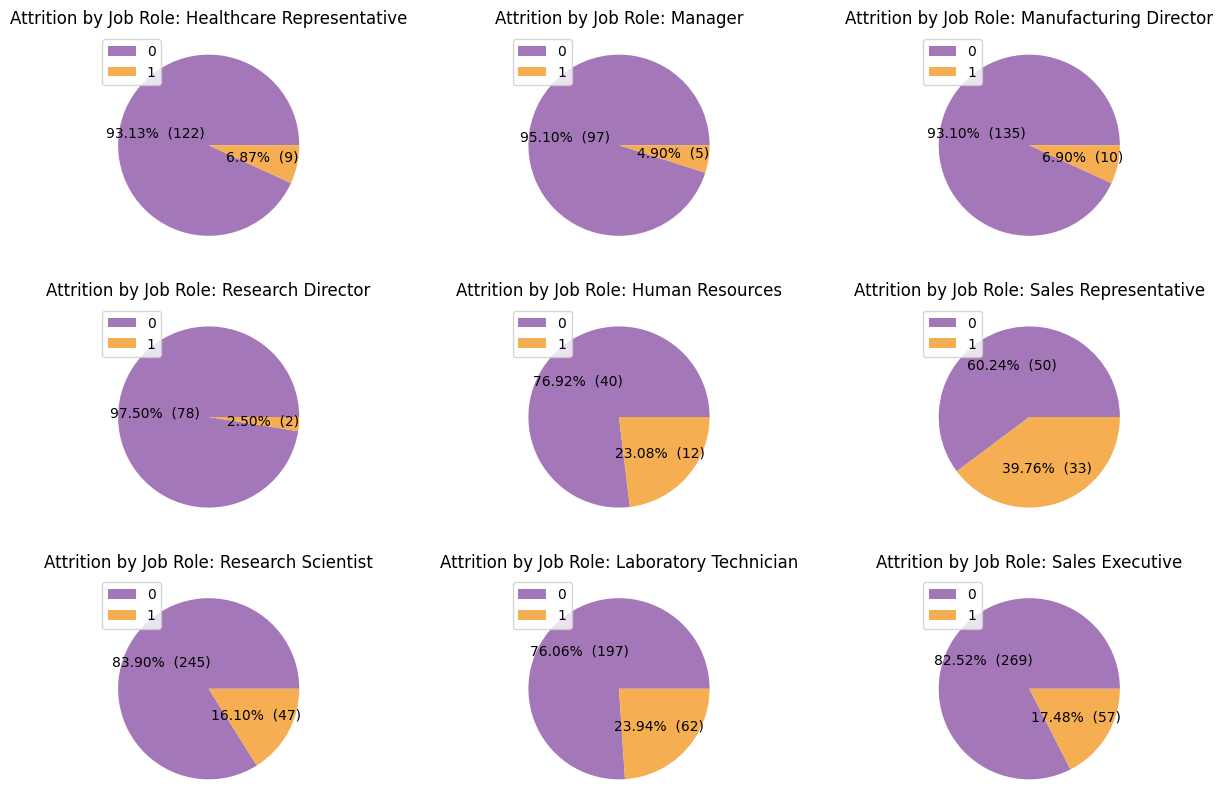

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols=3 , figsize = (15,10))
for i, x in enumerate(data['job_role'].unique()):
    row = i//3
    col = i%3
    data[data['job_role'] == x]['attrition'].value_counts().plot.pie(ax = ax[row-1, col-1], autopct = make_autopct(data[data['job_role'] == x]['attrition'].value_counts()), labels = None, colors=['#A478B8', '#F5AE52'])
    ax[row-1, col-1].set_title(f'Attrition by Job Role: {x}')
    ax[row-1, col-1].set_ylabel('')
    ax[row-1, col-1].legend(loc = 'upper left', labels = ['0', '1'])

Nhóm Sales Representative có tỉ lệ rời bỏ cao hơn cả (40%), tiếp đến là Laboratory Technician, HR, Research Scientist, Sales Executive.

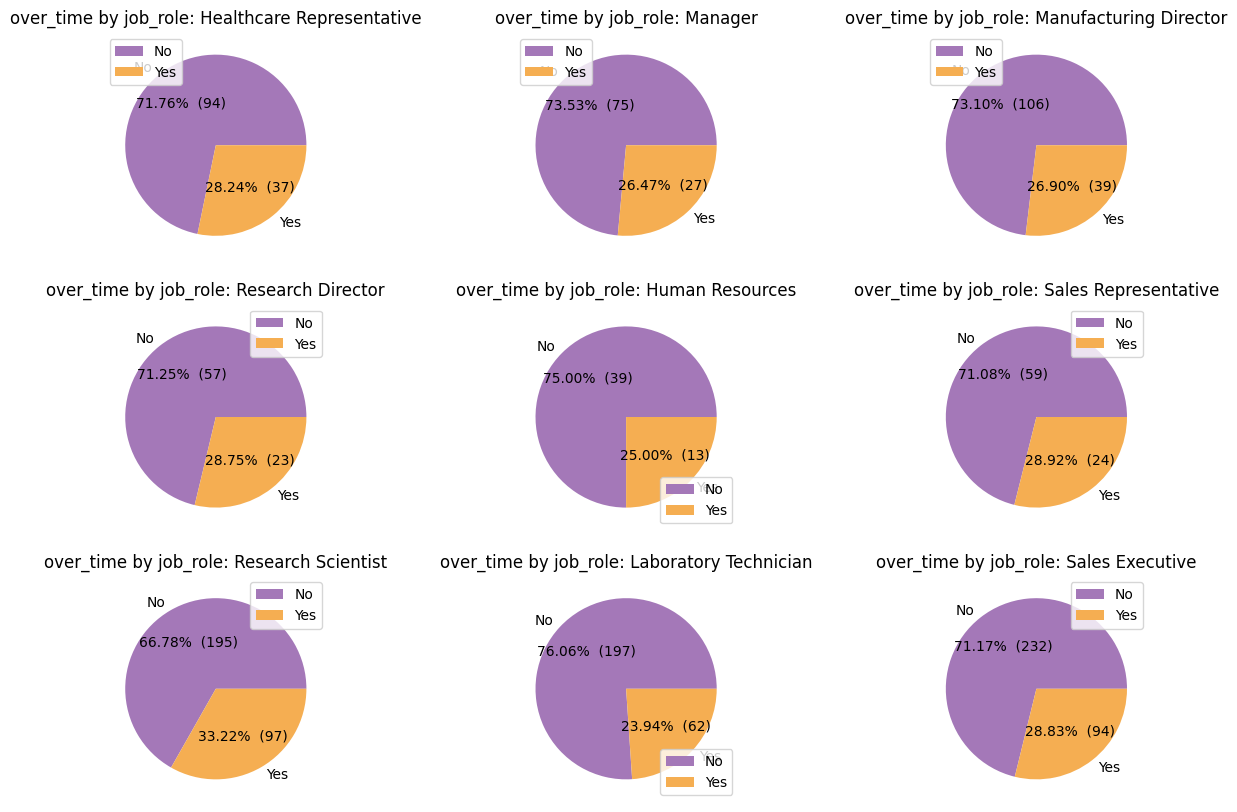

In [ ]:
auto_pie_chart('job_role', 3, 'over_time')

**Nhận xét:** Tỷ lệ nhân viên có tăng ca của các vai trò khá đều nhau.

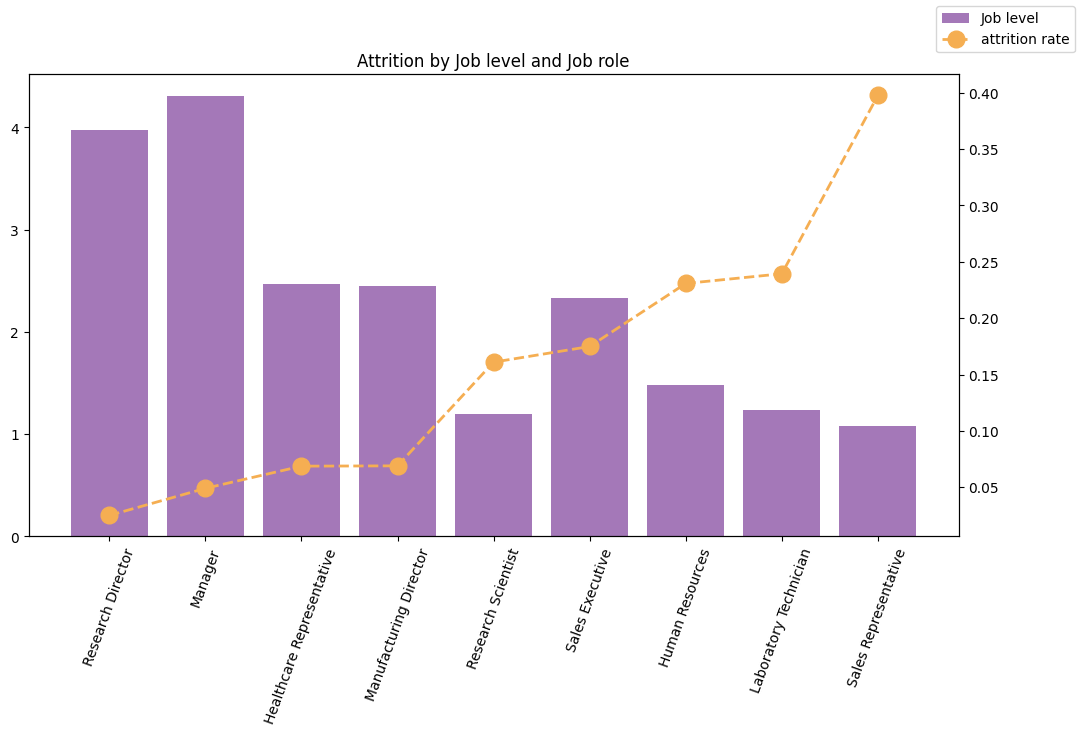

In [ ]:
twin = data.groupby('job_role').agg({'job_level': 'mean', 'attrition': lambda x: (x==1).sum()/len(x)}).reset_index().sort_values(by = 'attrition')
fig, ax1 = plt.subplots(figsize = (12,6))
ax1.bar(x = 'job_role', height= 'job_level', data = twin, label = 'Job level', color='#A478B8')
ax2 = ax1.twinx()
ax2.plot(twin['job_role'], twin['attrition'],color='#F5AE52', marker='o', linestyle='dashed', linewidth=2, markersize=12, label = 'attrition rate')
plt.title('Attrition by Job level and Job role')
ax1.tick_params(axis = 'x', rotation = 70)
fig.legend()
plt.show()

**Nhận xét:** Các vai trò có nhiều mức độ job level và có những mức job level cao thì có xu hướng ít nghỉ việc hơn.

#### 2.2.5.4 Job level

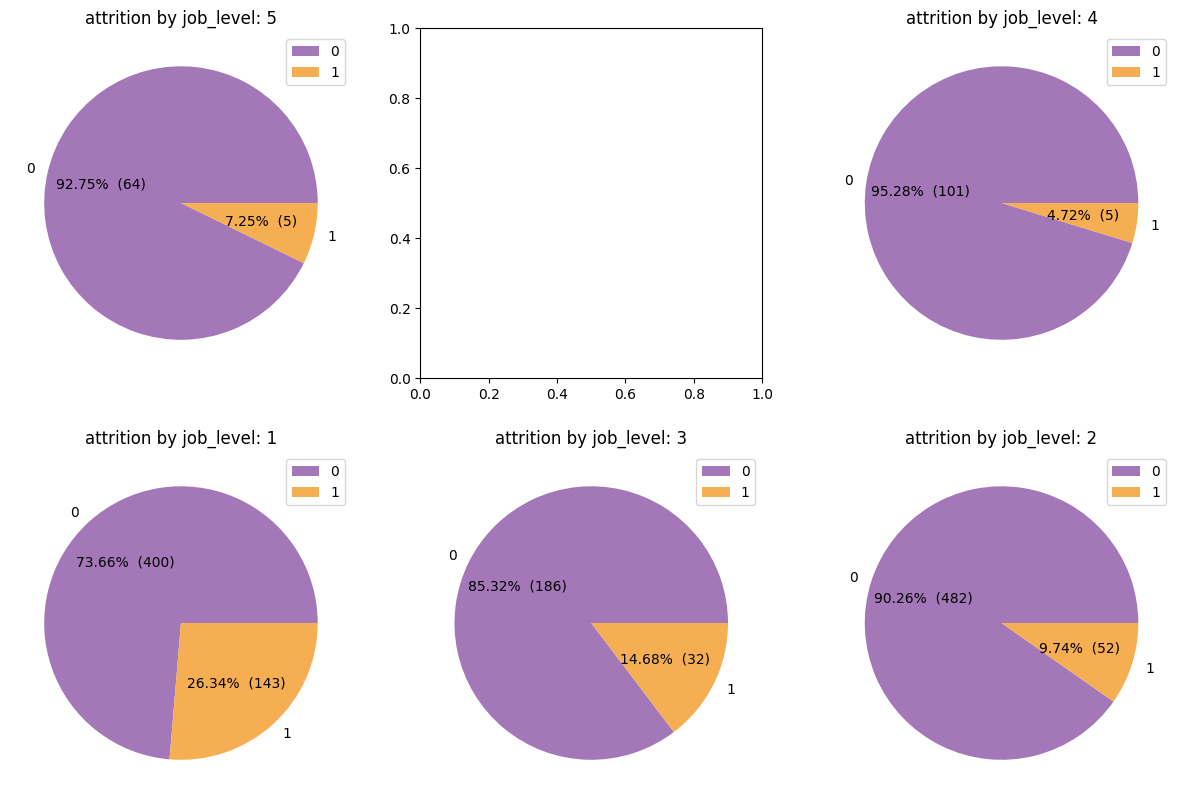

In [ ]:
auto_pie_chart('job_level', 2 , 'attrition')

**Nhận xét:** Nhóm level 1 có tỷ lệ rời đi cao nhất với khoảng 26%.

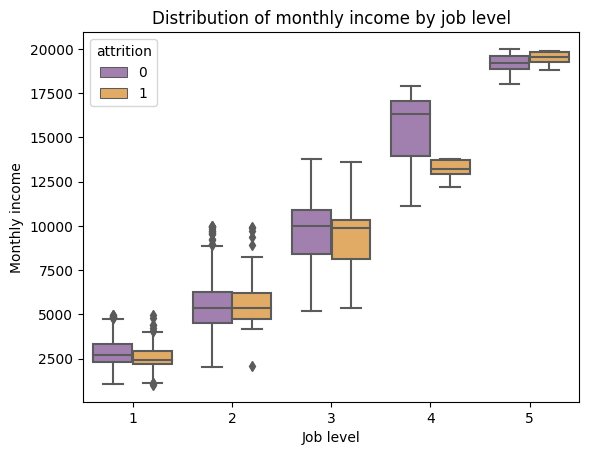

In [ ]:
sns.boxplot(data = data, x = 'job_level', y = 'monthly_income', hue = 'attrition', palette=color)
plt.xlabel('Job level')
plt.ylabel('Monthly income')
plt.title('Distribution of monthly income by job level')
plt.show()

**Nhận xét:** Mức thu nhập tăng dần và gần như được quyết định bởi cấp bậc của người đó trong công ty.

In [ ]:
cond = data['job_level'] == 5
data.loc[cond, 'job_role'].unique()

array(['Manager', 'Research Director'], dtype=object)

**Nhận xét:** Nhóm có job level bằng 5 có lượng thu nhập hàng tháng cao vượt trội so với các nhóm còn lại. Đây là nhóm bao gồm các nhà quản lí và giám đóc nghiên cứu.

#### 2.2.5.5 Business travel

Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: business_travel, dtype: float64

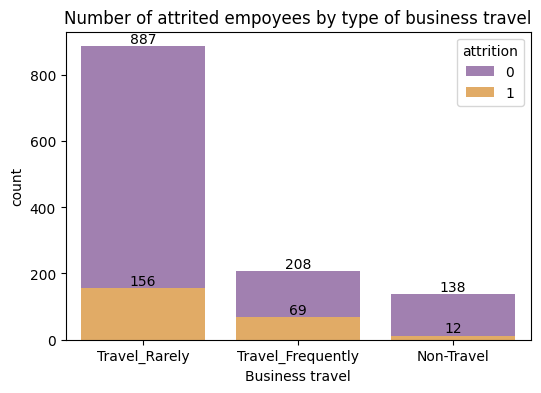

In [ ]:
plt.figure(figsize=(6,4))
fig_churn = sns.countplot(x='business_travel', hue='attrition', dodge=False, data=data, palette = color)
fig_churn.bar_label(fig_churn.containers[0])
fig_churn.bar_label(fig_churn.containers[1])
plt.xlabel('Business travel')
plt.title('Number of attrited empoyees by type of business travel')
data['business_travel'].value_counts(normalize = True)

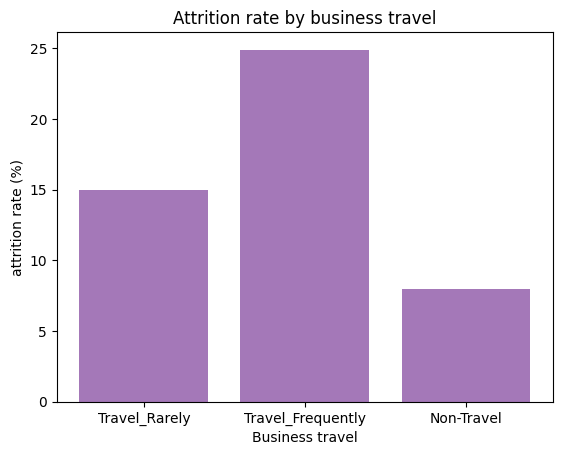

In [ ]:
t = data[data['attrition'] == 1]['business_travel'].value_counts()*100/data['business_travel'].value_counts()
fig_churn = plt.bar(x=t.index , height = t.values, color='#A478B8')
plt.ylabel('attrition rate (%)')
plt.xlabel('Business travel')
plt.title('Attrition rate by business travel')
plt.show()

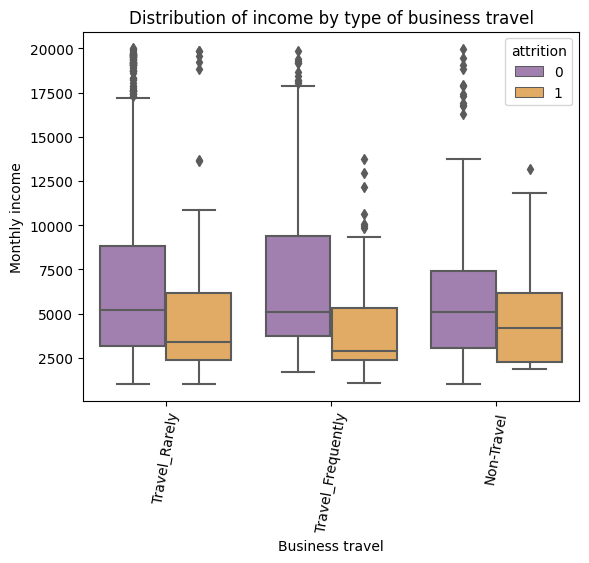

In [ ]:
sns.boxplot(data = data, x = 'business_travel', y = 'monthly_income', hue='attrition', palette = color)
plt.xlabel('Business travel')
plt.ylabel('Monthly income')
plt.title('Distribution of income by type of business travel')
plt.tick_params(axis = 'x', rotation = 80)

**Nhận xét:**
Tỷ lệ rời đi cao nhất ở nhóm đi công tác thường xuyên (25%):
- Thu nhập hàng tháng của nhóm đi công tác thường xuyên và rời đi thấp hơn so với nhóm đi công tác thường xuyên nhưng ở lại.
-> Có thể vì nhận được thu nhập thấp hơn.
- Nhưng thu nhập thấp hơn là do chủ yếu họ có cấp bậc là 1 và rất ít người có cấp bậc cao hơn, trong khi nhóm phải đi công tác thường xuyên và chưa rời đi có cấp bậc thường là 2 và nhiều người có cấp bậc là 4 trở lên

# 3. Xây dựng và đánh giá model

In [ ]:
from sklearn.preprocessing import LabelEncoder

## Feature Engineering and Feature Selection

In [ ]:
df_one_hot_encoded = data.drop(labels = ['num_companies_worked','hourly_rate', 'monthly_rate', 'daily_rate', 'employee_number', 'emp_no', 'attrition_label', 'over18', 'current_employee', 'employee_count', 'standard_hours', 'right',	'salary_segment', 'years_at_company_group', 'num_companies_worked'], axis = 1)

In [ ]:
df_one_hot_encoded['attrition'].replace({'Yes':1, 'No': 0}, inplace=True)

In [ ]:
df_one_hot_encoded['business_travel'] = df_one_hot_encoded['business_travel'].replace({'Travel_Rarely':2, 'Non-Travel':1, 'Travel_Frequently':3})
df_one_hot_encoded['gender'] = df_one_hot_encoded['gender'].replace({'Male': 1, 'Female':0})
df_one_hot_encoded['over_time']= df_one_hot_encoded['over_time'].replace({'No':0,'Yes':1})
df_one_hot_encoded['education'] = df_one_hot_encoded['education'].replace({"Bachelor's Degree" :3,"Master's Degree" :4, 'Associates Degree':2,'High School':1, 'Doctoral Degree':5})

In [ ]:
df_one_hot_encoded

attrition  business_travel department   education_field  gender  \
0             1                2      Sales     Life Sciences       0   
1             0                3        R&D     Life Sciences       1   
2             1                2        R&D             Other       1   
3             0                3        R&D     Life Sciences       0   
4             0                2        R&D           Medical       1   
...         ...              ...        ...               ...     ...   
1465          1                1        R&D  Technical Degree       1   
1466          1                3        R&D     Life Sciences       1   
1467          1                3      Sales             Other       1   
1468          1                2        R&D     Life Sciences       1   
1469          1                2      Sales     Life Sciences       1   

                   job_role marital_status  over_time  \
0           Sales Executive         Single          1   
1        Research Scientist        Married          0   
2     Laboratory Technician         Single          1   
3        Research Scientist        Married          1   
4     Laboratory Technician        Married          0   
...                     ...            ...        ...   
1465     Research Scientist        Married          1   
1466     Research Scientist         Single          1   
1467        Sales Executive         Single          1   
1468     Research Scientist         Single          1   
1469   Sales Representative       Divorced          1   

      training_times_last_year  age  distance_from_home  education  \
0                            0   41                   1          2   
1                            3   49                   8          1   
2                            3   37                   2          2   
3                            3   33                   3          4   
4                            3   27                   2          1   
...                        ...  ...                 ...        ...   
1465                         2   34                  16          4   
1466                         3   29                  24          2   
1467                         2   35                  12          4   
1468                         2   22                   7          1   
1469                         2   23                   7          3   

      environment_satisfaction  job_involvement  job_level  job_satisfaction  \
0                            2                3          2                 4   
1                            3                2          2                 2   
2                            4                2          1                 3   
3                            4                3          1                 3   
4                            1                3          1                 2   
...                        ...              ...        ...               ...   
1465                         4                1          1                 1   
1466                         4                2          1                 4   
1467                         4                3          2                 4   
1468                         4                3          1                 2   
1469                         3                3          1                 4   

      monthly_income  percent_salary_hike  performance_rating  \
0               5993                   11                   3   
1               5130                   23                   4   
2               2090                   15                   3   
3               2909                   11                   3   
4               3468                   12                   3   
...              ...                  ...                 ...   
1465            2307                   23                   4   
1466            2439                   24                   4   
1467            4581                   24                

In [ ]:
df_one_hot_encoded =pd.get_dummies(data = df_one_hot_encoded, drop_first=True)

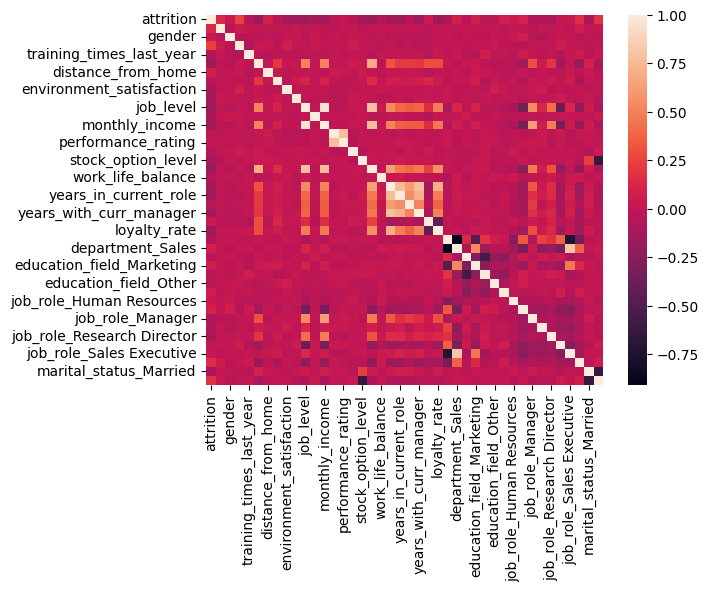

In [ ]:
sns.heatmap(df_one_hot_encoded.corr())
plt.show()

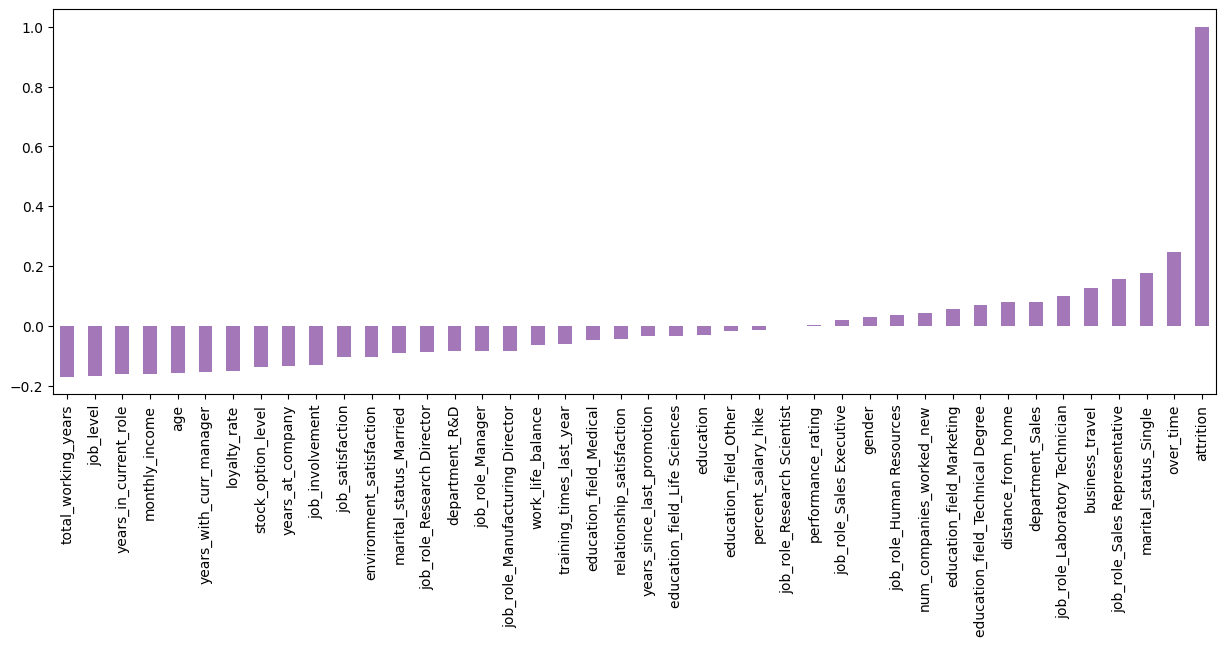

In [ ]:
plt.figure(figsize=(15,5))
df_one_hot_encoded.corr()['attrition'].sort_values().plot.bar(color =  ['#A478B8'])
plt.show()

In [ ]:
### VIF Checking
from statsmodels.stats.outliers_influence import variance_inflation_factor

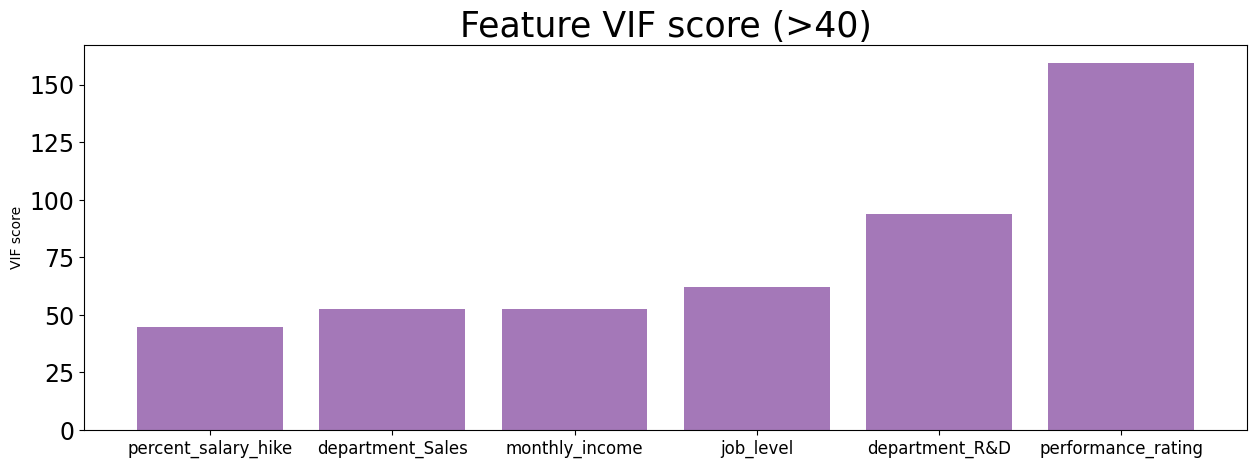

In [ ]:
vif_check = df_one_hot_encoded.drop(['attrition'], axis = 1)

vif_results = pd.DataFrame()
vif_results['Feature'] = vif_check.columns

vif_results['VIF'] = [variance_inflation_factor(vif_check.values, i) for i in range(len(vif_check.columns))]
vif_results = vif_results.sort_values(by= 'VIF').tail(6)
plt.figure(figsize = (15,5))
plt.bar(x = vif_results.Feature, height = vif_results.VIF, color = ['#A478B8'])
plt.title('Feature VIF score (>40)', fontdict={'fontsize' : 25})
plt.ylabel('VIF score')
plt.tick_params(axis = 'x', rotation = 0,labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 17)

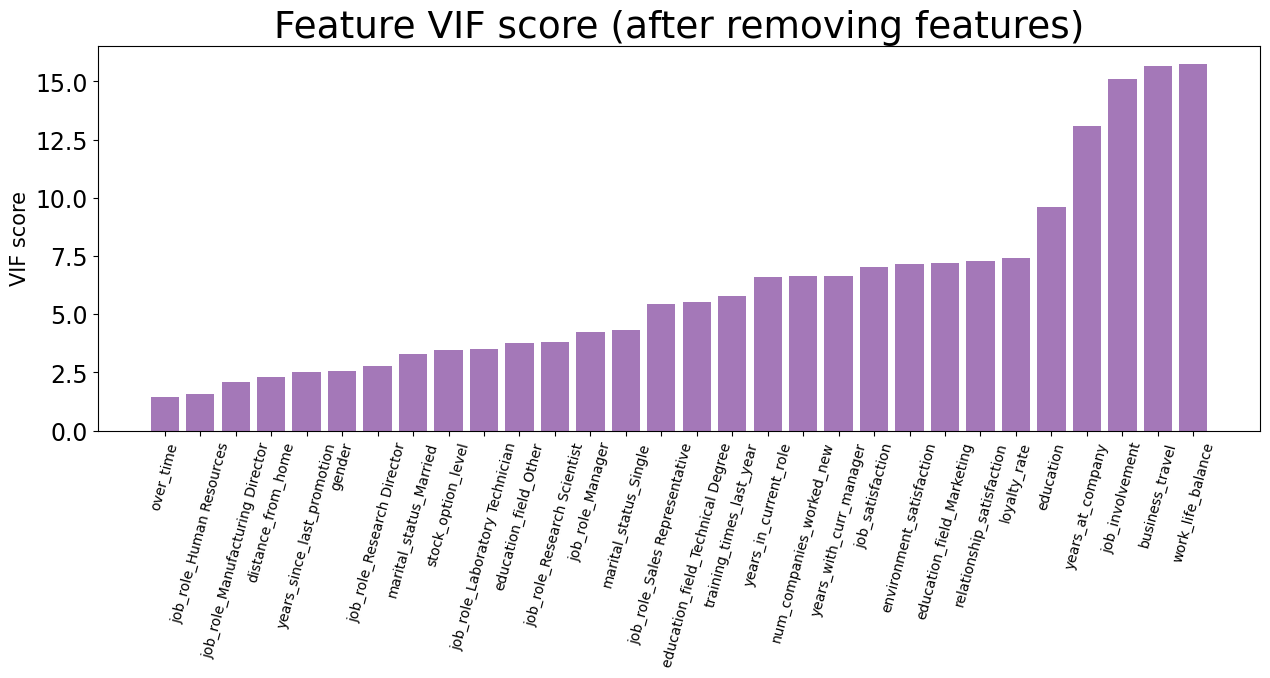

In [ ]:
vif_check = df_one_hot_encoded.drop(['attrition','percent_salary_hike', 'department_R&D', 'job_level', 'performance_rating'], axis = 1)

vif_results = pd.DataFrame()
vif_results['Feature'] = vif_check.columns

vif_results['VIF'] = [variance_inflation_factor(vif_check.values, i) for i in range(len(vif_check.columns))]
vif_results = vif_results.sort_values(by= 'VIF').head(30)
plt.figure(figsize = (15,5))
plt.bar(x = vif_results.Feature, height = vif_results.VIF, color = ['#A478B8'])

plt.title('Feature VIF score (after removing features)', fontdict={'fontsize' : 27})
plt.ylabel('VIF score', fontsize = 15)
plt.tick_params(axis = 'x', rotation = 75,labelsize = 10)
plt.tick_params(axis = 'y', labelsize = 17)

## Tách tập train và test data

In [ ]:
# Split the data into features (X) and target variable (y)
X = df_one_hot_encoded.drop(['attrition', 'percent_salary_hike', 'department_R&D', 'job_level'], axis = 1)  # Replace "target_column" with the name of your target column
y = df_one_hot_encoded["attrition"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69,stratify=y)

## Standard Scaling

In [ ]:
# Create the scaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Apply the scaler to the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Nhóm sẽ sử dụng 4 model chính là Naives Bayes, Logistics Regression, XGB, Random Forest để phân loại nhân viên. Hai Metric quan trọng nhất mà nhóm sử dụng là ROC và Recall, trong đó Recall sẽ được ưu tiên vì nhóm muốn dự đoán đúng nhân viên sẽ rời bỏ công ty nhiều nhất có thể

## Xây dựng model baseline

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         )))
models.append(('Random Forest', RandomForestClassifier(random_state=23)))
models.append(('XGB', XGBClassifier()))
models.append(('Gaussian NB', GaussianNB()))

In [ ]:
acc_results = []
auc_results = []
rc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'Accuracy Mean', 'Accuracy STD', 'Recall Mean', 'Recall STD','ROC Mean', 'ROC STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7, shuffle= True)  # 10-fold cross-validation
    roc_auc_score
    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

    cv_rc_results = model_selection.cross_val_score(  # recall scoring
        model, X_train_scaled, y_train, cv=kfold, scoring='recall')
    cv_auc_results = model_selection.cross_val_score(  # recall scoring
        model, X_train_scaled, y_train, cv=kfold, scoring='roc_auc')


    rc_results.append(cv_rc_results)
    auc_results.append(cv_auc_results)
    acc_results.append(cv_acc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2),
                         round(cv_rc_results.mean()*100, 2),
                         round(cv_rc_results.std()*100, 2),
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['Recall Mean'], ascending=False)

Algorithm  Accuracy Mean  Accuracy STD  Recall Mean  Recall STD  \
3          Gaussian NB          66.95          4.61        75.04        7.53   
0  Logistic Regression          88.04          3.05        45.85       10.17   
2                  XGB          86.00          4.52        34.71       11.28   
1        Random Forest          85.33          5.27        14.71        9.88   

   ROC Mean  ROC STD  
3     75.90     7.19  
0     85.94     3.66  
2     83.86     4.28  
1     81.33     7.08

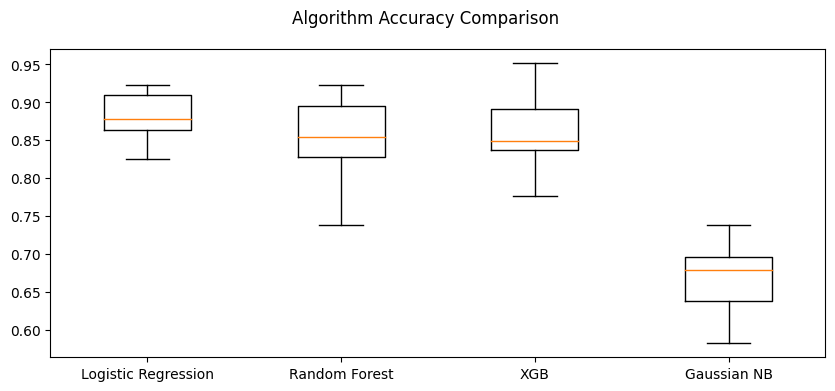

In [ ]:
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

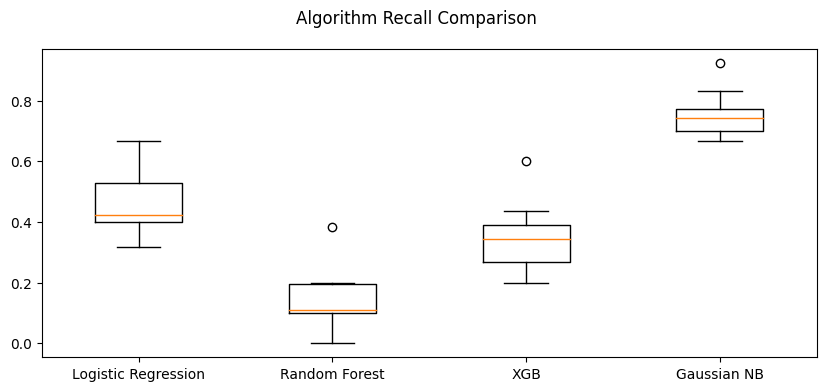

In [ ]:
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Algorithm Recall Comparison')
ax = fig.add_subplot(111)
plt.boxplot(rc_results, )
ax.set_xticklabels(names)
plt.show()

#### Function to calculate weights for features in classifier

In [ ]:
def plot_cumulative_gain(y_true, y_pred_probs,  base_model):
    # Ensure the arrays have the same length
    assert len(y_true) == len(y_pred_probs), "Error: The input arrays must have the same length."
    base_model.fit(X_train_scaled, y_train)
    y_pred_probs_based = base_model.predict_proba(X_test_scaled)[:,1]


    sorted_indices_base = np.argsort(y_pred_probs_based)[::-1]
    # Sort the samples based on the predicted scores
    sorted_indices = np.argsort(y_pred_probs)[::-1]
    sorted_y_true_base = y_true[sorted_indices_base]
    sorted_y_true = y_true[sorted_indices]

    # Calculate the cumulative sum of positive samples
    cumulative_positives = np.cumsum(sorted_y_true)
    cumulative_positives_base = np.cumsum(sorted_y_true_base)
    # Calculate the cumulative percentage
    cumulative_percentage = cumulative_positives / np.sum(y_true)

    cumulative_percentage_base = cumulative_positives_base / np.sum(y_true)
    baseline_percentage = np.linspace(0, 1, len(y_true))


    # Plot the cumulative curve
    plt.plot(baseline_percentage, cumulative_percentage,  linestyle='-', color='b')
    plt.plot(baseline_percentage, cumulative_percentage_base, linestyle='-', color='g')
    # Set plot labels and title
    plt.xlabel('Percentage of samples')
    plt.ylabel('Cumulative Percentage')
    plt.title('Cumulative Curve')

    # Set plot limits
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    # Display the plot
    plt.show()


In [ ]:
#function evaluate weights for classifier
def feature_weight(X_df, model, model_name):
    weights = pd.Series( model.coef_[0], index = X_df.columns.values ).sort_values(ascending= False)
    fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize = (15,6))

    top = weights[:10]
    bot = weights[-10:]
    ax[0].bar(height= top.values,  x = top.index, color = palette_color)
    ax[1].bar(height= bot.values,  x = bot.index, color = palette_color)
    ax[0].tick_params(labelrotation=90)
    ax[1].tick_params(labelrotation=90)

#### Funtion to display confusion matrix

In [ ]:
def confusion_matrix_plot(algo, model, x,y):

    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    fig, ax= plt.subplots(nrows =1, ncols= 2, figsize = (15,5))

    ConfusionMatrixDisplay.from_predictions(y, model.predict(x), ax= ax[0])
    ax[0].set_title(algo)
    ConfusionMatrixDisplay.from_predictions(y, model.predict(x), ax= ax[1], normalize= 'true')
    ax[1].set_title(f'{algo} (normalized)')
    fig.tight_layout()



#### Funtion to display metrics scoring table

In [ ]:
def metrics_scoring_table(y_model,y_true, model_name):
    prec = precision_score(y_true, y_model)
    accu = accuracy_score( y_true, y_model)
    recall = recall_score(y_true, y_model)
    f1 = f1_score(y_true, y_model)
    df_score = pd.DataFrame(data= {
    "model" :  model_name,
    "accuracy score": accu,
    "precision score": prec,
    "recall score": recall,
    "f1 score": f1
    },
    index = [0]
    )
    return df_score

#### Function to display ROC curve, precision and recall tradeoff

In [ ]:
def roc_curve_and_precision_recall_plot(Y_pred, Y_true, Y_pred_pobablities, model_name, baseline):

    baseline.fit(X_train_scaled, y_train)
    Y_pred_base = baseline.predict(X_test_scaled)
    y_base = [1]*len(Y_true)
    Y_pp = Y_pred_pobablities[:, 1]
    fpr, tpr, threshold1 = roc_curve(Y_true, Y_pp )
    fpr_base, tpr_base, threshold_base = roc_curve(Y_true, y_base )
    precision, recall, threshold2 = precision_recall_curve(Y_true, Y_pp )
    precision_base, recall_base, threshold2_base = precision_recall_curve(Y_true,  baseline.predict_proba(X_test_scaled)[:,1] )
    fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (15,5), constrained_layout = True)

    ax[0].plot(fpr_base, tpr_base, label='Baseline')

    ax[0].plot(fpr, tpr, label='ROC Score: {:.5f}'.format(roc_auc_score(Y_true, Y_pp)))
    ax[0].set_title(f"{model_name} ROC Curve ", fontdict = {"fontsize": 18})
    ax[0].set_xlabel("False Positive Rate", fontdict = {"fontsize": 15} )
    ax[0].set_ylabel("True Positive Rate", fontdict = {"fontsize": 15})
    ax[0].legend(loc = 4, fontsize = 14 )

    ax[1].plot( recall, precision, label=' Recall Score: {:.5f} \n Precision Score {:.5f} '.format(recall_score(Y_true, Y_pred ), precision_score(Y_true, Y_pred) ))
    ax[1].plot( recall_base, precision_base, label=' Recall Score(Base): {:.5f} \n Precision Score (Base) {:.5f} '.format(recall_score(Y_true, Y_pred_base ), precision_score(Y_true, Y_pred_base) ))
    ax[1].set_title(f"{model_name} Precision and Recall Curve ", fontdict = {"fontsize": 18})
    ax[1].set_xlabel("Recall", fontdict = {"fontsize": 15} )
    ax[1].set_ylabel("Precision", fontdict = {"fontsize": 15})
    ax[1].legend(fontsize = 14)
    plt.show()

In [ ]:
def roc_summary_plot(Y_true, Y_probability = [], model_name = []):
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.title("AUC scores summary (tuned model)", fontsize = 18)
    plt.figure( num = 1, figsize = (15, 9))

    for i in range(len(Y_probability)):

        fpr, tpr, threshold1 = roc_curve(Y_true,Y_probability[i][:,1] )
        plt.style.use("seaborn-white")
        plt.xlabel("False Positive Rate" , fontdict = {"fontsize": 15})
        plt.ylabel("True Positive Rate" , fontdict = {"fontsize": 15})
        plt.plot(fpr, tpr, label='{0} AUC Score: {1}'.format(model_name[i] ,round(roc_auc_score(Y_true, Y_probability[i][:,1] ) ,2)))
        plt.legend(loc = 4, fontsize =13)
    plt.show()

In [ ]:
def precision_and_recall_curve_summary(Y_true, Y_probability = [] , model_name = [], y_pred = []):
    for i in range(len(Y_probability)):
        precision, recall, threshold2 = precision_recall_curve(Y_true, Y_probability[i][:,1] )
        fpr, tpr, threshold1 = roc_curve(Y_true,Y_probability[i][:,1] )
        plt.style.use("seaborn-white")
        plt.figure( num = 1, figsize = (12, 9))
        plt.title("Precision Recall AUC scores summary (tuned model)", fontsize = 18)
        plt.xlabel("Recall" , fontdict = {"fontsize": 15})
        plt.ylabel("Precision" , fontdict = {"fontsize": 15})
        plt.plot(recall, precision , label='{0} AUC Score (PR): {1}'.format(model_name[i] ,round(recall_score(Y_true, y_pred[i] ) ,2)))
        plt.legend(loc = 1, fontsize =13)
    plt.show()

### Logistic Regression model
#### Logistic Regression without SMOTE and tuning

In [ ]:
logr = LogisticRegression()

In [ ]:
logr.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
Y_hat_logr = logr.predict(X_test_scaled)

#### Đánh giá

In [ ]:
metrics_scoring_table(Y_hat_logr, y_test, "Logistics Regression")


model  accuracy score  precision score  recall score  \
0  Logistics Regression        0.863946         0.622222      0.394366   

   f1 score  
0  0.482759

In [ ]:
print(classification_report( y_test, Y_hat_logr))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       370
           1       0.62      0.39      0.48        71

    accuracy                           0.86       441
   macro avg       0.76      0.67      0.70       441
weighted avg       0.85      0.86      0.85       441



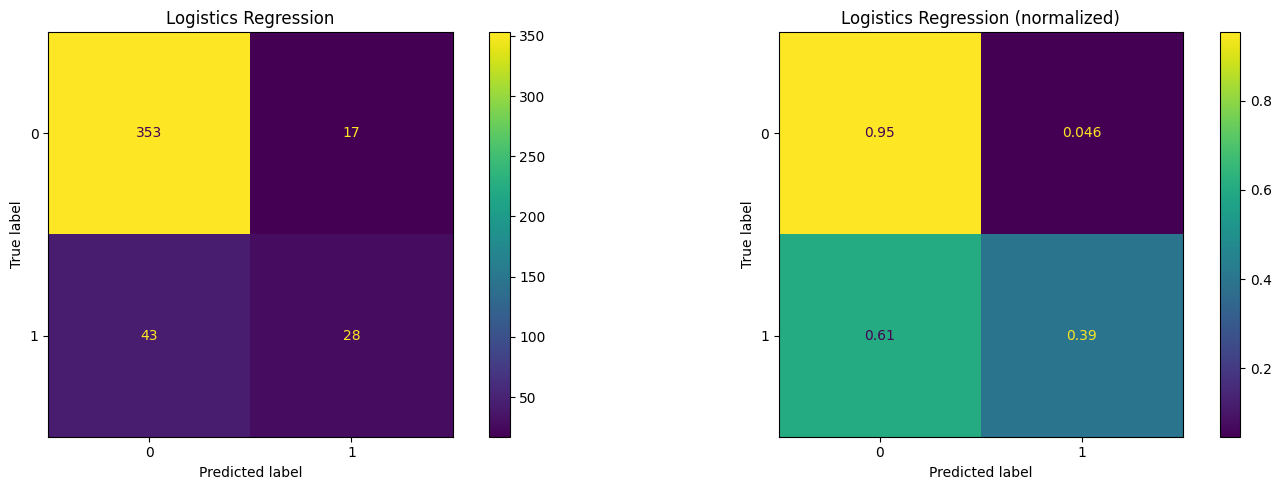

In [ ]:
confusion_matrix_plot('Logistics Regression', logr,  X_test_scaled, y_test)

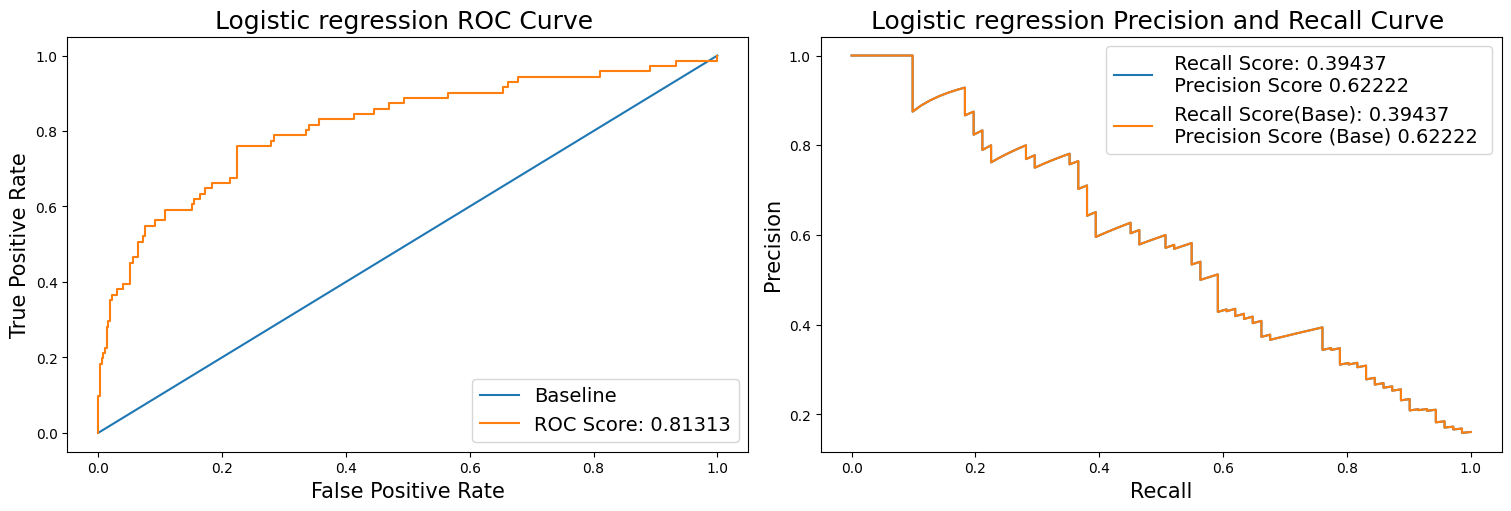

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_logr ,y_test, logr.predict_proba(X_test_scaled), "Logistic regression", logr)

Model có điểm ROC cao nhưng khả năng nhận biết mẫu có label là 1 vẫn còn kém, điểm Precision và Recall thấp.

<Axes: ylabel='attrition'>

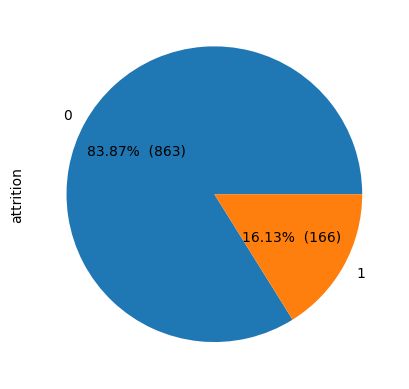

In [ ]:
y_train.value_counts().plot.pie(autopct = make_autopct(y_train.value_counts()))

Một rào cản làm cho mô hình gặp khó khăn trong việc xác định nhân viên nghỉ việc là do tỷ lệ bản ghi có label là 1 rất ít so với nhóm so sánh. Do đó, chúng ta sẽ sử dụng kỹ thuật SMOTE để tạo ra các ví dụ mới cho nhóm thiểu số, từ đó cải thiện độ chính xác và độ nhớ tới của mô hình.

#### Logistics Regression using SMOTE

Sử dụng SMOTE để sinh thêm data cho tập training.

In [ ]:
SM = SMOTE(sampling_strategy = 0.4, k_neighbors= 5)

In [ ]:
X_train_os, y_train_os = SM.fit_resample(X_train_scaled, y_train)

Text(0.5, 1.0, 'Before Oversampling')

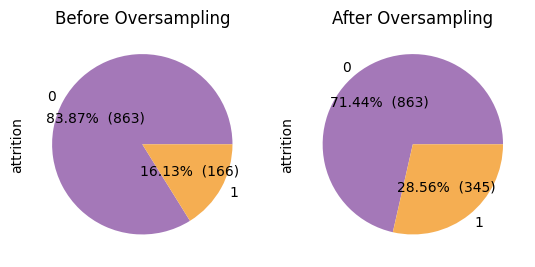

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols= 2)
y_train_os.value_counts().plot.pie(ax = ax[1], autopct = make_autopct(y_train_os.value_counts()), colors =['#A478B8', '#F5AE52'])
ax[1].set_title("After Oversampling")
y_train.value_counts().plot.pie(ax = ax[0], autopct = make_autopct(y_train.value_counts()), colors =['#A478B8', '#F5AE52'])
ax[0].set_title("Before Oversampling")

In [ ]:
logr_os = LogisticRegression(max_iter= 1000, random_state=69)
logr_os.fit(X_train_os, y_train_os)

Y_hat_logr_os = logr_os.predict(X_test_scaled)

The performance of the logistic regression with SMOTE is as below.

In [ ]:
Tab_logr_smote = metrics_scoring_table(Y_hat_logr_os, y_test, "Logistics Regression SMOTE")
Tab_logr_smote

model  accuracy score  precision score  recall score  \
0  Logistics Regression SMOTE        0.843537         0.513158      0.549296   

   f1 score  
0  0.530612

In [ ]:
print(classification_report( y_test, Y_hat_logr_os))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       370
           1       0.51      0.55      0.53        71

    accuracy                           0.84       441
   macro avg       0.71      0.72      0.72       441
weighted avg       0.85      0.84      0.85       441



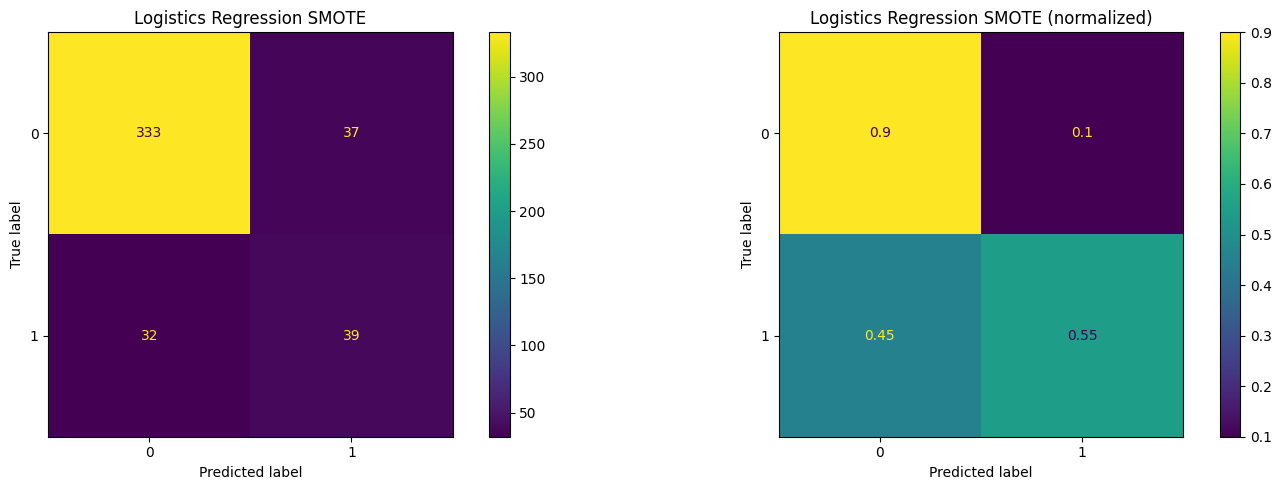

In [ ]:
confusion_matrix_plot("Logistics Regression SMOTE", logr_os, X_test_scaled,y_test)

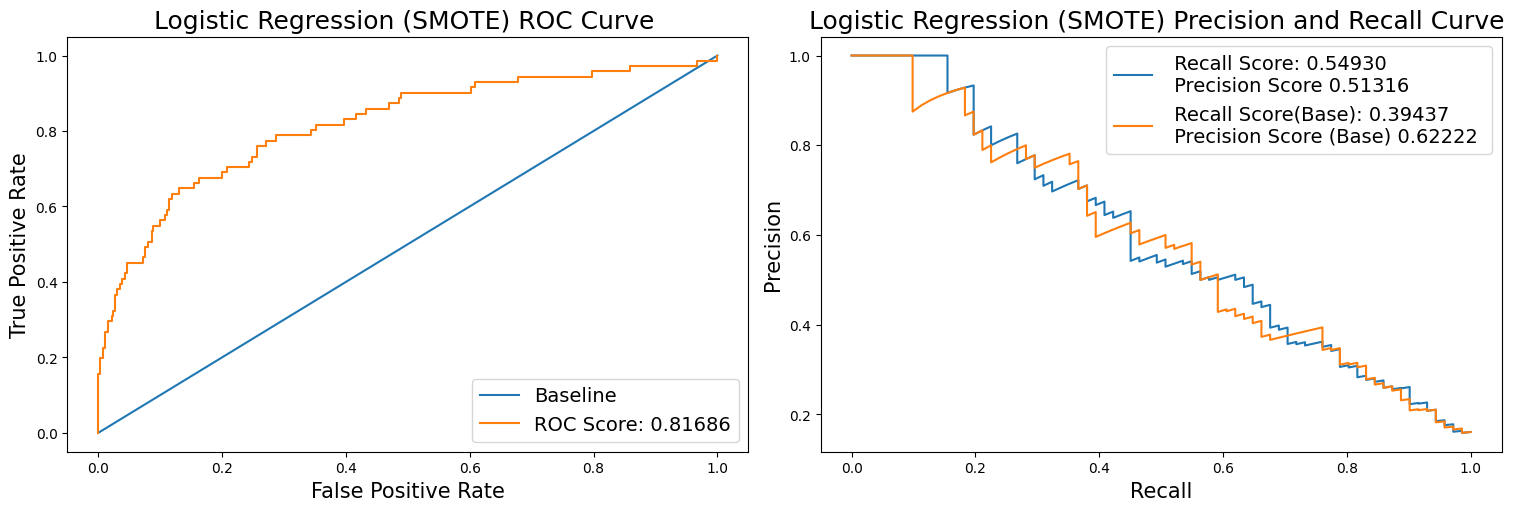

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_logr_os, y_test, logr_os.predict_proba(X_test_scaled), "Logistic Regression (SMOTE)", logr)

Điểm Precision và Recall đã tăng tuy nhiên mức điểm vẫn thấp

#### Logistic Regression with SMOTE and hyperparameter optimization with GridSearch

Nhóm sẽ tập trung vào tuning điểm recall để có thể dự báo tốt nhất khả năng rời bỏ công ty của một nhân viên

In [ ]:
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

In [ ]:
param_grid_logr = [
    {
    'C': np.arange(0, 0.0000003, 0.00000001),
    'tol': [0.001],
    'solver': ['liblinear'],
    'class_weight': [{1:1, 0:0.4}]
    }
]


In [ ]:
grid_search_logr = GridSearchCV(logr_os, param_grid_logr, cv = CV, scoring= "recall" , refit= True, verbose= True)

In [ ]:
grid_search_logr.fit(X_train_os, y_train_os)

Fitting 30 folds for each of 30 candidates, totalling 900 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=0),
             estimator=LogisticRegression(max_iter=1000, random_state=69),
             param_grid=[{'C': array([0.0e+00, 1.0e-08, 2.0e-08, 3.0e-08, 4.0e-08, 5.0e-08, 6.0e-08,
       7.0e-08, 8.0e-08, 9.0e-08, 1.0e-07, 1.1e-07, 1.2e-07, 1.3e-07,
       1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2.0e-07,
       2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07, 2.5e-07, 2.6e-07, 2.7e-07,
       2.8e-07, 2.9e-07]),
                          'class_weight': [{0: 0.4, 1: 1}],
                          'solver': ['liblinear'], 'tol': [0.001]}],
             scoring='recall', verbose=True)

In [ ]:
best_logr = grid_search_logr.best_estimator_

In [ ]:
best_logr.fit(X_train_os,y_train_os)

LogisticRegression(C=1e-08, class_weight={0: 0.4, 1: 1}, max_iter=1000,
                   random_state=69, solver='liblinear', tol=0.001)

In [ ]:
Y_hat_best_logr = best_logr.predict(X_test_scaled)
Y_prob_best_logr = best_logr.predict_proba(X_test_scaled)

In [ ]:
Tab_logr_tuned = metrics_scoring_table(Y_hat_best_logr, y_test, "Logistics Regression (Tuned)")

In [ ]:
print(classification_report(y_test, Y_hat_best_logr))

              precision    recall  f1-score   support

           0       0.94      0.49      0.65       370
           1       0.24      0.85      0.38        71

    accuracy                           0.55       441
   macro avg       0.59      0.67      0.51       441
weighted avg       0.83      0.55      0.61       441



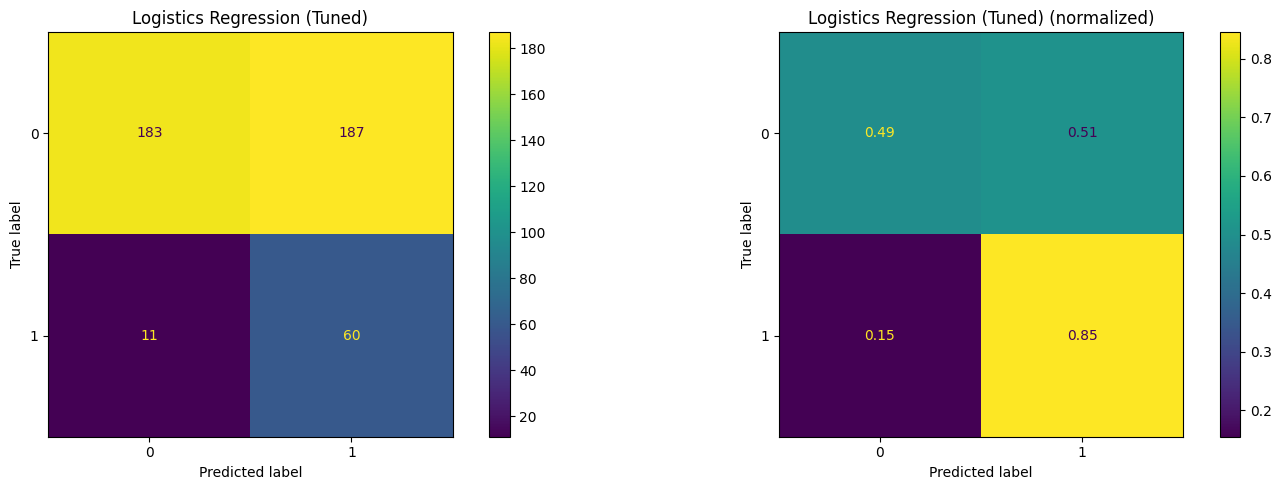

In [ ]:
confusion_matrix_plot("Logistics Regression (Tuned)", best_logr, X_test_scaled, y_test )

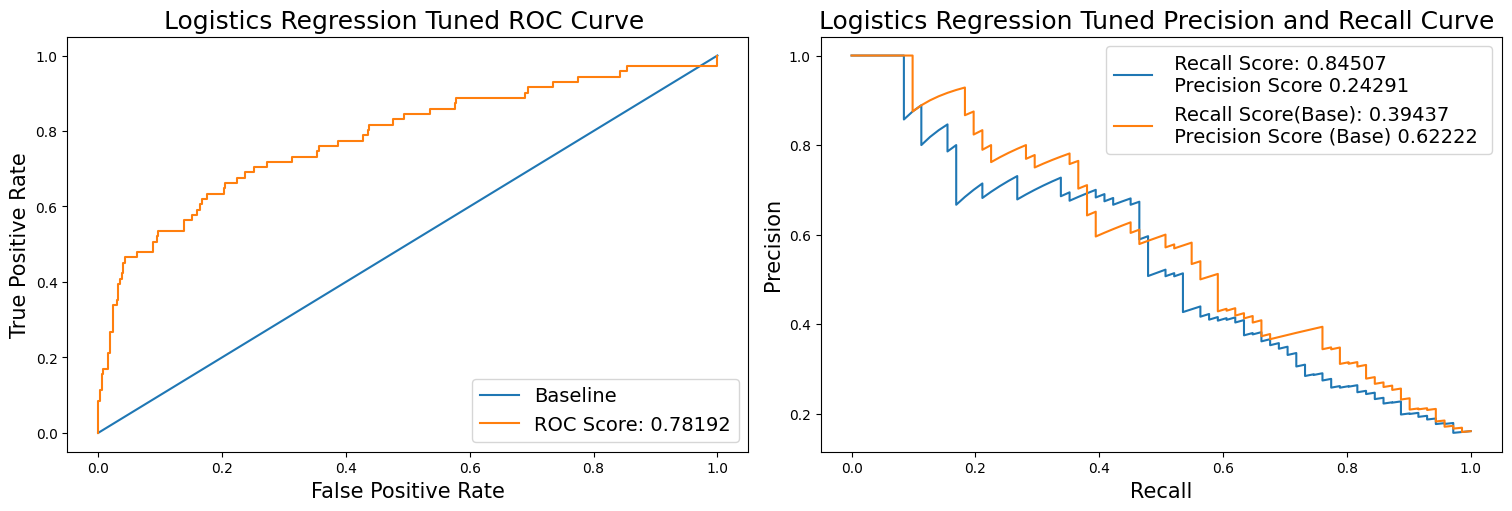

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_best_logr, y_test, Y_prob_best_logr, "Logistics Regression Tuned", logr)

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

### Random Forest model

#### Random Forest using SMOTE

In [ ]:
RF_os = RandomForestClassifier(random_state=23)

In [ ]:
RF_os.fit(X_train_os, y_train_os)

RandomForestClassifier(random_state=23)

In [ ]:
Y_hat_rf_os = RF_os.predict(X_test_scaled)
Y_prob_rf_os = RF_os.predict_proba(X_test_scaled)

In [ ]:
Tab_rf_smote = metrics_scoring_table(Y_hat_rf_os, y_test, "Random Forest (SMOTE)")
Tab_rf_smote

model  accuracy score  precision score  recall score  \
0  Random Forest (SMOTE)        0.866213             0.75      0.253521   

   f1 score  
0  0.378947

In [ ]:
print(classification_report(y_test, Y_hat_rf_os))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93       370
           1       0.75      0.25      0.38        71

    accuracy                           0.87       441
   macro avg       0.81      0.62      0.65       441
weighted avg       0.85      0.87      0.84       441



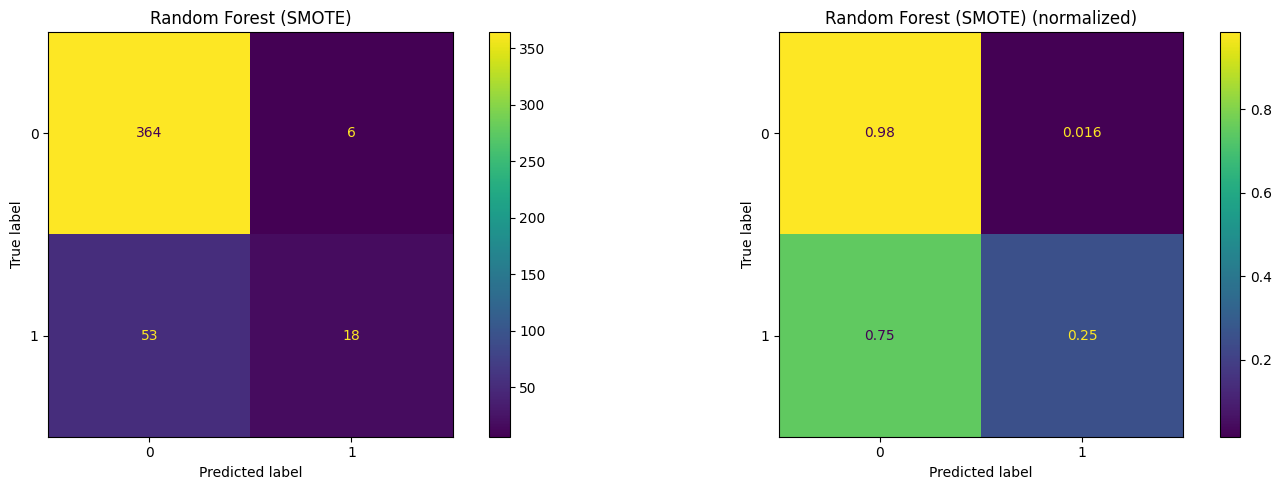

In [ ]:
confusion_matrix_plot( "Random Forest (SMOTE)",RF_os, X_test_scaled, y_test )

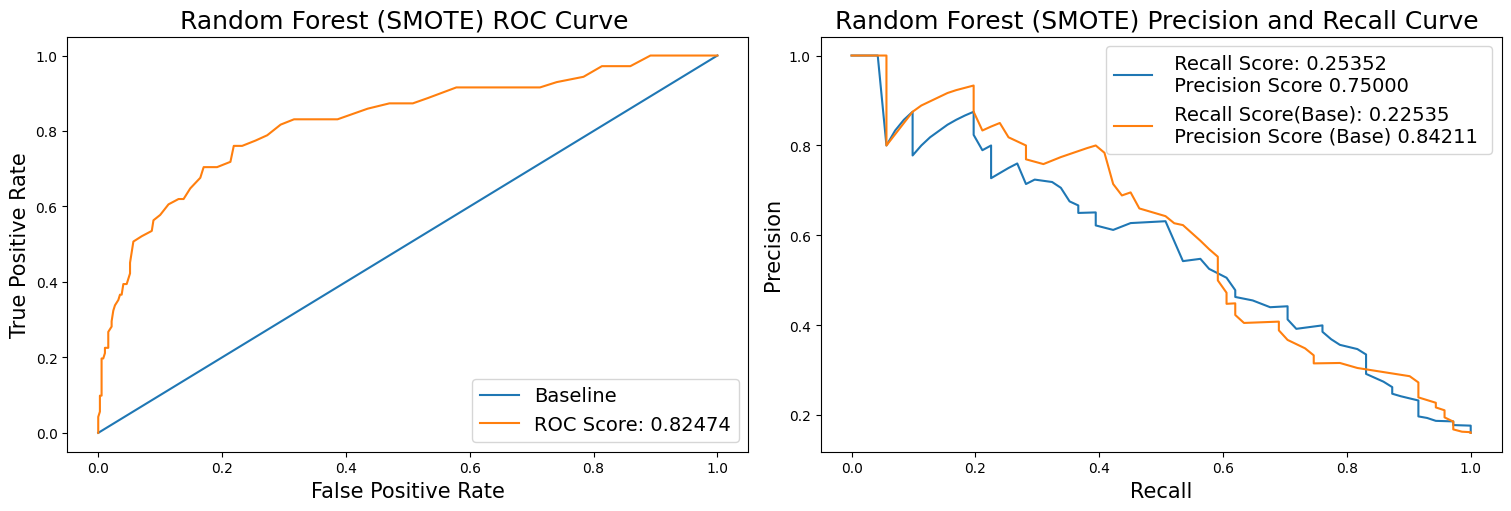

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_rf_os, y_test, Y_prob_rf_os, "Random Forest (SMOTE)", RandomForestClassifier(random_state=23))

#### Random forest with SMOTE and hyperparameters tuning with GridSearchCV

In [ ]:
RF_tuned = RandomForestClassifier()

In [ ]:
n_estimators = np.arange(82, 90, 1)
max_depth = np.arange(1,3,1)
grid_RF_params = param_grid = {
              'min_samples_split':[2,5,8],
              'min_samples_leaf': [19,20,23],
              'max_depth': [5,7,8],
              'class_weight' : [{1:0.9, 0:0.1}],
                'bootstrap': [ False],
                'random_state': [70]


}


In [ ]:
grid_RF_cv = GridSearchCV(RF_tuned, grid_RF_params, scoring = 'recall', refit = True, cv=CV, verbose=1)

In [ ]:
grid_RF_cv.fit(X_train_os, y_train_os)

Fitting 30 folds for each of 27 candidates, totalling 810 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=0),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False],
                         'class_weight': [{0: 0.1, 1: 0.9}],
                         'max_depth': [5, 7, 8],
                         'min_samples_leaf': [19, 20, 23],
                         'min_samples_split': [2, 5, 8], 'random_state': [70]},
             scoring='recall', verbose=1)

In [ ]:
best_RF = grid_RF_cv.best_estimator_

In [ ]:
best_RF.fit(X_train_os, y_train_os)

RandomForestClassifier(bootstrap=False, class_weight={0: 0.1, 1: 0.9},
                       max_depth=5, min_samples_leaf=23, random_state=70)

In [ ]:
Y_hat_best_rf = best_RF.predict(X_test_scaled)
Y_prob_best_rf = best_RF.predict_proba(X_test_scaled)

In [ ]:
Tab_rf_tuned = metrics_scoring_table(Y_hat_best_rf, y_test, "Random Forest Tuned")
Tab_rf_tuned

model  accuracy score  precision score  recall score  \
0  Random Forest Tuned        0.419501         0.206349      0.915493   

   f1 score  
0  0.336788

In [ ]:
print(classification_report(y_test, Y_hat_best_rf))

              precision    recall  f1-score   support

           0       0.95      0.32      0.48       370
           1       0.21      0.92      0.34        71

    accuracy                           0.42       441
   macro avg       0.58      0.62      0.41       441
weighted avg       0.83      0.42      0.46       441



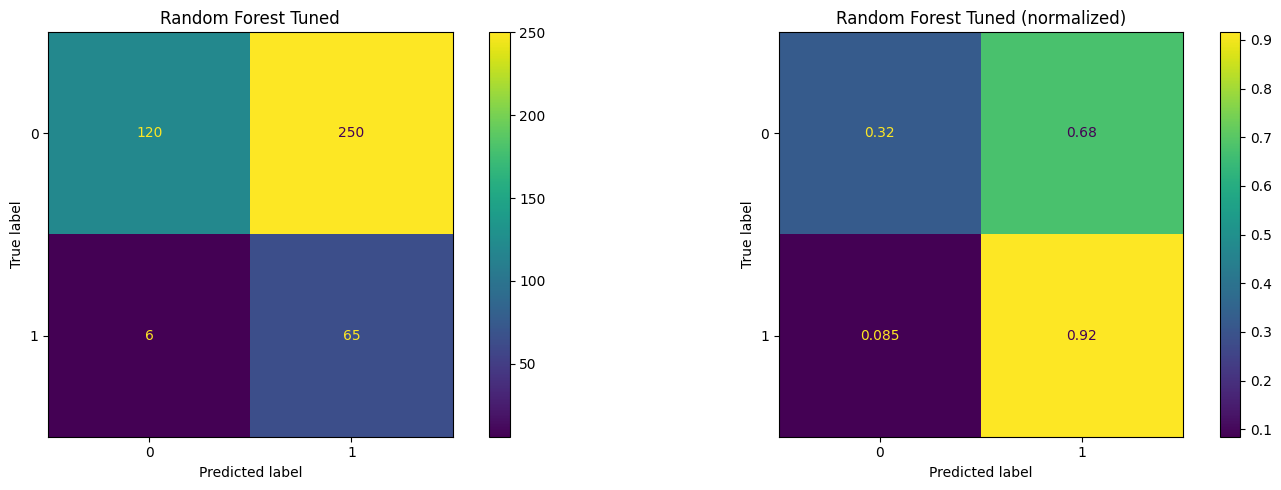

In [ ]:
confusion_matrix_plot("Random Forest Tuned", best_RF, X_test_scaled, y_test)

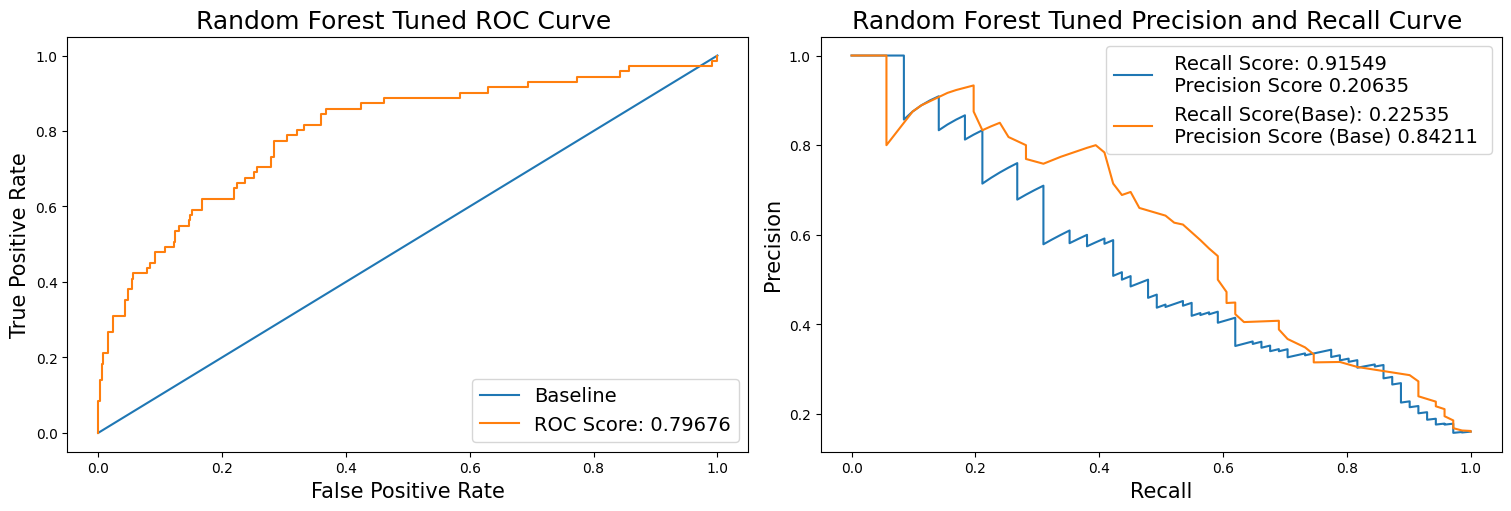

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_best_rf, y_test, Y_prob_best_rf, "Random Forest Tuned", RandomForestClassifier(random_state = 23))

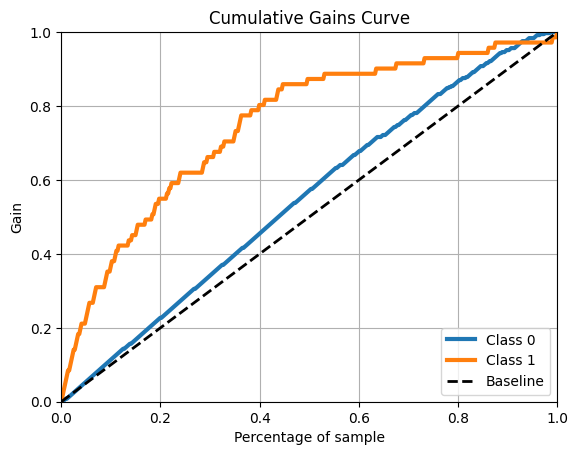

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, Y_prob_best_rf)

plt.show()

### XGBoost

In [ ]:
xgb_model = XGBClassifier()


xgb_model.fit(X_train_os, y_train_os)


y_pred = xgb_model.predict(X_test_scaled)

In [ ]:
Y_hat_xgb_os = xgb_model.predict(X_test_scaled)
Y_prob_xgb_os = xgb_model.predict_proba(X_test_scaled)

In [ ]:
Tab_xgb_smote = metrics_scoring_table(Y_hat_xgb_os, y_test, "XGB (SMOTE)")
Tab_xgb_smote

model  accuracy score  precision score  recall score  f1 score
0  XGB (SMOTE)        0.879819           0.6875      0.464789  0.554622

In [ ]:
print(classification_report(y_test, Y_hat_xgb_os))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       370
           1       0.69      0.46      0.55        71

    accuracy                           0.88       441
   macro avg       0.80      0.71      0.74       441
weighted avg       0.87      0.88      0.87       441



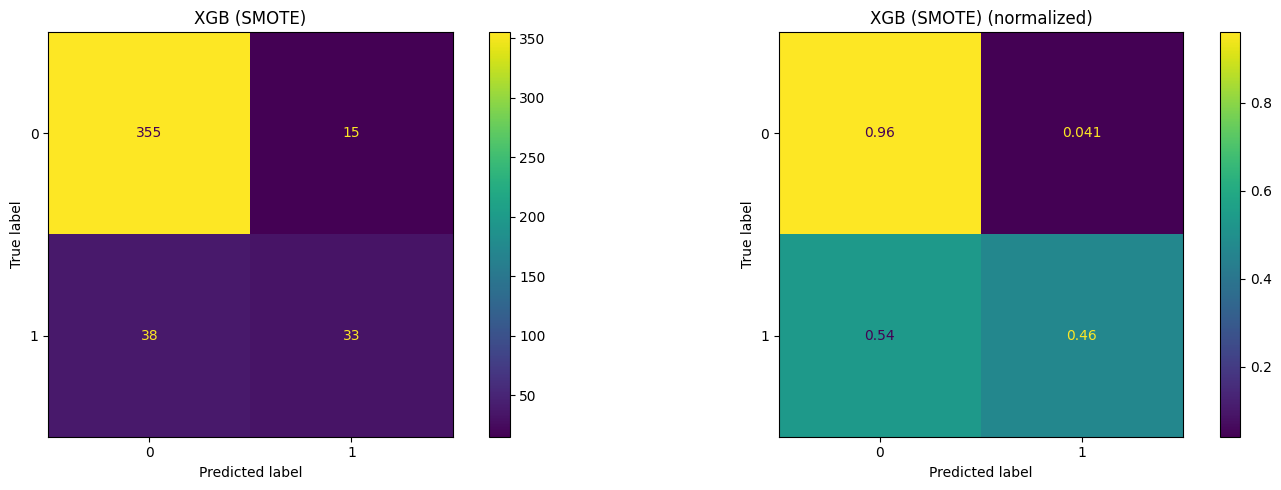

In [ ]:
confusion_matrix_plot( "XGB (SMOTE)",xgb_model, X_test_scaled, y_test )

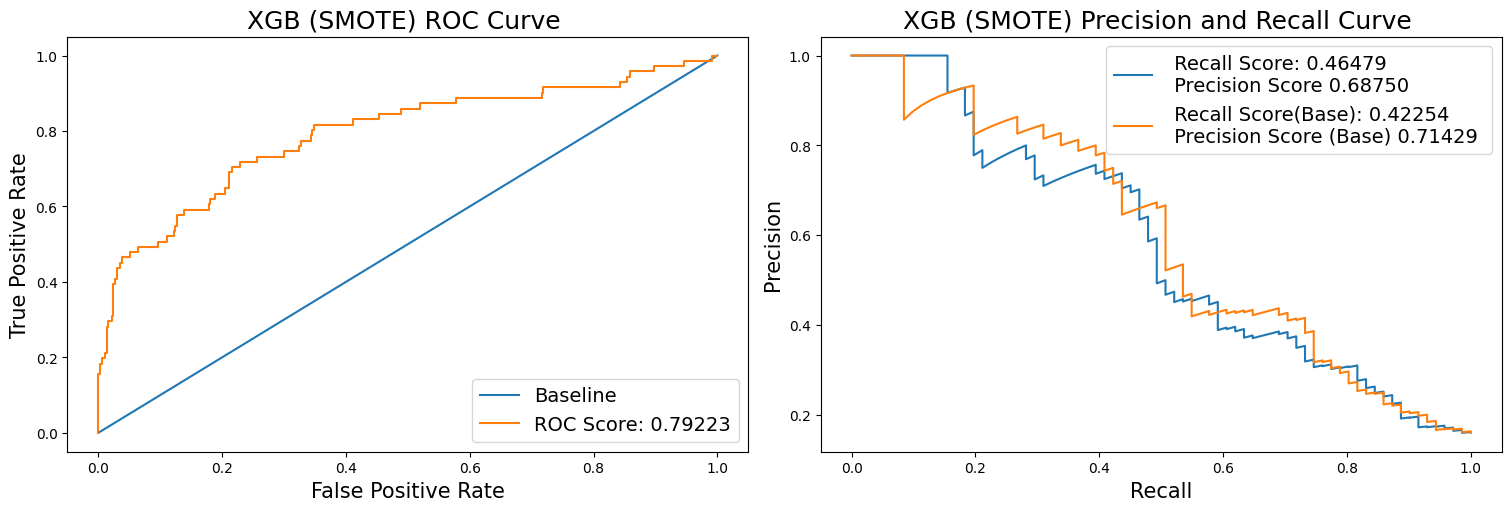

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_xgb_os, y_test, Y_prob_xgb_os, "XGB (SMOTE)", XGBClassifier())

#### XGB with SMOTE and hyperparameters tuning with GridSearchCV

In [ ]:
xgb_tuned = XGBClassifier()

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'scale_pos_weight': [9]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_tuned, param_grid=param_grid, cv=CV, scoring='recall')
grid_search_xgb.fit(X, y)


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=0),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importa...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'scale_pos_weight': [9], 'subsample': [0.8, 1.0]},
             scoring='recall')

In [ ]:
best_xgb = grid_search_xgb.best_estimator_

In [ ]:
best_xgb.fit(X_train_os, y_train_os)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
Y_hat_best_xgb = best_xgb.predict(X_test_scaled)
Y_prob_best_xgb = best_xgb.predict_proba(X_test_scaled)

In [ ]:
Tab_xgb_tuned = metrics_scoring_table(Y_hat_best_xgb, y_test, "XGB Tuned")
Tab_xgb_tuned

model  accuracy score  precision score  recall score  f1 score
0  XGB Tuned        0.433107         0.202658      0.859155  0.327957

In [ ]:
print(classification_report(y_test, Y_hat_best_xgb))

              precision    recall  f1-score   support

           0       0.93      0.35      0.51       370
           1       0.20      0.86      0.33        71

    accuracy                           0.43       441
   macro avg       0.57      0.61      0.42       441
weighted avg       0.81      0.43      0.48       441



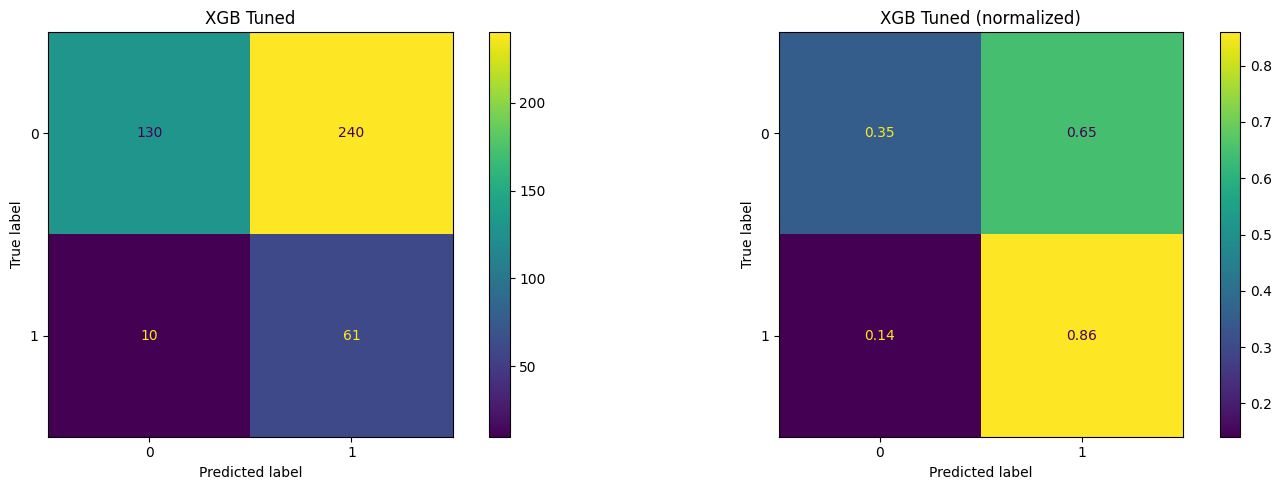

In [ ]:
confusion_matrix_plot("XGB Tuned", best_xgb, X_test_scaled, y_test)

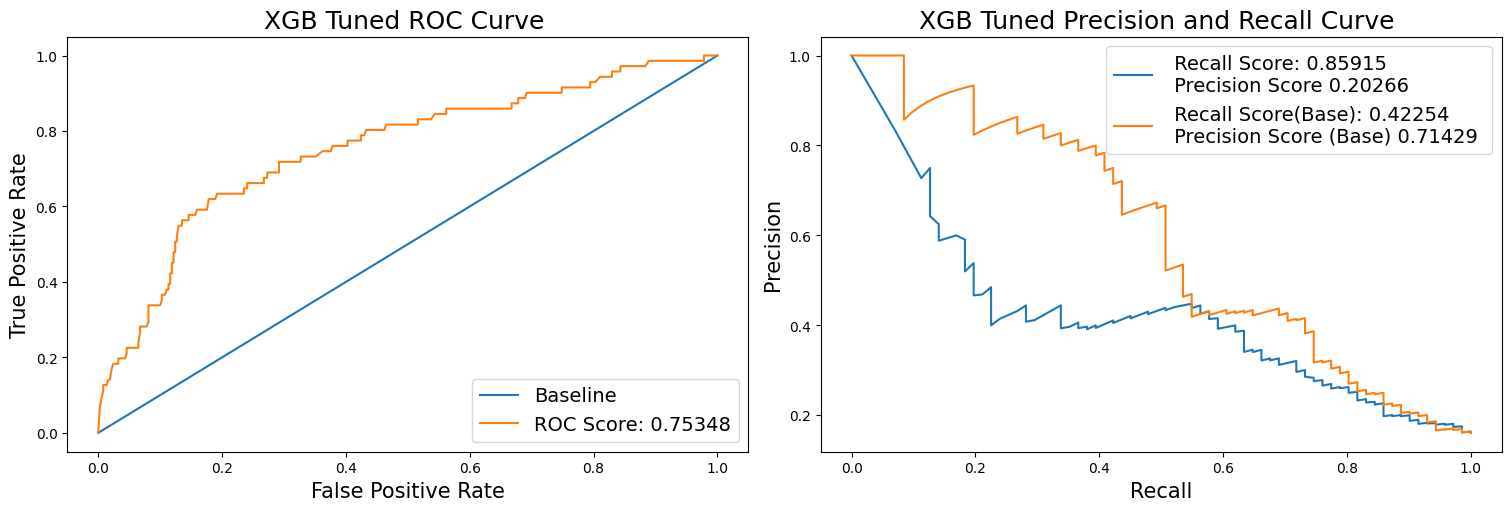

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_best_xgb, y_test, Y_prob_best_xgb, "XGB Tuned", XGBClassifier())

### Gaussian Naives Bayes

In [ ]:
nb_model = GaussianNB()

nb_model.fit(X_train_os, y_train_os)



GaussianNB()

In [ ]:
Y_hat_nb_os = nb_model.predict(X_test_scaled)
Y_prob_nb_os = nb_model.predict_proba(X_test_scaled)

In [ ]:
Tab_nb_smote = metrics_scoring_table(Y_hat_nb_os, y_test, "Naives Bayes (SMOTE)")
Tab_nb_smote

model  accuracy score  precision score  recall score  \
0  Naives Bayes (SMOTE)        0.548753         0.235537      0.802817   

   f1 score  
0  0.364217

In [ ]:
print(classification_report(y_test, Y_hat_nb_os))

              precision    recall  f1-score   support

           0       0.93      0.50      0.65       370
           1       0.24      0.80      0.36        71

    accuracy                           0.55       441
   macro avg       0.58      0.65      0.51       441
weighted avg       0.82      0.55      0.60       441



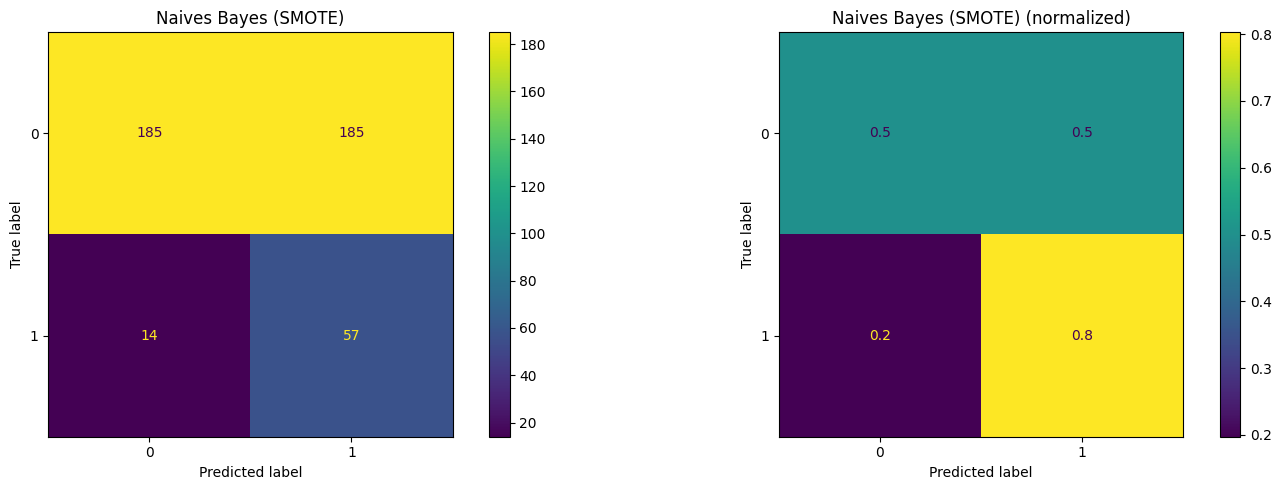

In [ ]:
confusion_matrix_plot( "Naives Bayes (SMOTE)",nb_model, X_test_scaled, y_test )

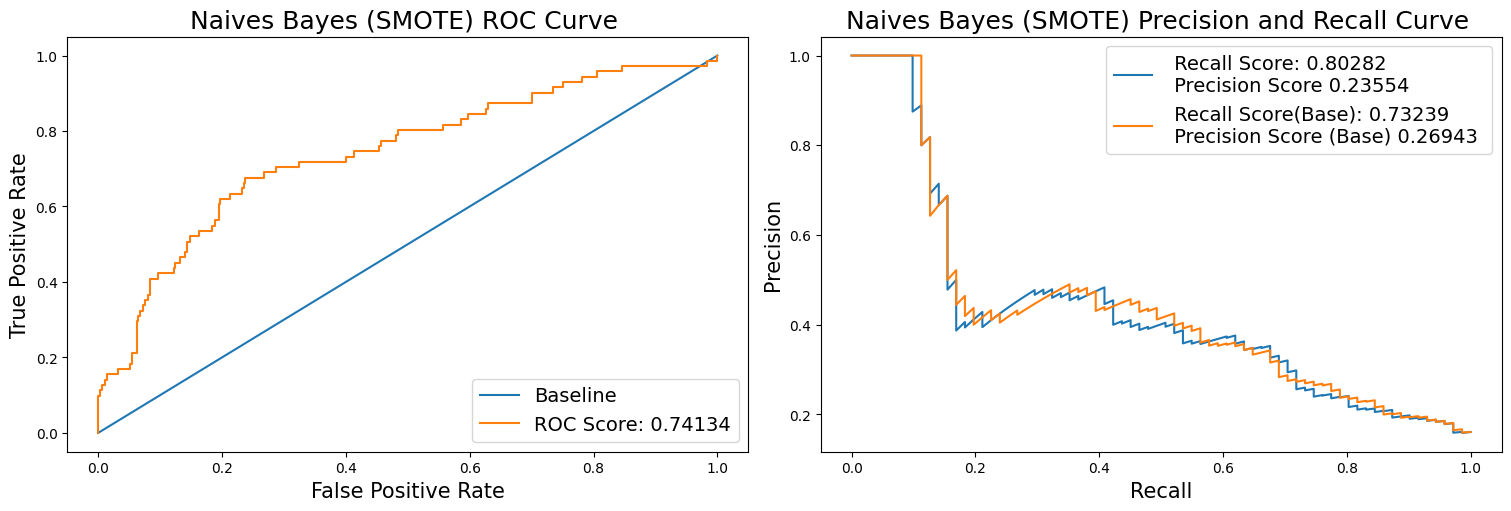

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_nb_os, y_test, Y_prob_nb_os, "Naives Bayes (SMOTE)", GaussianNB())

#### Naives Bayes with SMOTE and hyperparameters tuning with GridSearchCV

In [ ]:
nb_tuned = GaussianNB()

In [ ]:
param_grid = {
    'priors': [None, [0.3, 0.7], [0.4, 0.6]]  # Example values for the prior probabilities
}

# Perform GridSearchCV
grid_search_nb = GridSearchCV(estimator=nb_tuned, param_grid=param_grid, cv=CV, scoring='recall')
grid_search_nb.fit(X, y)


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=0),
             estimator=GaussianNB(),
             param_grid={'priors': [None, [0.3, 0.7], [0.4, 0.6]]},
             scoring='recall')

In [ ]:
best_nb = grid_search_nb.best_estimator_

In [ ]:
best_nb.fit(X_train_os, y_train_os)

GaussianNB(priors=[0.3, 0.7])

In [ ]:
Y_hat_best_nb = best_nb.predict(X_test_scaled)
Y_prob_best_nb = best_nb.predict_proba(X_test_scaled)

In [ ]:
Tab_nb_tuned = metrics_scoring_table(Y_hat_best_nb, y_test, "Naives Bayes Tuned")
Tab_nb_tuned

model  accuracy score  precision score  recall score  f1 score
0  Naives Bayes Tuned        0.464853         0.210526       0.84507  0.337079

In [ ]:
print(classification_report(y_test, Y_hat_best_nb))

              precision    recall  f1-score   support

           0       0.93      0.39      0.55       370
           1       0.21      0.85      0.34        71

    accuracy                           0.46       441
   macro avg       0.57      0.62      0.44       441
weighted avg       0.81      0.46      0.52       441



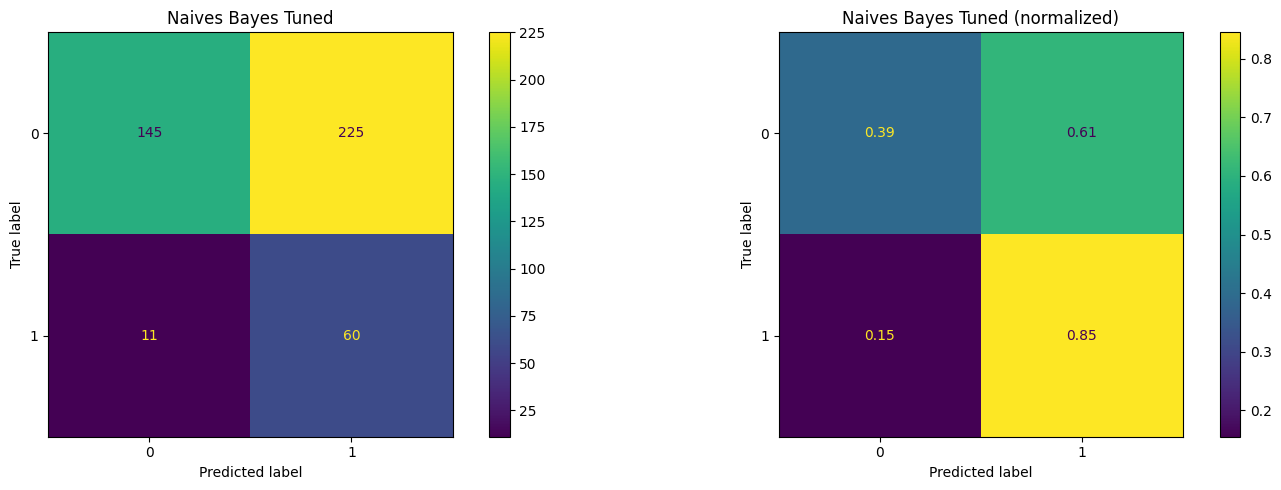

In [ ]:
confusion_matrix_plot("Naives Bayes Tuned", best_nb, X_test_scaled, y_test)

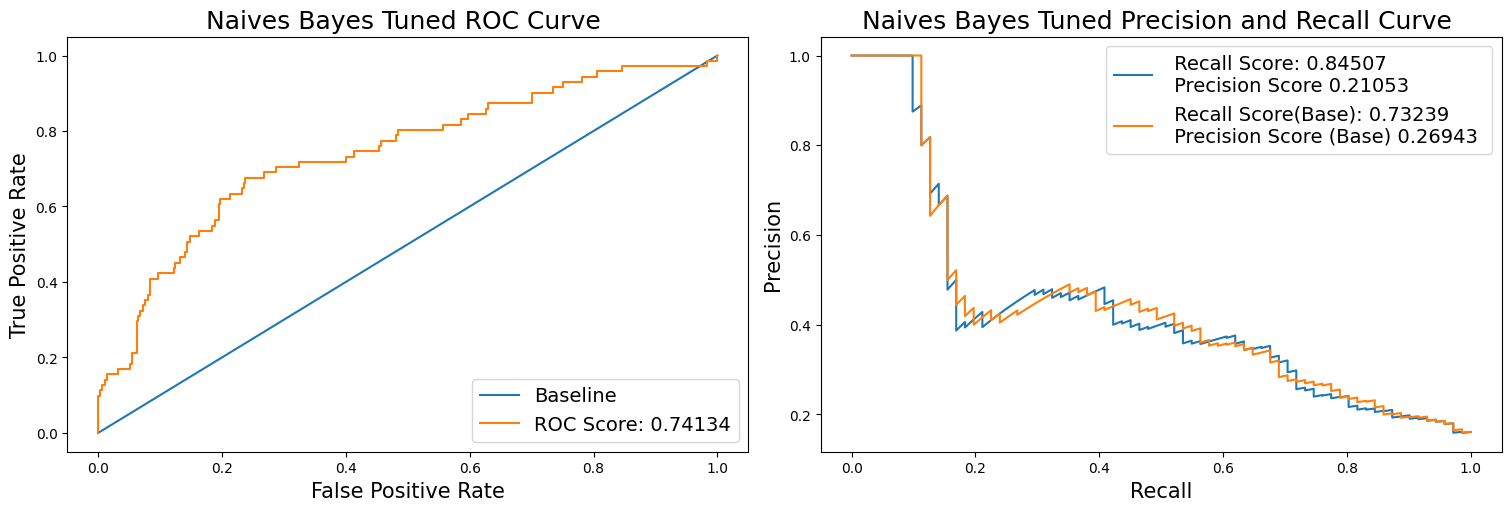

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_best_nb, y_test, Y_prob_best_nb, "Naives Bayes Tuned", GaussianNB())

### Summary

In [ ]:
df_sum = pd.concat([Tab_logr_smote, Tab_logr_tuned, Tab_rf_smote, Tab_rf_tuned, Tab_xgb_smote, Tab_xgb_tuned, Tab_nb_smote, Tab_nb_tuned])
df_sum.sort_values(by = "recall score", ascending= False)

model  accuracy score  precision score  \
0           Random Forest Tuned        0.419501         0.206349   
0                     XGB Tuned        0.433107         0.202658   
0  Logistics Regression (Tuned)        0.551020         0.242915   
0            Naives Bayes Tuned        0.464853         0.210526   
0          Naives Bayes (SMOTE)        0.548753         0.235537   
0    Logistics Regression SMOTE        0.843537         0.513158   
0                   XGB (SMOTE)        0.879819         0.687500   
0         Random Forest (SMOTE)        0.866213         0.750000   

   recall score  f1 score  
0      0.915493  0.336788  
0      0.859155  0.327957  
0      0.845070  0.377358  
0      0.845070  0.337079  
0      0.802817  0.364217  
0      0.549296  0.530612  
0      0.464789  0.554622  
0      0.253521  0.378947

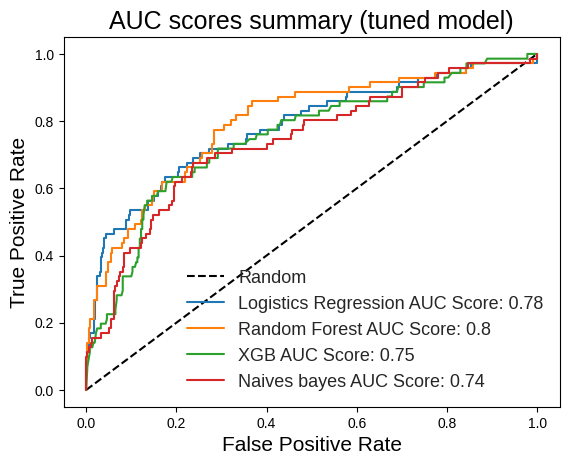

In [ ]:
roc_summary_plot(y_test, [ Y_prob_best_logr, Y_prob_best_rf, Y_prob_best_xgb, Y_prob_best_nb],
                         [ "Logistics Regression", "Random Forest", "XGB", 'Naives bayes'])

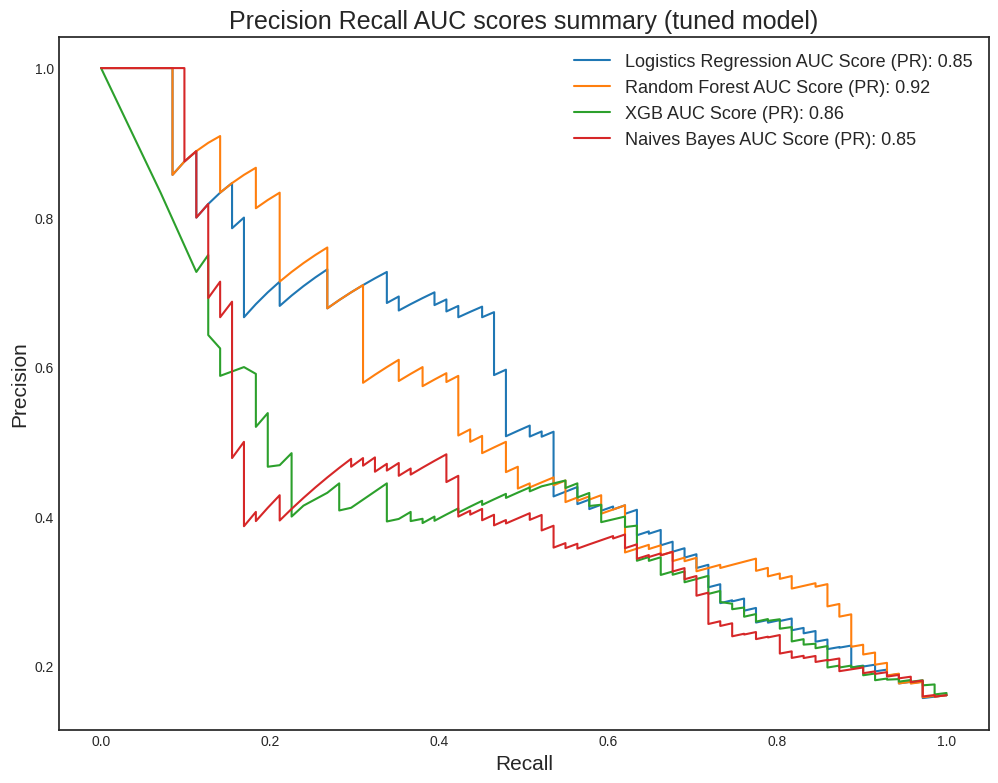

In [ ]:
precision_and_recall_curve_summary(y_test, [ Y_prob_best_logr, Y_prob_best_rf, Y_prob_best_xgb, Y_prob_best_nb],
                         [ "Logistics Regression", "Random Forest", "XGB", 'Naives Bayes'], [Y_hat_best_logr, Y_hat_best_rf, Y_hat_best_xgb, Y_hat_best_nb])

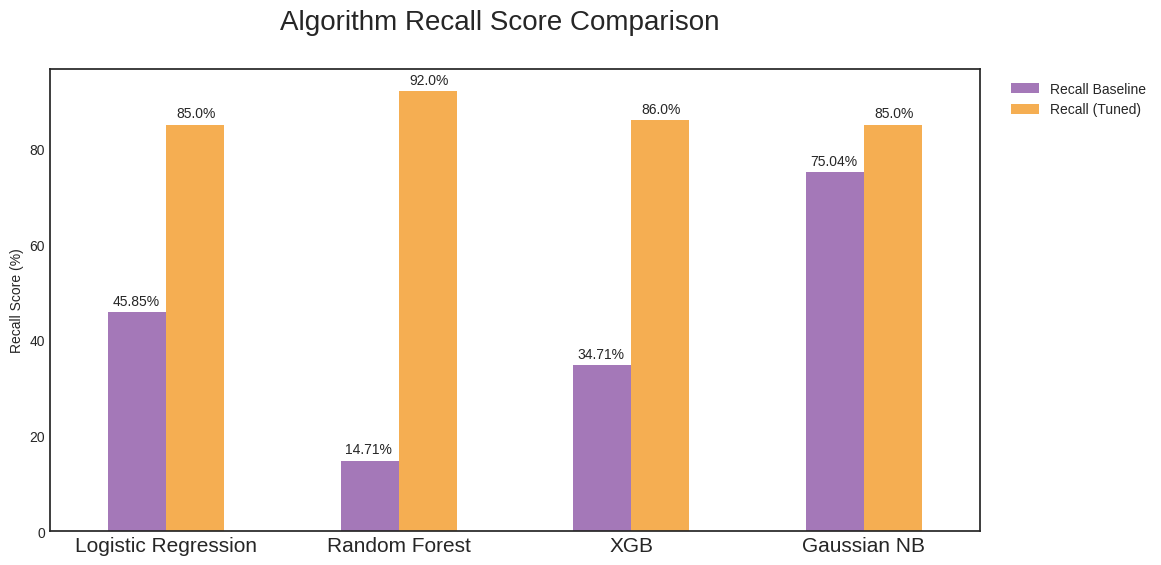

In [ ]:
df_results.rename(columns={'Recall Mean': 'Recall Baseline'}, inplace =True)
df_results['Recall (Tuned)'] = [recall_score(y_test, Y_hat_best_logr).round(2), recall_score(y_test, Y_hat_best_rf).round(2),recall_score(y_test, Y_hat_best_xgb).round(2),recall_score(y_test, Y_hat_best_nb).round(2)]
df_results['Recall (Tuned)'] = df_results['Recall (Tuned)'] *100
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Algorithm Recall Score Comparison', fontsize =20)
ax = fig.add_subplot(111)
df_results[['Algorithm', 'Recall Baseline', 'Recall (Tuned)']].plot.bar(ax= ax, color = ['#A478B8', '#F5AE52'])
ax.set_xticklabels(df_results.Algorithm, fontsize = 15)
ax.tick_params(axis = 'x', rotation = 0)
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
ax.set_ylabel('Recall Score (%)')
for i, v in enumerate(df_results['Recall Baseline']):
    ax.annotate(str(v)+'%', xy=(i-0.13, v), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
bar_width = 0.1

# Add value labels to the bars for the second set of bars
for i, v in enumerate(df_results['Recall (Tuned)']):
    ax.annotate(str(v)+'%', xy=(i + bar_width+0.03, v), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

### Conclusion

-> Random Forest cho ra chỉ số Recall tốt nhất

# 4. Feature Importance

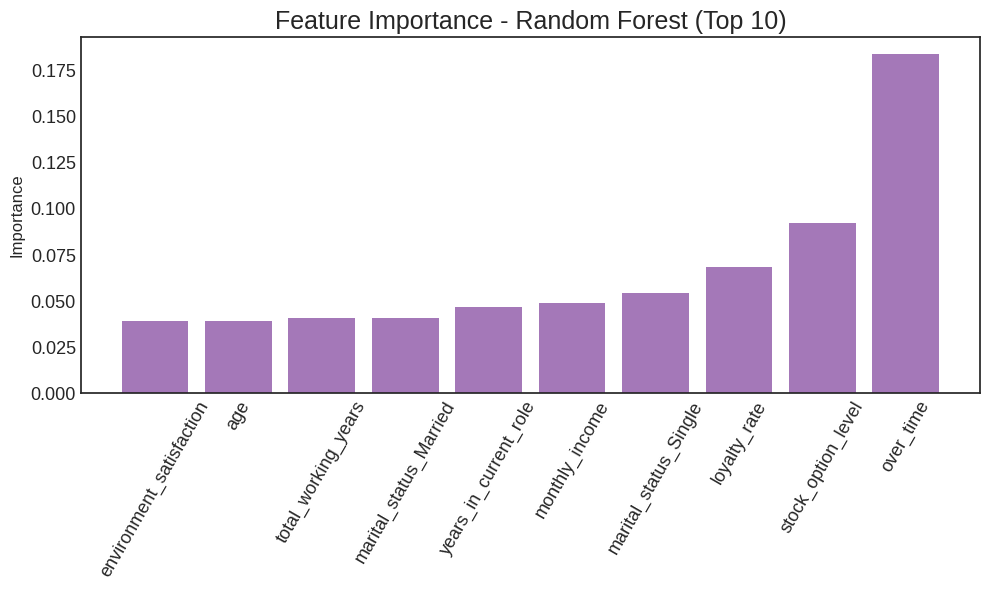

In [ ]:
# Get the feature importances
importances = best_RF.feature_importances_

# Get the corresponding feature names
feature_names = X.columns

# Sort the feature importances in descending order

rf_fi = pd.Series(index = feature_names, data =importances).sort_values().tail(10)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(x= rf_fi.index, height = rf_fi.values, color ='#A478B8' )
plt.ylabel('Importance', fontsize = 12)
plt.tick_params(axis = 'x', rotation = 60, labelsize = 13)
plt.tick_params(axis = 'y', rotation = 0, labelsize = 13)
plt.title('Feature Importance - Random Forest (Top 10)', fontsize = 18)
plt.tight_layout()
plt.show()

# 5. Current Employees Segmentation

In [ ]:
X_km = df_one_hot_encoded.loc[ df_one_hot_encoded['attrition'] == 0,rf_fi.tail(10).index]

In [ ]:
X_km

environment_satisfaction  age  total_working_years  \
1                            3   49                   10   
3                            4   33                    8   
4                            1   27                    6   
5                            4   32                    8   
6                            3   59                   12   
...                        ...  ...                  ...   
1395                         3   40                   21   
1396                         2   27                    6   
1397                         4   37                   16   
1398                         2   34                   12   
1399                         3   36                    7   

      marital_status_Married  years_in_current_role  monthly_income  \
1                          1                      7            5130   
3                          1                      7            2909   
4                          1                      2            3468   
5                          0                      7            3068   
6                          1                      0            2670   
...                      ...                    ...             ...   
1395                       0                      7           16437   
1396                       1                      2            6142   
1397                       1                      3            4284   
1398                       1                     10            2308   
1399                       0                      2            2644   

      marital_status_Single  loyalty_rate  stock_option_level  over_time  
1                         0      5.000000                   1          0  
3                         0      4.000000                   0          1  
4                         0      0.600000                   1          0  
5                         1      8.000000                   0          0  
6                         0      2.400000                   3          1  
...                     ...           ...                 ...        ...  
1395                      1     10.500000                   0          1  
1396                      0      3.000000                   1          1  
1397                      0      2.666667                   1          1  
1398                      0     12.000000                   1          1  
1399                      1      1.750000                   0          1  

[1233 rows x 10 columns]

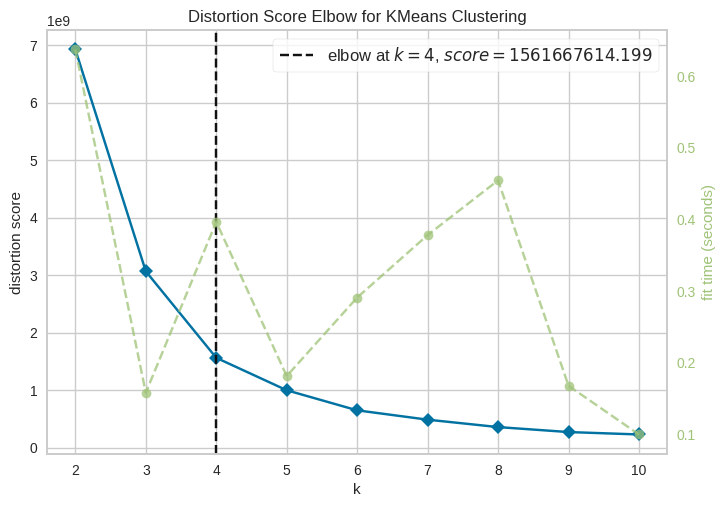

<Figure size 1000x500 with 0 Axes>

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Assuming you have your feature matrix X

# Create a K-means clustering model
kmeans = KMeans()

# Instantiate the elbow visualizer with the K-means model
visualizer = KElbowVisualizer(kmeans)

# Fit the visualizer to the data
visualizer.fit(X_km)
plt.figure(figsize=(10,5))
# Visualize the elbow curve
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=4)  # Specify the number of clusters

# Fit the model to the data
kmeans.fit(X_km)



KMeans(n_clusters=4)

In [ ]:
X_km['label'] = kmeans.labels_

In [ ]:
cur_data = data[data['attrition'] == 0]

In [ ]:
cur_data['group']= kmeans.labels_

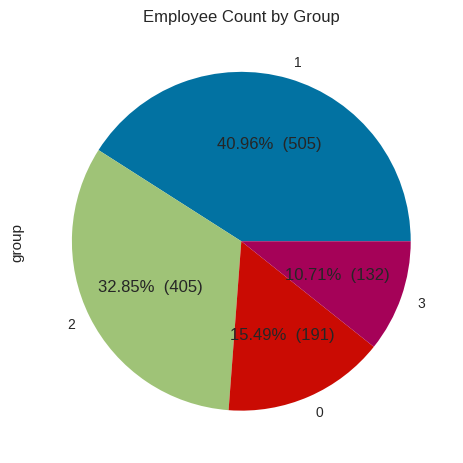

In [ ]:
cur_data['group'].value_counts().plot.pie(autopct = make_autopct(cur_data['group'].value_counts()))
plt.title('Employee Count by Group')
plt.show()

In [ ]:
cur_data

attrition    business_travel    attrition_label department  \
1             0  Travel_Frequently  Current Employees        R&D   
3             0  Travel_Frequently  Current Employees        R&D   
4             0      Travel_Rarely  Current Employees        R&D   
5             0  Travel_Frequently  Current Employees        R&D   
6             0      Travel_Rarely  Current Employees        R&D   
...         ...                ...                ...        ...   
1395          0      Travel_Rarely  Current Employees         HR   
1396          0      Travel_Rarely  Current Employees        R&D   
1397          0      Travel_Rarely  Current Employees        R&D   
1398          0      Travel_Rarely  Current Employees      Sales   
1399          0      Travel_Rarely  Current Employees      Sales   

       education_field      emp_no  employee_number  gender  \
1        Life Sciences     STAFF-2                2    Male   
3        Life Sciences     STAFF-5                5  Female   
4              Medical     STAFF-7                7    Male   
5        Life Sciences     STAFF-8                8    Male   
6              Medical    STAFF-10               10  Female   
...                ...         ...              ...     ...   
1395           Medical  STAFF-1550             1550    Male   
1396     Life Sciences  STAFF-2064             2064    Male   
1397           Medical  STAFF-1885             1885    Male   
1398  Technical Degree  STAFF-1541             1541    Male   
1399     Life Sciences  STAFF-1556             1556    Male   

                    job_role marital_status over_time over18  \
1         Research Scientist        Married        No      Y   
3         Research Scientist        Married       Yes      Y   
4      Laboratory Technician        Married        No      Y   
5      Laboratory Technician         Single        No      Y   
6      Laboratory Technician        Married       Yes      Y   
...                      ...            ...       ...    ...   
1395                 Manager         Single       Yes      Y   
1396  Manufacturing Director        Married       Yes      Y   
1397      Research Scientist        Married       Yes      Y   
1398    Sales Representative        Married       Yes      Y   
1399    Sales Representative         Single       Yes      Y   

      training_times_last_year  age  current_employee  daily_rate  \
1                            3   49                 1         279   
3                            3   33                 1        1392   
4                            3   27                 1         591   
5                            2   32                 1        1005   
6                            3   59                 1        1324   
...                        ...  ...               ...         ...   
1395                         2   40                 1         898   
1396                         0   27                 1         155   
1397                         2   37                 1         783   
1398                         4   34                 1        1440   
1399                         3   36                 1        1157   

      distance_from_home          education  employee_count  \
1                      8        High School               1   
3                      3    Master's Degree               1   
4                      2        High School               1   
5                      2  Associates Degree               1   
6                      3  Bachelor's Degree               1   
...                  ...                ...             ...   
1395                   6  Associates Degree               1   
1396                   4  Bachelor's Degree               1   
1397                   7    Master's Degree               1   
1398                   7  Associates Degree               1   
1399                   2    Master's Degree               1   

      environment_satisfaction  hourly_rate  job_involvement  job_level  \
1 

In [ ]:
def boxplots(category):
    num_cols_with_cat = cur_data[[category, 'age', 'distance_from_home', 'daily_rate',  'hourly_rate', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager', 'years_at_company', 'total_working_years', 'training_times_last_year', 'environment_satisfaction',   'performance_rating', 'relationship_satisfaction', 'job_involvement', 'job_level', 'job_satisfaction', 'stock_option_level', 'work_life_balance']]
    num_cols = cur_data[['age', 'distance_from_home', 'daily_rate',  'hourly_rate', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager', 'years_at_company', 'total_working_years', 'training_times_last_year', 'environment_satisfaction',   'performance_rating', 'relationship_satisfaction', 'job_involvement', 'job_level', 'job_satisfaction', 'stock_option_level', 'work_life_balance']]
    nrows = num_cols.shape[1]//2
    fig,ax = plt.subplots(nrows = 8, ncols = 3, figsize = (12,25) )
    for i, column in enumerate(num_cols.columns):
        row = i// 3
        col = i % 3
        sns.boxplot(data = num_cols_with_cat, x = category, y = column, ax = ax[row-1,col-1], color = '#A478B8')
        ax[row-1,col-1].set_title(f'Distr of {column} by {category}')
    plt.tight_layout()
    fig.savefig('segment.png')

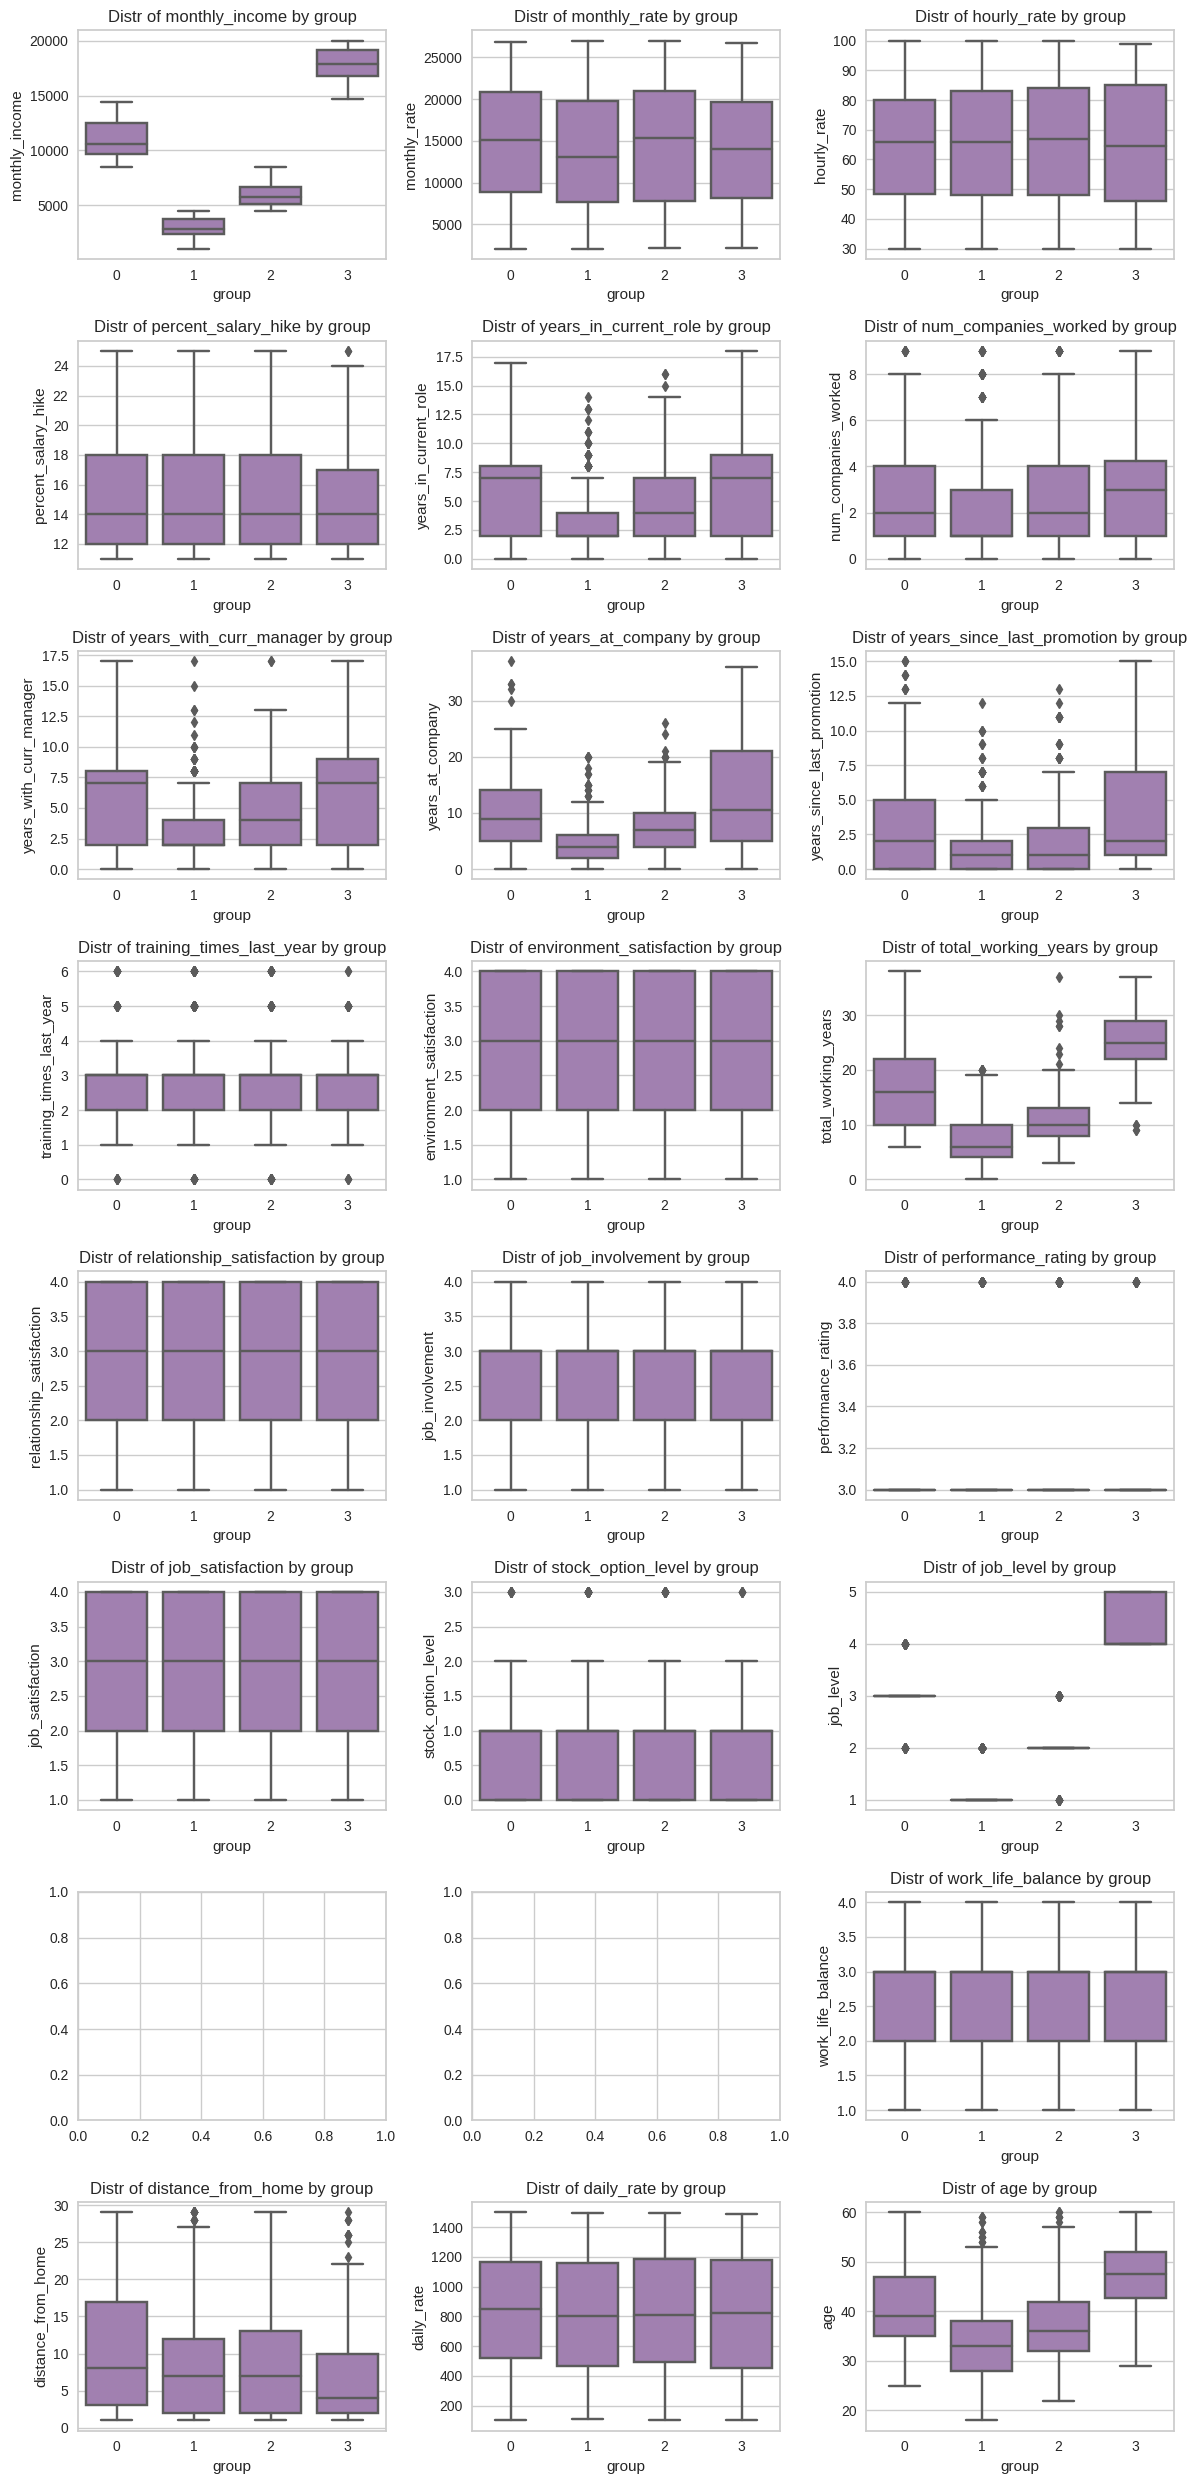

In [ ]:
boxplots('group')

In [ ]:
def cat_by_group(col):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
    for i in range(cur_data.group.nunique()):
        cur_data.groupby(['group', col])['age'].count().loc[i].plot.pie(ax = ax[ i // 2, i %2], autopct = make_autopct(cur_data.groupby(['group', col])['age'].count().loc[i]))
        ax[ i // 2, i %2].set_ylabel('')
        ax[ i // 2, i %2].set_title(f'Group {i} by {col}', fontsize = 15, fontweight = 'bold' )

    plt.suptitle(col, fontsize = 20, fontweight = 'bold')
    fig.tight_layout()
    fig.show()

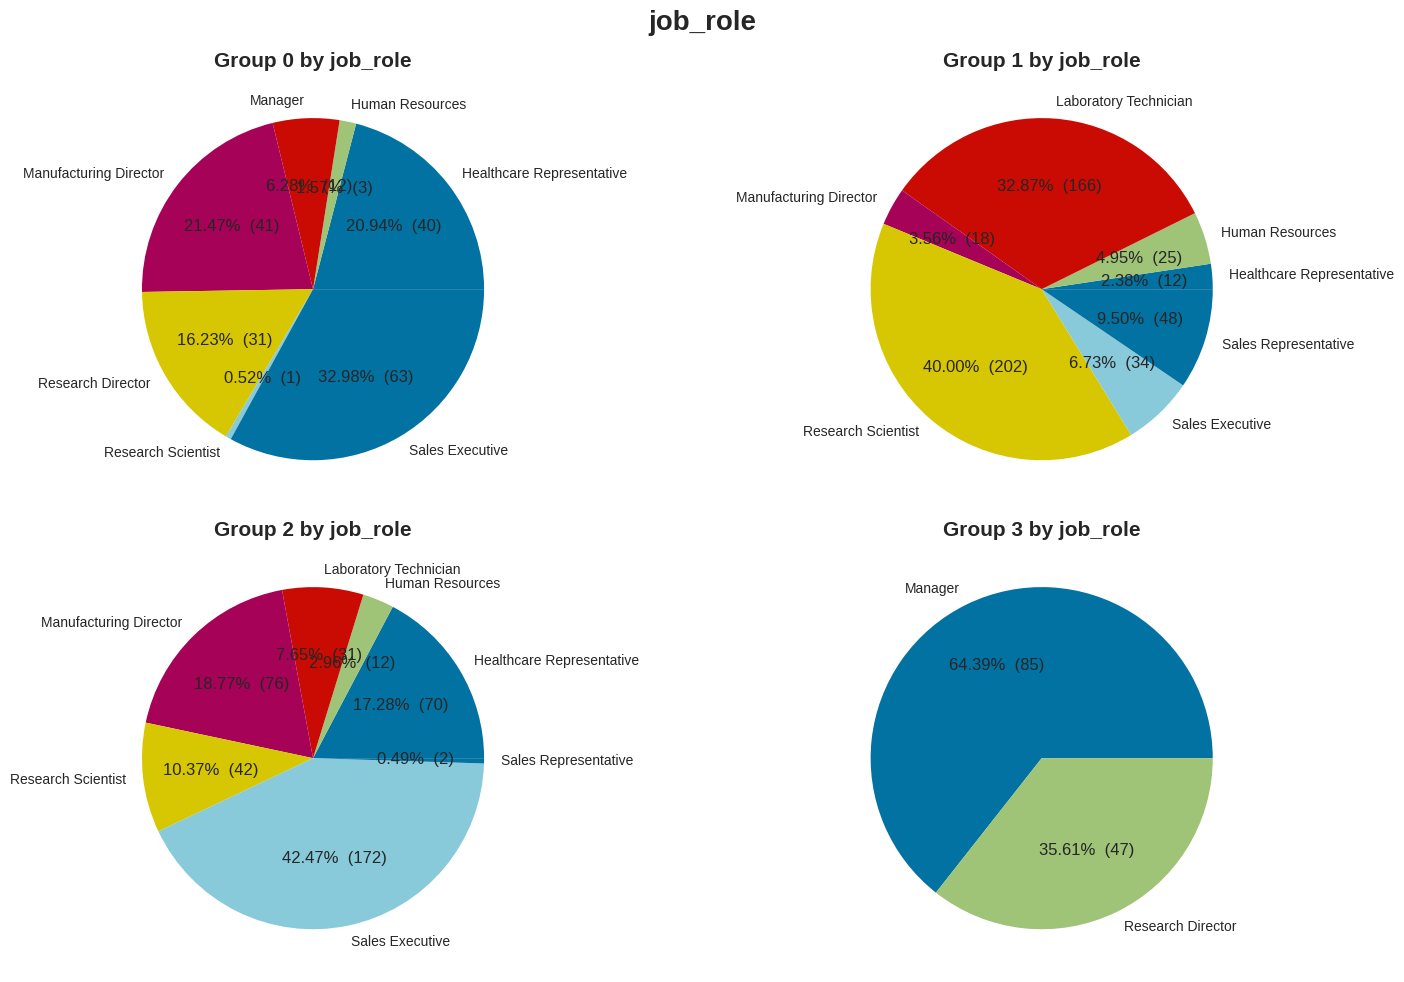

In [ ]:
cat_by_group('job_role')

In [ ]:
cat_cols = ['business_travel', 'department', 'education_field', 'gender', 'job_role','marital_status', 'over_time',  'education']

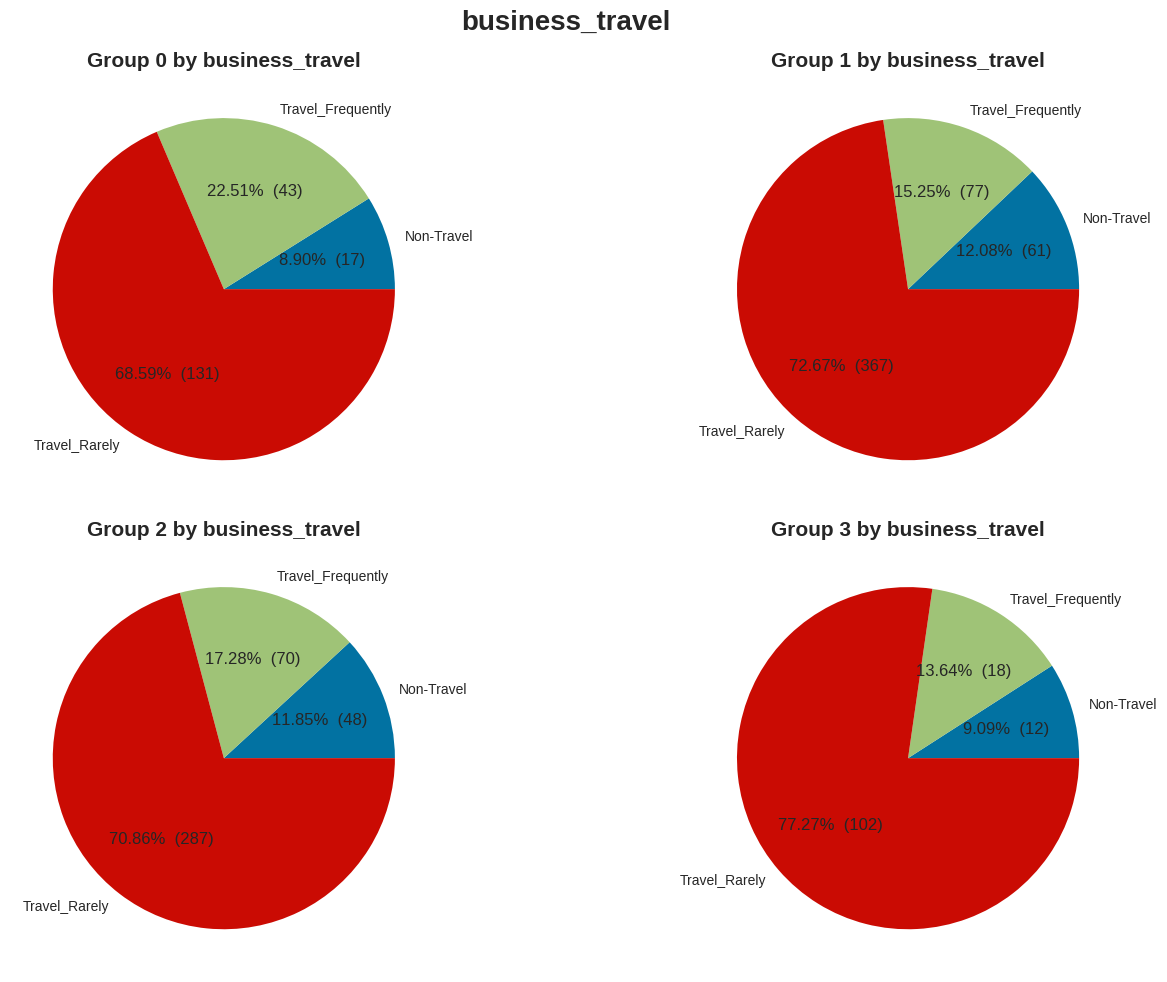

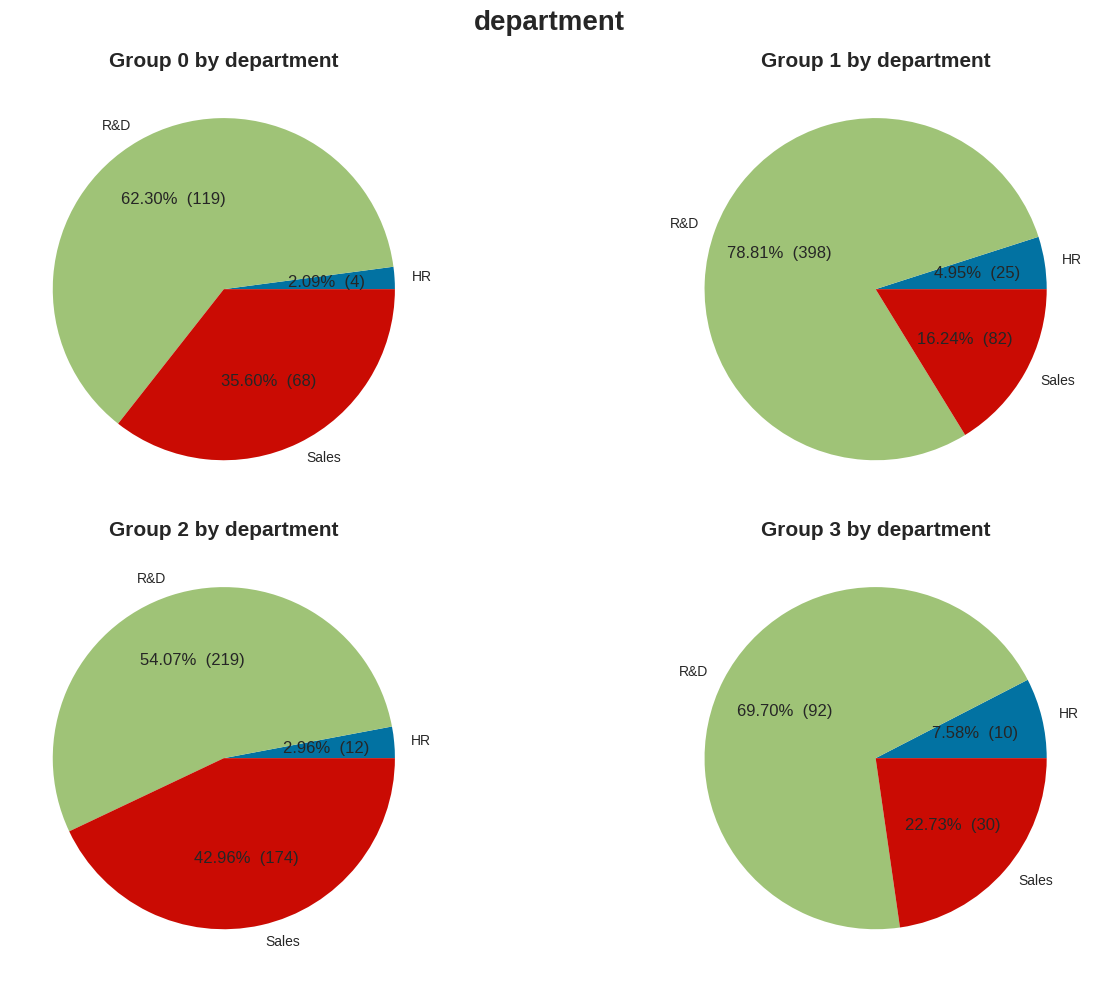

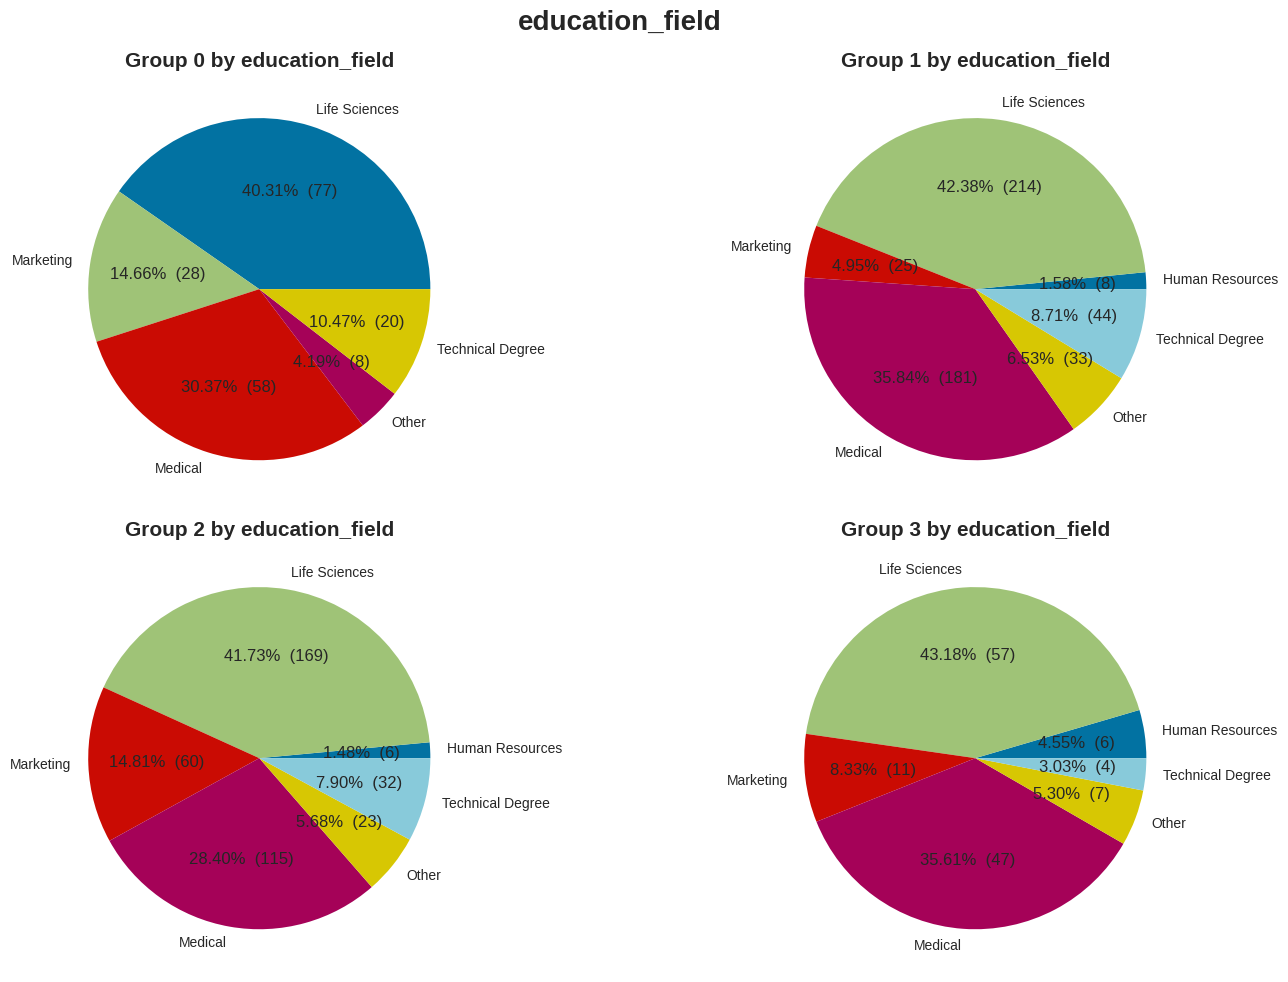

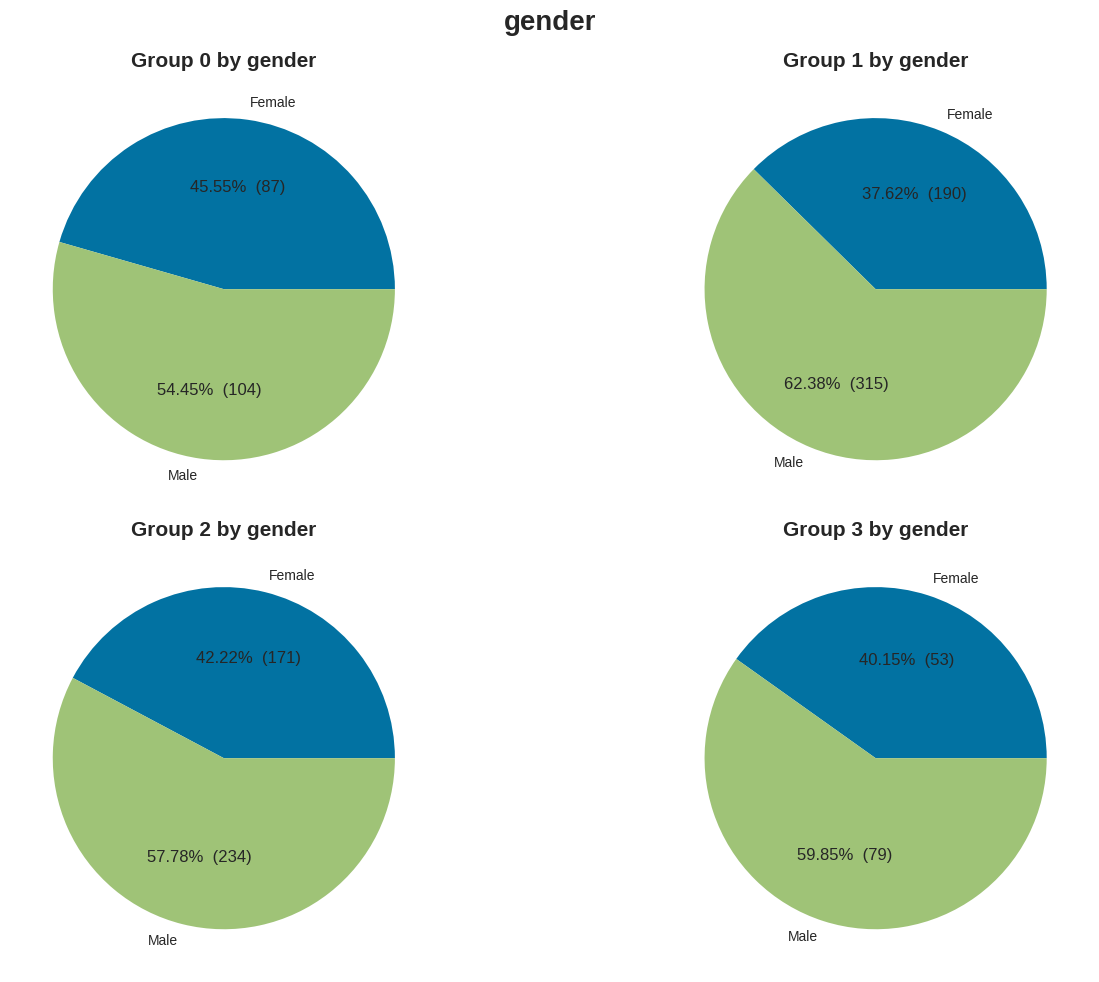

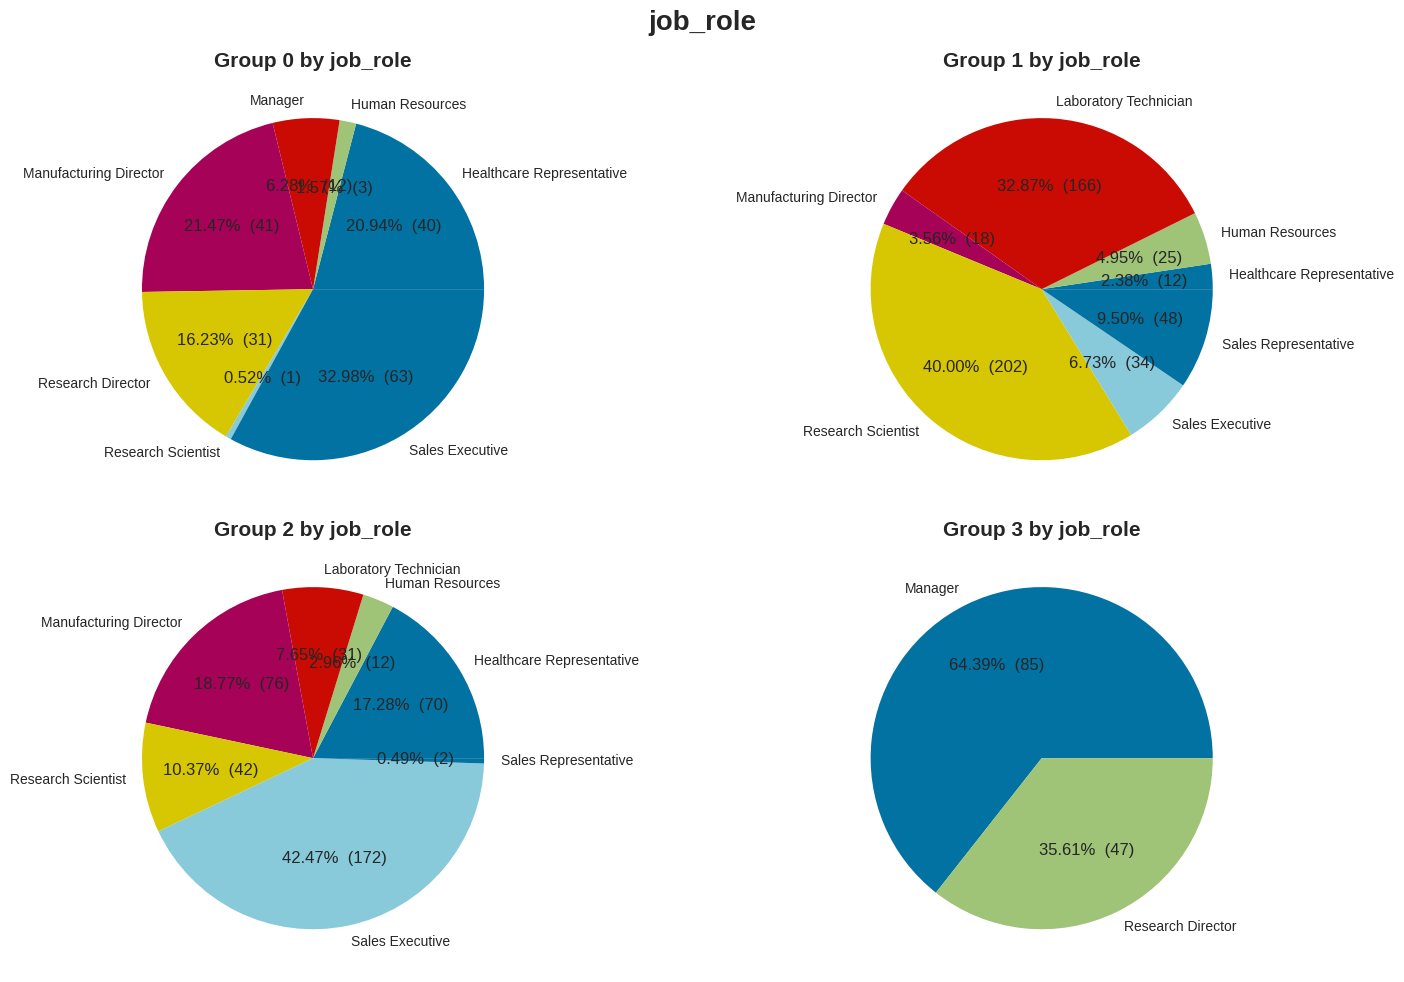

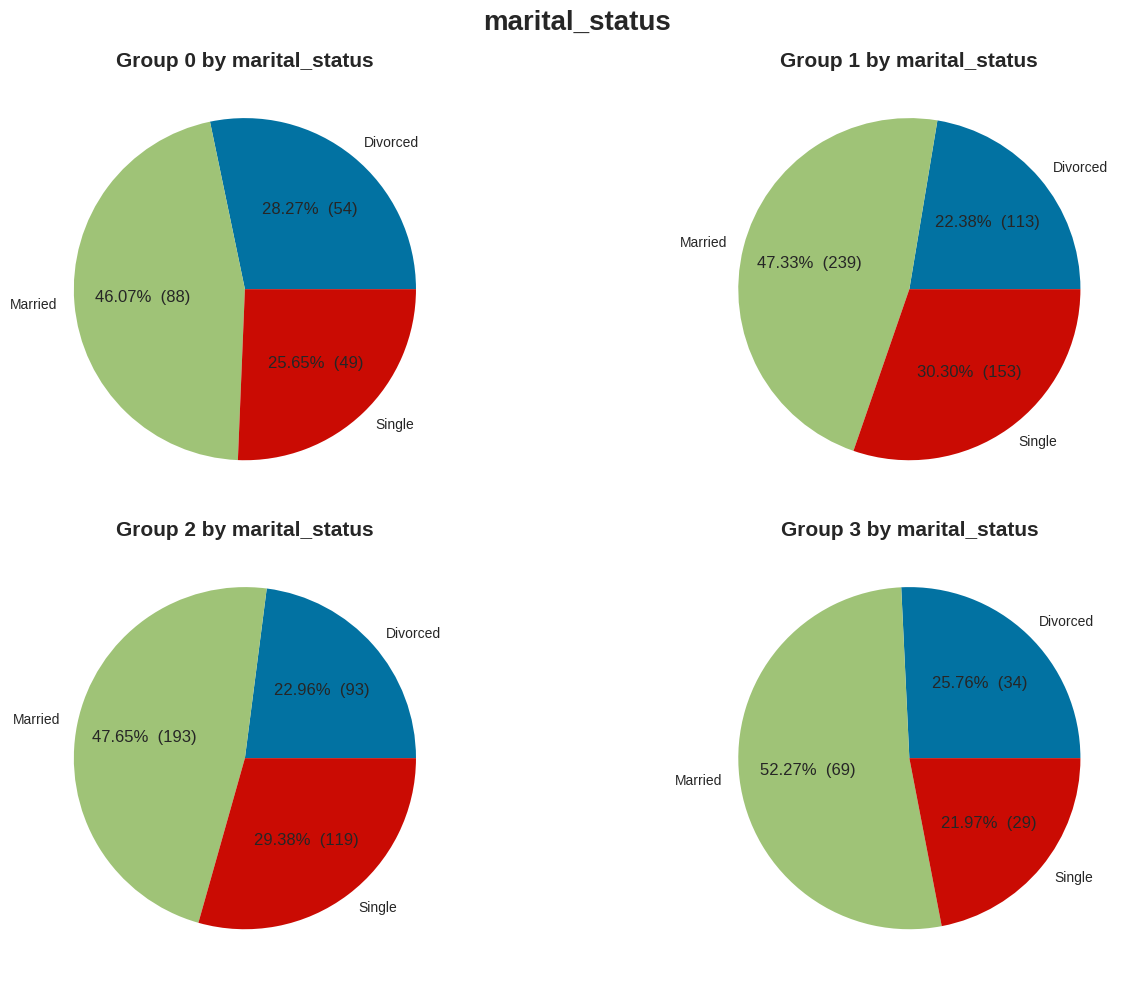

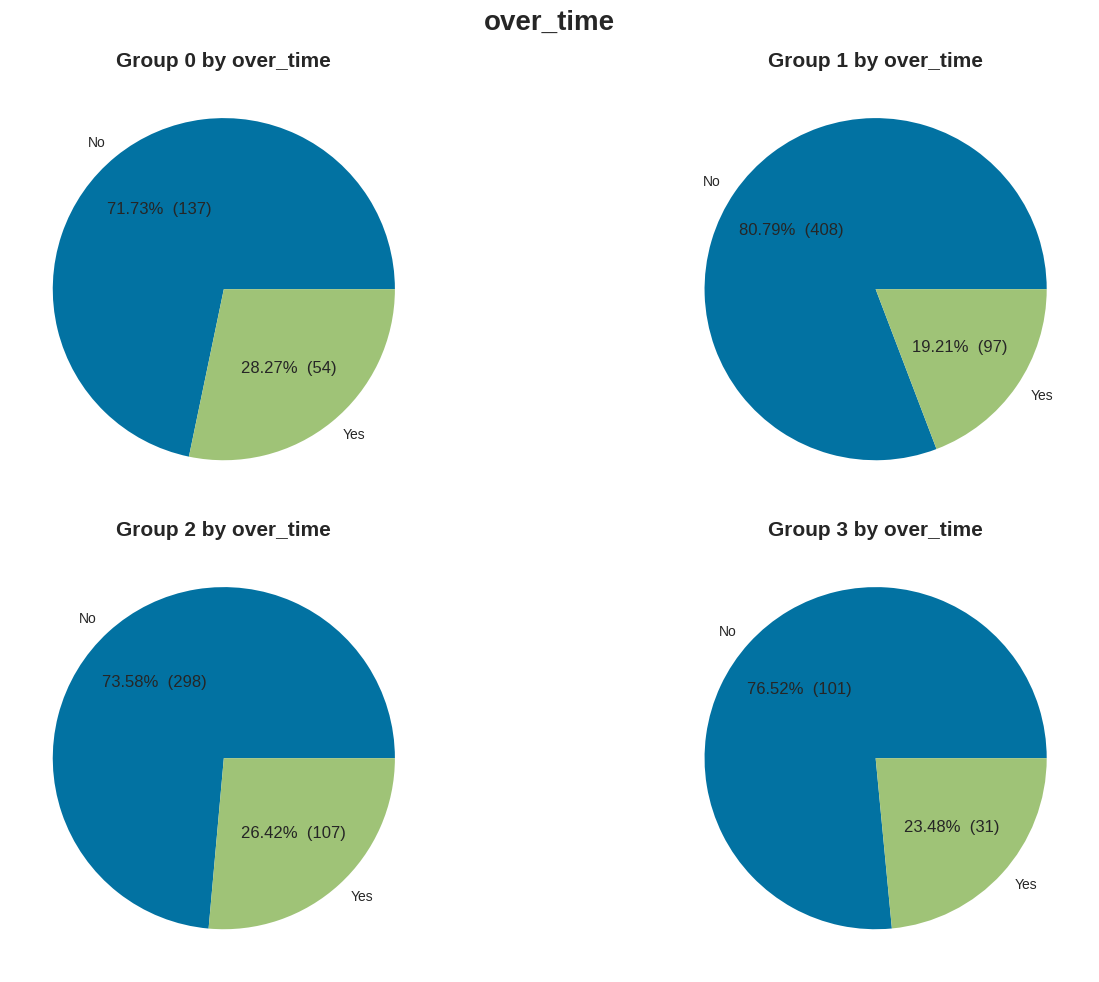

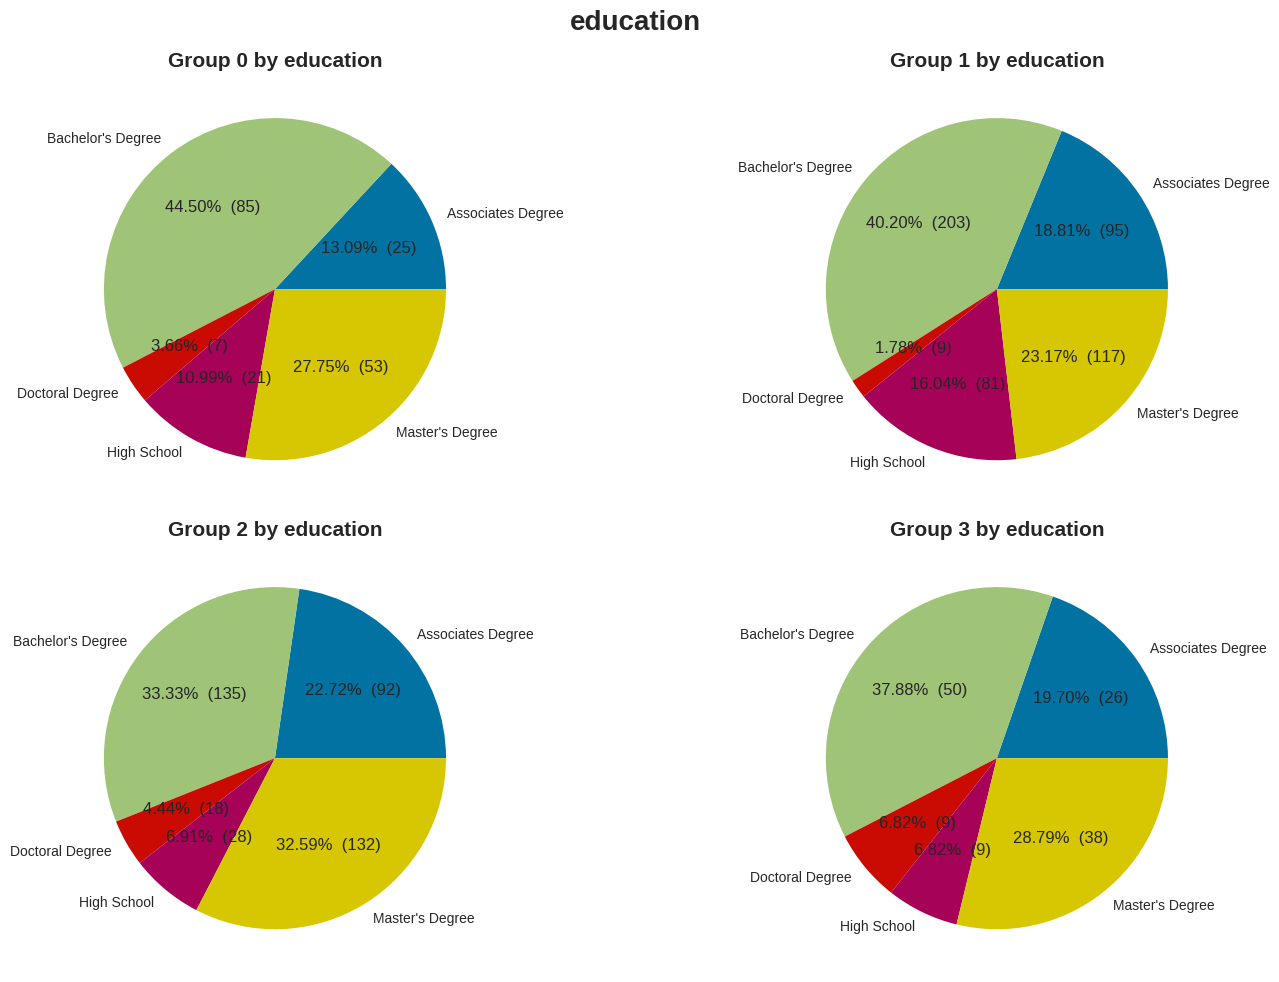

In [ ]:
for i in cat_cols:
    cat_by_group(i)